# **Исследовательский проект по анализу состояния загрязнения атмосферы в городах России с 2007 года**

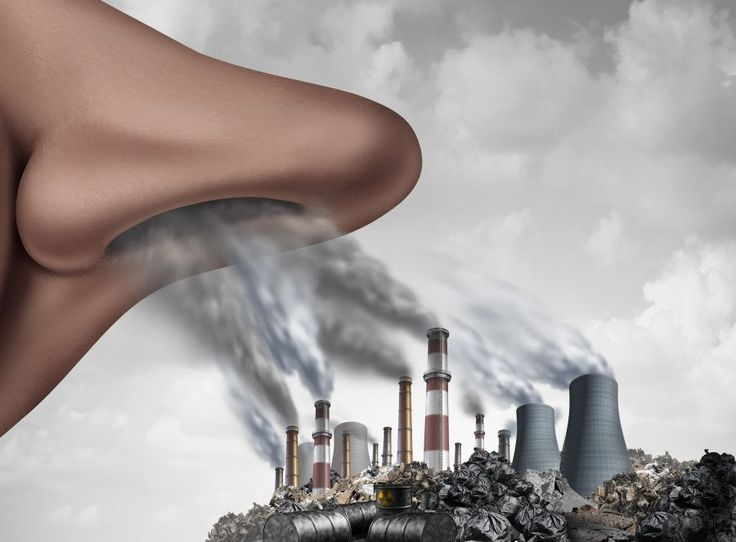

## 0. Описание датасета и задания

Данные о качестве атмосферного воздуха в городах и населенных пунктах России, охваченных сетью государственного мониторинга атмосферного воздуха. В 2022 году Росгидромет проводил регулярные наблюдения на 624 пунктах в 223 населенном пункте. Информация о качестве атмосферного воздуха в городах России ежегодно публикуется на сайте Главной геофизической обсерватории им. А.И. Воейкова.

Единица наблюдения в наборе данных — это населенный пункт или город, в котором проводился мониторинг качества атмосферного воздуха в конкретном году. Данные для каждого наблюдения приведены по таким атрибутам, как наименование региона и населенного пункта, коды ОКТМО региона и населенного пункта, общий уровень загрязнения воздуха, объемы выбросов от промышленных предприятий по отдельным классам веществ, численность населения и количество станций мониторинга.

Набор доступен для работы в формате CSV (кодировка: «UTF-8», разделитель: «;»). Набор данных охватывает 2007–2022 годы. Всего набор содержит 3992 наблюдения по 15 атрибутам.

Датасет выложен на платформе «Если быть точным».  
Ссылка на платформу: https://tochno.st/datasets/air_cities  
Ссылка на датасет: https://drive.google.com/file/d/1RJWfZ8vd9ttvhs_OvejITynd3Q288C6x/view?usp=sharing

***Информация, содержащаяся в датасете:***
1.   *year* — год.
2.   *region* — регион.
3.   *region_oktmo* — код ОКТМО (Общероссийский классификатор территорий муниципальных образований) региона.
4.   *city* — город или населённый пункт.
5.   *city_oktmo* — код ОКТМО населенного пункта
2.   *air_standard_index* — вещества, для которых стандартный индекс превышает 10 предельно-допустимых концентраций.
Стандартный индекс (СИ) — наибольшая измеренная разовая концентрация загрязняющего вещества, деленная на ПДК (предельно допустимая концентрация). Он
определяется из данных наблюдений на посту за одним загрязняющим веществом, или на всех постах рассматриваемой территории за всеми загрязняющими
веществами за месяц или за год. Характеризует степень кратковременного загрязнения.
Пропуск означает отсутствие веществ, для которых стандартный индекс превышает 10 ПДК.
3.   *air_repeatability* — наибольшая повторяемость превышения предельно-допустимых концентраций.
4.   *air_qcp* — вещества, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает одну предельно-допустимую концетрацию.
ПДК — предельно допустимая концентрация загрязняющего вещества для населенных мест, устанавливаемая Главным санитарным врачом Российской
Федерации.
5.   *air_solid_emissions* — объем выбросов от промышленных предприятий твердых веществ.
6.   *air_so_emissions* — объем выбросов от промышленных предприятий диоксида серы.
7.   *air_no_emissions* — объем выбросов от промышленных предприятий диоксида азота.
8.   *air_co_emissions* — объем выбросов от промышленных предприятий монооксида углерода.
9.   *air_population* — численность населения.
10.  *air_stantions* — количество станций мониторинга.
1+1 означает 1 станцию из общей сети мониторинга и 1 ведомственную станцию, «эп» — эпизодические наблюдения.

**Задача** — провести подробный анализ данных состояния загрязнения воздуха в России по регионам и годам, найти взаимосвязи и сформулировать выводы.

## 1. Импорт необходимых для работы библиотек

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns

## 2. Загрузка датасета, подгрузка данных в питон и начало работы с ними

In [2]:
# при ошибке загрузки в текущей версии gdown необходимо его обновить
!pip install --upgrade gdown

In [3]:
!gdown --id 1RJWfZ8vd9ttvhs_OvejITynd3Q288C6x

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RJWfZ8vd9ttvhs_OvejITynd3Q288C6x
To: /content/air_pollution.csv
100% 503k/503k [00:00<00:00, 66.2MB/s]


In [4]:
air_pollution_df = pd.read_csv('air_pollution.csv', sep=';')

In [5]:
air_pollution_df.head()

Unnamed: 0  year            region  region_oktmo          city  city_oktmo  \
0           0  2007    Алтайский край       1000000       БАРНАУЛ   1701000.0   
1           1  2007    Алтайский край       1000000         БИЙСК   1705000.0   
2           2  2007    Алтайский край       1000000       ЗАРИНСК   1706000.0   
3           3  2007  Амурская область      10000000  БЛАГОВЕЩЕНСК  10701000.0   
4           4  2007  Амурская область      10000000           ЗЕЯ  10712000.0   

   air_general_level air_standard_index air_repeatability         air_qcp  \
0                4.0                 ВВ               NaN  ВВ, NO2, Ф, БП   
1                3.0                H2S               NaN       NO2,Ф, БП   
2                3.0                NaN               NaN   NO2, Фенол, Ф   
3                4.0                NaN               NaN      БП, Ф, NO2   
4                1.0                NaN               NaN             NO2   

   air_solid_emissions  air_so_emissions  air_no_emissions  air_co_emissions  \
0                 23.8              14.7               4.3               4.6   
1                  9.0               7.4               2.9              12.7   
2                  2.9               4.8               2.4              17.8   
3                 12.3               3.8               4.0               6.2   
4                  0.4               0.3               0.2               1.4   

   air_population air_stantions  
0           663.7           5+1  
1           224.5           3+1  
2            51.3             1  
3           214.3             1  
4            27.2           1+1

In [6]:
air_pollution_df.tail()

Unnamed: 0  year                           region  region_oktmo  \
3987        3987  2022       Чукотский автономный округ      77000000   
3988        3988  2022  Ямало-Ненецкий автономный округ      71900000   
3989        3989  2022              Ярославская область      78000000   
3990        3990  2022              Ярославская область      78000000   
3991        3991  2022              Ярославская область      78000000   

                      city  city_oktmo  air_general_level air_standard_index  \
3987                 ПЕВЕК  77705000.0                NaN                NaN   
3988              САЛЕХАРД  71951000.0                1.0                NaN   
3989  ПЕРЕСЛАВЛЬ-ЗАЛЕССКИЙ  78705000.0                1.0                NaN   
3990               РЫБИНСК  78715000.0                2.0                NaN   
3991             ЯРОСЛАВЛЬ  78701000.0                2.0                NaN   

     air_repeatability     air_qcp  air_solid_emissions  air_so_emissions  \
3987               NaN         NaN                 0.80              0.30   
3988               NaN           Ф                 0.70              0.03   
3989               NaN         NaN                 0.02              0.08   
3990               NaN          ВВ                 0.30              0.10   
3991               NaN  ВВ, NO2, Ф                 1.30             13.10   

      air_no_emissions  air_co_emissions  air_population air_stantions  
3987               0.6               1.6             4.1             1  
3988               0.5               1.0            52.0             1  
3989               0.2               0.5            36.7             1  
3990               0.8               1.4           179.6             2  
3991               9.5               5.3           594.0             5

In [7]:
air_pollution_df.sample(5)

Unnamed: 0  year             region  region_oktmo    city  city_oktmo  \
2874        2874  2018      Пермский край      57000000  ГУБАХА  57516000.0   
1120        1120  2011     Омская область      52000000    ОМСК  52701000.0   
2142        2142  2015      Пермский край      57000000   ПЕРМЬ  57701000.0   
3060        3060  2019  Красноярский край       4000000  АЧИНСК   4703000.0   
1799        1799  2014  Иркутская область      25000000   МЕГЕТ  25703000.0   

      air_general_level air_standard_index air_repeatability     air_qcp  \
2874                1.0                NaN               NaN      ВВ, БП   
1120                2.0                NaN               NaN       БП, Ф   
2142                2.0                 ЭБ               NaN          HF   
3060                3.0                NaN               NaN  NO2, БП, Ф   
1799                NaN                NaN               NaN         NaN   

      air_solid_emissions  air_so_emissions  air_no_emissions  \
2874                  0.4               0.5               1.9   
1120                 51.9              60.6              40.1   
2142                  1.5               4.3              17.7   
3060                 15.6               5.1               9.9   
1799                  NaN               NaN               NaN   

      air_co_emissions  air_population air_stantions  
2874               3.1            33.9             2  
1120              80.4          1154.0             8  
2142              79.7          1026.0             7  
3060               9.8           106.4             3  
1799               NaN             8.9             1

## 3. Оценка размеров датасета, наличия дубликатов и пропусков, работа с признаками

Оценим размеры датасета:

In [8]:
air_pollution_df.shape

(3992, 16)

Оценим признаки и типы данных, обратим внимание на пропущенные значения:

In [9]:
air_pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3992 non-null   int64  
 1   year                 3992 non-null   int64  
 2   region               3992 non-null   object 
 3   region_oktmo         3992 non-null   int64  
 4   city                 3992 non-null   object 
 5   city_oktmo           3962 non-null   float64
 6   air_general_level    3519 non-null   float64
 7   air_standard_index   571 non-null    object 
 8   air_repeatability    277 non-null    object 
 9   air_qcp              2882 non-null   object 
 10  air_solid_emissions  3520 non-null   float64
 11  air_so_emissions     3509 non-null   float64
 12  air_no_emissions     3540 non-null   float64
 13  air_co_emissions     3541 non-null   float64
 14  air_population       3823 non-null   float64
 15  air_stantions        3991 non-null   o

Перед проведением манипуляций создадим копию исходного датасета в отдельную переменную:

In [10]:
air_pollution_df_copy = air_pollution_df.copy()

Исключим признаки, не представляющие ценности:

In [11]:
unnecessary_columns = ['Unnamed: 0', 'region_oktmo', 'city_oktmo']
air_pollution_df_copy.drop(columns=unnecessary_columns, inplace=True)

In [12]:
air_pollution_df_copy.columns

Index(['year', 'region', 'city', 'air_general_level', 'air_standard_index',
       'air_repeatability', 'air_qcp', 'air_solid_emissions',
       'air_so_emissions', 'air_no_emissions', 'air_co_emissions',
       'air_population', 'air_stantions'],
      dtype='object')

Переименуем некоторые признаки для удобства дальнейшей работы с ними:

In [13]:
# Убираем префикс 'air_' из названий столбцов
air_pollution_df_copy.columns = [
    col.replace("air_", "") if col.startswith("air_") else col
    for col in air_pollution_df_copy.columns
]
air_pollution_df_copy.columns

Index(['year', 'region', 'city', 'general_level', 'standard_index',
       'repeatability', 'qcp', 'solid_emissions', 'so_emissions',
       'no_emissions', 'co_emissions', 'population', 'stantions'],
      dtype='object')

In [14]:
air_pollution_df_copy.rename(
    columns={
        'general_level': 'pollution_level',
        'standard_index': 'huge_standard_index_pollutants',
        'repeatability': 'max_repeatability',
        'qcp': 'exceeded_mpc_pollutants',
        'stantions': 'stantions_count',
        'so_emissions': 'so2_emissions',
        'no_emissions': 'no2_emissions',
    }
, inplace=True)

In [15]:
air_pollution_df_copy.columns

Index(['year', 'region', 'city', 'pollution_level',
       'huge_standard_index_pollutants', 'max_repeatability',
       'exceeded_mpc_pollutants', 'solid_emissions', 'so2_emissions',
       'no2_emissions', 'co_emissions', 'population', 'stantions_count'],
      dtype='object')

Оценим наличие дубликатов в датасете:

In [16]:
air_pollution_df_copy.duplicated().sum()

0

Полные дубликаты в датасете отсутвуют. Проверим наличие дубликатов по году, городу и региону:

In [17]:
air_pollution_df_copy.duplicated(subset=['year', 'city', 'region']).sum()

0

По данным признакам дубликаты также отсутствуют.

## 4. Работа с пропусками

Посчитаем количество и долю пропущенных значений для каждого признака:

In [18]:
def display_missing_values_info(df):
    # Подсчет пропущенных значений
    missing_count = df.isna().sum()
    missing_fraction = df.isna().mean() * 100

    # Создаем DataFrame для отображения
    missing_info = pd.DataFrame(
        {
            "Количество пропущенных значений": missing_count,
            "Доля пропущенных значений": missing_fraction,
        }
    )

    # Отображаем информацию о пропусках в виде таблицы с форматированием
    display(
        missing_info.style.set_table_attributes('style="width: 70%"').format(
            {"Доля пропущенных значений": "{:.2f}%"}
        )  # Форматируем долю в проценты
    )

In [19]:
display_missing_values_info(air_pollution_df_copy)

### 4.1. Работа с пропусками признаков *pollution_level*, *solid_emissions*, *so2_emissions*, *no2_emissions* и *co_emissions*

В описании датасета сказано что в некоторых городах уровень загрязнения атмосферы не оценен из-за недостаточного количества данных наблюдений или количества веществ, необходимых, для
определения ИЗА (комплексного индекса загрязнения атмосферы). О причинах пропусков в колонках с объемом выбросов различных веществ от промышленных предприятий в описании ничего не говорится.

Исключим из датасета строки, имеющие пропуски по каждому признаку из *pollution_level*, *solid_emissions*, *so2_emissions*, *no2_emissions* и *co_emissions*, так как данные строки не будут полезны для анализа:

In [20]:
air_pollution_df_copy = air_pollution_df_copy.dropna(subset=['pollution_level', 'solid_emissions', 'so2_emissions', 'no2_emissions', 'co_emissions'], how='all')

In [21]:
display_missing_values_info(air_pollution_df_copy)

Заменим значения pd.na в этих пяти колонках на np.nan:

In [22]:
for column in ['pollution_level', 'solid_emissions', 'so2_emissions', 'no2_emissions', 'co_emissions']:
    air_pollution_df_copy[column] = air_pollution_df_copy[column].fillna(np.nan)

<ipython-input-22-358bbcf49410>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_pollution_df_copy[column] = air_pollution_df_copy[column].fillna(np.nan)


### 4.2. Работа с пропусками признаков *exceeded_mpc_pollutants* и *huge_standard_index_pollutants*

Несмотря на значительное число пропусков в колонке *exceeded_mpc_pollutants* и огромное число пропусков в колонке *huge_standard_index_c_pollutants*, не будем исключать их, так как в описании к датасету четко сказано, что пропуск в данных колонках означает отсутствие соответсующих веществ.



Пока что заполним пропущенные значения пробелами, чуть позже обработаем обе эти колонки:

In [23]:
air_pollution_df_copy['exceeded_mpc_pollutants'] = air_pollution_df_copy['exceeded_mpc_pollutants'].fillna('')
air_pollution_df_copy['exceeded_mpc_pollutants'].isna().sum()

0

In [24]:
air_pollution_df_copy['huge_standard_index_pollutants'] = air_pollution_df_copy['huge_standard_index_pollutants'].fillna('')
air_pollution_df_copy['huge_standard_index_pollutants'].isna().sum()

0

### 4.3. Работа с пропусками признака *max_repeatability*

Доля пропусков данного признака огромна, критически важным для анализа данный признак не является, поэтому исключим его из датасета:

In [25]:
air_pollution_df_copy.drop(columns=['max_repeatability'], inplace=True)

In [26]:
air_pollution_df_copy.columns

Index(['year', 'region', 'city', 'pollution_level',
       'huge_standard_index_pollutants', 'exceeded_mpc_pollutants',
       'solid_emissions', 'so2_emissions', 'no2_emissions', 'co_emissions',
       'population', 'stantions_count'],
      dtype='object')

### 4.4. Работа с пропусками признака *population*

In [27]:
air_pollution_df_copy['population'].isna().sum()

64

Значения пропущены всего в 64 строках. Выведем все города, для которых не указана численность населения:

In [28]:
unique_regions_and_cities = air_pollution_df_copy[air_pollution_df_copy['population'].isna()][['region', 'city']].dropna().drop_duplicates()
print(unique_regions_and_cities)

                     region                            city
10     Астраханская область                     АКСАРАЙСКИЙ
12     Астраханская область                          БАЙБЕК
13     Астраханская область                           БУЗАН
14     Астраханская область                          ДОСАНГ
15     Астраханская область                   КОМСОМОЛЬСКИЙ
16     Астраханская область                       НАРИМАНОВ
17     Астраханская область                        СЕИТОВКА
155      Республика Бурятия                       САГАН-НУР
616   Нижегородская область                  ПОС. ВОСТОЧНЫЙ
1276  Волгоградская область                      СВЕТЛЫЙ ЯР
1481    Ульяновская область                    ДИМИТРОВГРАД
1482    Ульяновская область                   НОВОУЛЬЯНОВСК
1662     Республика Карелия                        НАДВОИЦЫ
1869  Нижегородская область  ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)


In [29]:
len(unique_regions_and_cities)

14

Таких городов всего 14, а значит мы можем вручную вставить для них значения численности населения. Пусть значения будут не совсем точными, однако от пропусков избавимся и значения будут близки к реальности.

#### Численность населения н.п. АКСАРАЙСКИЙ

In [30]:
air_pollution_df_copy[air_pollution_df_copy['city']=='АКСАРАЙСКИЙ']

year                region         city  pollution_level  \
10    2007  Астраханская область  АКСАРАЙСКИЙ              1.0   
263   2008  Астраханская область  АКСАРАЙСКИЙ              1.0   
512   2009  Астраханская область  АКСАРАЙСКИЙ              1.0   
1262  2012  Астраханская область  АКСАРАЙСКИЙ              1.0   
1514  2013  Астраханская область  АКСАРАЙСКИЙ              1.0   
1766  2014  Астраханская область  АКСАРАЙСКИЙ              1.0   
2023  2015  Астраханская область  АКСАРАЙСКИЙ              1.0   
2271  2016  Астраханская область  АКСАРАЙСКИЙ              1.0   
2513  2017  Астраханская область  АКСАРАЙСКИЙ              1.0   
2757  2018  Астраханская область  АКСАРАЙСКИЙ              1.0   
3003  2019  Астраханская область  АКСАРАЙСКИЙ              1.0   
3253  2020  Астраханская область  АКСАРАЙСКИЙ              1.0   
3503  2021  Астраханская область  АКСАРАЙСКИЙ              1.0   
3752  2022  Астраханская область  АКСАРАЙСКИЙ              1.0   

     huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
10                                                                       NaN   
263                                                                      NaN   
512                                                                      NaN   
1262                                                                     NaN   
1514                                                                     NaN   
1766                                                                     NaN   
2023                                                                     NaN   
2271                                                                     NaN   
2513                                                                     NaN   
2757                                                                     NaN   
3003                                                                     NaN   
3253                                                                     NaN   
3503                                                    H2S              NaN   
3752                                                    H2S              NaN   

      so2_emissions  no2_emissions  co_emissions  population stantions_count  
10              NaN            NaN           NaN         NaN             1+1  
263             NaN            NaN           NaN         NaN             1+1  
512             NaN            NaN           NaN         NaN             1+1  
1262            NaN            NaN           NaN         NaN               1  
1514            NaN            NaN           NaN         NaN               1  
1766            NaN            NaN           NaN         NaN               1  
2023            NaN            NaN           NaN         NaN               1  
2271            NaN            NaN           NaN         NaN               1  
2513            NaN            NaN           NaN         NaN               1  
2757            NaN            NaN           NaN         NaN               1  
3003            NaN            NaN           NaN         NaN               1  
3253            NaN            NaN           NaN         NaN               1  
3503            NaN            NaN           NaN         NaN               1  
3752            NaN            NaN           NaN         NaN               1

In [31]:
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'АКСАРАЙСКИЙ') & (air_pollution_df_copy['year'] <= 2009), 'population'] = 2.0
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'АКСАРАЙСКИЙ') & (air_pollution_df_copy['year'] == 2010), 'population'] = 1.2
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'АКСАРАЙСКИЙ') & (air_pollution_df_copy['year'] == 2011), 'population'] = 0.5
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'АКСАРАЙСКИЙ') & (air_pollution_df_copy['year'] == 2012), 'population'] = 0.5
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'АКСАРАЙСКИЙ') & (air_pollution_df_copy['year'] == 2013), 'population'] = 0.4
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'АКСАРАЙСКИЙ') & (air_pollution_df_copy['year'] >= 2014), 'population'] = 0.3

#### Численность населения н.п. БАЙБЕК

In [32]:
air_pollution_df_copy[air_pollution_df_copy['city']=='БАЙБЕК']

year                region    city  pollution_level  \
12   2007  Астраханская область  БАЙБЕК              1.0   
265  2008  Астраханская область  БАЙБЕК              1.0   

    huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
12                                                                      NaN   
265                                                                     NaN   

     so2_emissions  no2_emissions  co_emissions  population stantions_count  
12             NaN            NaN           NaN         NaN               1  
265            NaN            NaN           NaN         NaN               1

In [33]:
air_pollution_df_copy.loc[air_pollution_df_copy['city'] == 'БАЙБЕК', 'population'] = 1.9

#### Численность населения н.п. БУЗАН

In [34]:
air_pollution_df_copy[air_pollution_df_copy['city']=='БУЗАН']

year                region   city  pollution_level  \
13   2007  Астраханская область  БУЗАН              1.0   
266  2008  Астраханская область  БУЗАН              1.0   
514  2009  Астраханская область  БУЗАН              1.0   

    huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
13                                                                      NaN   
266                                                                     NaN   
514                                                                     NaN   

     so2_emissions  no2_emissions  co_emissions  population stantions_count  
13             NaN            NaN           NaN         NaN               1  
266            NaN            NaN           NaN         NaN               1  
514            NaN            NaN           NaN         NaN               1

In [35]:
air_pollution_df_copy.loc[air_pollution_df_copy['city'] == 'БУЗАН', 'population'] = 1.0

#### Численность населения н.п. ДОСАНГ

In [36]:
air_pollution_df_copy[air_pollution_df_copy['city']=='ДОСАНГ']

year                region    city  pollution_level  \
14   2007  Астраханская область  ДОСАНГ              1.0   
267  2008  Астраханская область  ДОСАНГ              1.0   
515  2009  Астраханская область  ДОСАНГ              1.0   

    huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
14                                                                      NaN   
267                                                                     NaN   
515                                                                     NaN   

     so2_emissions  no2_emissions  co_emissions  population stantions_count  
14             NaN            NaN           NaN         NaN             1+1  
267            NaN            NaN           NaN         NaN             1+1  
515            NaN            NaN           NaN         NaN             1+1

In [37]:
air_pollution_df_copy.loc[air_pollution_df_copy['city'] == 'ДОСАНГ', 'population'] = 0.7

#### Численность населения н.п. КОМСОМОЛЬСКИЙ

In [38]:
air_pollution_df_copy[air_pollution_df_copy['city']=='КОМСОМОЛЬСКИЙ']

year                region           city  pollution_level  \
15   2007  Астраханская область  КОМСОМОЛЬСКИЙ              1.0   
268  2008  Астраханская область  КОМСОМОЛЬСКИЙ              1.0   
516  2009  Астраханская область  КОМСОМОЛЬСКИЙ              1.0   

    huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
15                                                                      NaN   
268                                                                     NaN   
516                                                                     NaN   

     so2_emissions  no2_emissions  co_emissions  population stantions_count  
15             NaN            NaN           NaN         NaN               1  
268            NaN            NaN           NaN         NaN               1  
516            NaN            NaN           NaN         NaN               1

In [39]:
air_pollution_df_copy.loc[air_pollution_df_copy['city'] == 'КОМСОМОЛЬСКИЙ', 'population'] = 1.0

#### Численность населения н.п. НАРИМАНОВ

In [40]:
air_pollution_df_copy[air_pollution_df_copy['city']=='НАРИМАНОВ']

year                region       city  pollution_level  \
16    2007  Астраханская область  НАРИМАНОВ              1.0   
269   2008  Астраханская область  НАРИМАНОВ              1.0   
517   2009  Астраханская область  НАРИМАНОВ              1.0   
767   2010  Астраханская область  НАРИМАНОВ              1.0   
1015  2011  Астраханская область  НАРИМАНОВ              1.0   
1267  2012  Астраханская область  НАРИМАНОВ              1.0   
1519  2013  Астраханская область  НАРИМАНОВ              1.0   
1771  2014  Астраханская область  НАРИМАНОВ              1.0   
2028  2015  Астраханская область  НАРИМАНОВ              1.0   
2276  2016  Астраханская область  НАРИМАНОВ              1.0   
2518  2017  Астраханская область  НАРИМАНОВ              1.0   
2762  2018  Астраханская область  НАРИМАНОВ              1.0   
3008  2019  Астраханская область  НАРИМАНОВ              1.0   
3508  2021  Астраханская область  НАРИМАНОВ              2.0   
3757  2022  Астраханская область  НАРИМАНОВ              NaN   

     huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
16                                                                       NaN   
269                                                                      NaN   
517                                                                      NaN   
767                                                                      NaN   
1015                                                                     NaN   
1267                                                                     NaN   
1519                                                                     NaN   
1771                                                                     NaN   
2028                                                                     NaN   
2276                                                                     NaN   
2518                                                                     NaN   
2762                                                                     NaN   
3008                                                                     NaN   
3508                                                    H2S              NaN   
3757                                                    H2S             0.08   

      so2_emissions  no2_emissions  co_emissions  population stantions_count  
16              NaN            NaN           NaN         NaN               1  
269             NaN            NaN           NaN         NaN               1  
517             NaN            NaN           NaN         NaN               1  
767             NaN            NaN           NaN         NaN               1  
1015            NaN            NaN           NaN         NaN               1  
1267            NaN            NaN           NaN         NaN               1  
1519            NaN            NaN           NaN         NaN               1  
1771            NaN            NaN           NaN         NaN               1  
2028            NaN            NaN           NaN         NaN               1  
2276            NaN            NaN           NaN         NaN               1  
2518            NaN            NaN           NaN         NaN               1  
2762            NaN            NaN           NaN         NaN               1  
3008            NaN            NaN           NaN         NaN               1  
3508            NaN            NaN           NaN         NaN               1  
3757           0.04            0.2           0.3         NaN               1

In [41]:
air_pollution_df_copy.loc[air_pollution_df_copy['city'] == 'НАРИМАНОВ', 'population'] = 11.0

#### Численность населения н.п. СЕИТОВКА

In [42]:
air_pollution_df_copy[air_pollution_df_copy['city']=='СЕИТОВКА']

year                region      city  pollution_level  \
17   2007  Астраханская область  СЕИТОВКА              1.0   
270  2008  Астраханская область  СЕИТОВКА              1.0   
518  2009  Астраханская область  СЕИТОВКА              1.0   

    huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
17                                                                      NaN   
270                                                                     NaN   
518                                                                     NaN   

     so2_emissions  no2_emissions  co_emissions  population stantions_count  
17             NaN            NaN           NaN         NaN               1  
270            NaN            NaN           NaN         NaN               1  
518            NaN            NaN           NaN         NaN               1

In [43]:
air_pollution_df_copy.loc[air_pollution_df_copy['city'] == 'СЕИТОВКА', 'population'] = 0.4

#### Численность населения н.п. САГАН-НУР

In [44]:
air_pollution_df_copy[air_pollution_df_copy['city']=='САГАН-НУР']

year              region       city  pollution_level  \
155  2007  Республика Бурятия  САГАН-НУР              1.0   
405  2008  Республика Бурятия  САГАН-НУР              NaN   
655  2009  Республика Бурятия  САГАН-НУР              NaN   
903  2010  Республика Бурятия  САГАН-НУР              NaN   

    huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
155                                                                     NaN   
405                                                                     1.5   
655                                                                     3.0   
903                                                                     0.1   

     so2_emissions  no2_emissions  co_emissions  population stantions_count  
155            NaN            NaN           NaN         NaN               1  
405            0.5            1.3           1.9         NaN             NaN  
655            0.4            0.8           1.3         5.5              эп  
903            0.3            1.1           1.0         5.2              эп

In [45]:
air_pollution_df_copy.loc[air_pollution_df_copy['city'] == 'САГАН-НУР', 'population'] = 4.0

#### Численность населения н.п. ПОС. ВОСТОЧНЫЙ

In [46]:
air_pollution_df_copy[air_pollution_df_copy['city']=='ПОС. ВОСТОЧНЫЙ']

year                 region            city  pollution_level  \
616   2009  Нижегородская область  ПОС. ВОСТОЧНЫЙ              3.0   
864   2010  Нижегородская область  ПОС. ВОСТОЧНЫЙ              3.0   
1113  2011  Нижегородская область  ПОС. ВОСТОЧНЫЙ              3.0   
1365  2012  Нижегородская область  ПОС. ВОСТОЧНЫЙ              3.0   
1618  2013  Нижегородская область  ПОС. ВОСТОЧНЫЙ              4.0   

     huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
616                                  ВВ, NO2, NH3, Фенол, Ф              NaN   
864                                  ВВ, NO2, NH3, Фенол, Ф              NaN   
1113                                 ВВ, NO2, NH3, Ф, Фенол              NaN   
1365                                        ВВ, NO2, NH3, Ф              NaN   
1618                                            NO2, NH3, Ф              NaN   

      so2_emissions  no2_emissions  co_emissions  population stantions_count  
616             NaN            NaN           NaN         NaN               1  
864             NaN            NaN           NaN         NaN               1  
1113            NaN            NaN           NaN         NaN               1  
1365            NaN            NaN           NaN         NaN               1  
1618            NaN            NaN           NaN         NaN               1

В интернете не найдено упоминаний о пос. Восточный в Нижегородской области. Исключим из датасета записи, относящиеся к нему:

In [47]:
air_pollution_df_copy = air_pollution_df_copy[air_pollution_df_copy['city'] != 'ПОС. ВОСТОЧНЫЙ']

#### Численность населения н.п. СВЕТЛЫЙ ЯР

In [48]:
air_pollution_df_copy[air_pollution_df_copy['city']=='СВЕТЛЫЙ ЯР']

year                 region        city  pollution_level  \
1276  2012  Волгоградская область  СВЕТЛЫЙ ЯР              1.0   

     huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
1276                                                                     NaN   

      so2_emissions  no2_emissions  co_emissions  population stantions_count  
1276            NaN            NaN           NaN         NaN               1

In [49]:
air_pollution_df_copy.loc[air_pollution_df_copy['city'] == 'СВЕТЛЫЙ ЯР', 'population'] = 12.47

#### Численность населения н.п. ДИМИТРОВГРАД

In [50]:
air_pollution_df_copy[air_pollution_df_copy['city']=='ДИМИТРОВГРАД']

year               region          city  pollution_level  \
1481  2012  Ульяновская область  ДИМИТРОВГРАД              2.0   
1733  2013  Ульяновская область  ДИМИТРОВГРАД              3.0   
1990  2014  Ульяновская область  ДИМИТРОВГРАД              2.0   
2236  2015  Ульяновская область  ДИМИТРОВГРАД              1.0   
2723  2017  Ульяновская область  ДИМИТРОВГРАД              1.0   
2969  2018  Ульяновская область  ДИМИТРОВГРАД              1.0   
3216  2019  Ульяновская область  ДИМИТРОВГРАД              1.0   
3466  2020  Ульяновская область  ДИМИТРОВГРАД              1.0   
3715  2021  Ульяновская область  ДИМИТРОВГРАД              3.0   
3963  2022  Ульяновская область  ДИМИТРОВГРАД              4.0   

     huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
1481                                                      Ф              0.2   
1733                                                 NO2, Ф              0.3   
1990                                             NO2, Фенол              0.2   
2236                                                ВВ, NO2              0.2   
2723                                                                     0.2   
2969                                                 NO2, Ф              0.2   
3216                                                      Ф              0.1   
3466                                                                     0.1   
3715                                 Ф, HCl, ВВ, NO2, Фенол              0.2   
3963                                 Ф, HCl, ВВ, NO2, Фенол              0.2   

      so2_emissions  no2_emissions  co_emissions  population stantions_count  
1481          0.200            1.3           6.4         NaN               1  
1733          0.100            0.5           0.5       120.0               1  
1990          0.100            0.9           5.4       118.5               1  
2236          0.100            0.9           5.5       118.5               1  
2723          0.010            0.4           0.4       116.1               1  
2969          0.010            0.4           0.4       115.2               1  
3216          0.040            0.8           5.6       114.2               2  
3466          0.002            0.5           0.7       113.5               2  
3715          0.007            0.4           0.7       112.4               2  
3963          0.017            0.4           0.7       111.1               2

In [51]:
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2012), 'population'] = 121.5
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2013), 'population'] = 120.0
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2014), 'population'] = 118.5
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2015), 'population'] = 117.4
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2016), 'population'] = 116.7
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2017), 'population'] = 116.0
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2018), 'population'] = 115.3
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2019), 'population'] = 114.2
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2020), 'population'] = 113.5
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2021), 'population'] = 110.9
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДИМИТРОВГРАД') & (air_pollution_df_copy['year'] == 2022), 'population'] = 108.8

#### Численность населения н.п. НОВОУЛЬЯНОВСК

In [52]:
air_pollution_df_copy[air_pollution_df_copy['city']=='НОВОУЛЬЯНОВСК']

year               region           city  pollution_level  \
1482  2012  Ульяновская область  НОВОУЛЬЯНОВСК              3.0   
1734  2013  Ульяновская область  НОВОУЛЬЯНОВСК              3.0   
1991  2014  Ульяновская область  НОВОУЛЬЯНОВСК              NaN   
2237  2015  Ульяновская область  НОВОУЛЬЯНОВСК              1.0   
2724  2017  Ульяновская область  НОВОУЛЬЯНОВСК              2.0   
2970  2018  Ульяновская область  НОВОУЛЬЯНОВСК              2.0   
3220  2019  Ульяновская область  НОВОУЛЬЯНОВСК              2.0   
3470  2020  Ульяновская область  НОВОУЛЬЯНОВСК              2.0   
3719  2021  Ульяновская область  НОВОУЛЬЯНОВСК              3.0   
3967  2022  Ульяновская область  НОВОУЛЬЯНОВСК              4.0   

     huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
1482                                              ВВ, NO2,Ф            3.300   
1734                                                 NO2, Ф            1.700   
1991                                                                   1.600   
2237                                                ВВ, NO2            1.600   
2724                                             ВВ, NO2, Ф              NaN   
2970                                                  ВВ, Ф            1.400   
3220                                                  ВВ, Ф            0.010   
3470                                                ВВ, NO2            0.003   
3719                                      Ф, HCl, ВВ, Фенол            0.004   
3967                                        Ф, HCl, ВВ, NO2            0.004   

      so2_emissions  no2_emissions  co_emissions  population stantions_count  
1482          0.100          0.600         1.900         NaN               1  
1734          0.010          0.700         1.400        19.6               1  
1991          0.010          0.700         1.400        15.4               1  
2237          0.010          0.700         1.400        19.3               1  
2724            NaN            NaN           NaN         NaN               1  
2970          0.010          0.600         1.200        17.9               1  
3220          0.000          0.030         0.050        17.8               1  
3470          0.002          0.050         0.060        13.8               1  
3719          0.002          0.040         0.080        13.6               1  
3967          0.002          0.041         0.081        13.4               1

In [53]:
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2012), 'population'] = 15.7
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2013), 'population'] = 15.4
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2014), 'population'] = 15.1
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2015), 'population'] = 14.8
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2016), 'population'] = 14.5
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2017), 'population'] = 14.2
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2018), 'population'] = 13.9
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2019), 'population'] = 13.9
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2020), 'population'] = 13.8
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2021), 'population'] = 13.7
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НОВОУЛЬЯНОВСК') & (air_pollution_df_copy['year'] == 2022), 'population'] = 13.5

#### Численность населения н.п. НАДВОИЦЫ

In [54]:
air_pollution_df_copy[air_pollution_df_copy['city']=='НАДВОИЦЫ']

year              region      city  pollution_level  \
160   2007  Республика Карелия  НАДВОИЦЫ              3.0   
410   2008  Республика Карелия  НАДВОИЦЫ              3.0   
660   2009  Республика Карелия  НАДВОИЦЫ              3.0   
908   2010  Республика Карелия  НАДВОИЦЫ              3.0   
1160  2011  Республика Карелия  НАДВОИЦЫ              2.0   
1409  2012  Республика Карелия  НАДВОИЦЫ              2.0   
1662  2013  Республика Карелия  НАДВОИЦЫ              1.0   
1916  2014  Республика Карелия  НАДВОИЦЫ              1.0   
2164  2015  Республика Карелия  НАДВОИЦЫ              1.0   
2409  2016  Республика Карелия  НАДВОИЦЫ              1.0   
2651  2017  Республика Карелия  НАДВОИЦЫ              1.0   
2894  2018  Республика Карелия  НАДВОИЦЫ              1.0   
3140  2019  Республика Карелия  НАДВОИЦЫ              1.0   
3390  2020  Республика Карелия  НАДВОИЦЫ              1.0   
3639  2021  Республика Карелия  НАДВОИЦЫ              1.0   
3885  2022  Республика Карелия  НАДВОИЦЫ              1.0   

     huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
160                                                  БП, HF             2.20   
410                                                  БП, HF             3.10   
660                                                  БП, HF             4.40   
908                                                      БП             2.70   
1160                                                     БП             5.30   
1409                                                     БП             5.50   
1662                                                     БП              NaN   
1916                                                                     NaN   
2164                                                                     NaN   
2409                                                                     NaN   
2651                                                                     NaN   
2894                                                                     NaN   
3140                                                                    0.54   
3390                                                                    0.04   
3639                                                                    0.05   
3885                                                                    0.05   

      so2_emissions  no2_emissions  co_emissions  population stantions_count  
160            1.10           0.09          2.80        10.5               1  
410            1.10           0.10          2.60        10.5               1  
660            1.10           0.20          2.50        10.2               1  
908            0.80           0.10          2.00        10.1               1  
1160           0.60           0.02          2.20         8.3               1  
1409           0.60           0.03          2.40         8.3               1  
1662            NaN            NaN           NaN         NaN               1  
1916            NaN            NaN           NaN         8.1               1  
2164            NaN            NaN           NaN         8.0               1  
2409            NaN            NaN           NaN         8.0               1  
2651            NaN            NaN           NaN         7.7               1  
2894            NaN            NaN           NaN         7.7               1  
3140           0.08           0.01          0.45         7.4               1  
3390           0.21           0.05          0.45         7.4               1  
3639           0.48           0.03          0.10         7.1               1  
3885           0.46           0.10          0.10         6.1               1

In [55]:
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] <= 2009), 'population'] = 10.0
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2010), 'population'] = 8.4
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2011), 'population'] = 8.3
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2012), 'population'] = 8.2
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2013), 'population'] = 8.1
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2014), 'population'] = 8.0
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2015), 'population'] = 7.9
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2016), 'population'] = 7.8
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2017), 'population'] = 7.6
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2018), 'population'] = 7.5
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2019), 'population'] = 7.3
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] == 2020), 'population'] = 7.2
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'НАДВОИЦЫ') & (air_pollution_df_copy['year'] >= 2021), 'population'] = 6.0

#### Численность населения н.п. ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)


In [56]:
air_pollution_df_copy[air_pollution_df_copy['city']=='ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)']

year                 region                            city  \
1869  2014  Нижегородская область  ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)   
2124  2015  Нижегородская область  ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)   
2371  2016  Нижегородская область  ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)   
2613  2017  Нижегородская область  ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)   
2856  2018  Нижегородская область  ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)   
3102  2019  Нижегородская область  ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)   
3352  2020  Нижегородская область  ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)   
3601  2021  Нижегородская область  ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)   
3847  2022  Нижегородская область  ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)   

      pollution_level huge_standard_index_pollutants exceeded_mpc_pollutants  \
1869              3.0                                        СО, NO2, NH3, Ф   
2124              2.0                                                 NH3, Ф   
2371              2.0                                            NO2, NH3, Ф   
2613              1.0                                                    NH3   
2856              1.0                                                          
3102              1.0                                                          
3352              1.0                                                          
3601              2.0                                           ВВ, HCl, NH3   
3847              3.0                                        NH3, ВВ, HCl, Ф   

      solid_emissions  so2_emissions  no2_emissions  co_emissions  population  \
1869              NaN            NaN            NaN           NaN         NaN   
2124              NaN            NaN            NaN           NaN         NaN   
2371              NaN            NaN            NaN           NaN         NaN   
2613              NaN            NaN            NaN           NaN         NaN   
2856              NaN            NaN            NaN           NaN         NaN   
3102              NaN            NaN            NaN           NaN         NaN   
3352              NaN            NaN            NaN           NaN         NaN   
3601              NaN            NaN            NaN           NaN         NaN   
3847              NaN            NaN            NaN           NaN         NaN   

     stantions_count  
1869               1  
2124               1  
2371               1  
2613               1  
2856               1  
3102               1  
3352               1  
3601               1  
3847               1

In [57]:
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)') & (air_pollution_df_copy['year'] == 2014), 'population'] = 235.8
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)') & (air_pollution_df_copy['year'] == 2015), 'population'] = 234.3
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)') & (air_pollution_df_copy['year'] == 2016), 'population'] = 233.1
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)') & (air_pollution_df_copy['year'] == 2017), 'population'] = 231.8
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)') & (air_pollution_df_copy['year'] == 2018), 'population'] = 230.6
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)') & (air_pollution_df_copy['year'] == 2019), 'population'] = 229.5
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)') & (air_pollution_df_copy['year'] == 2020), 'population'] = 229.0
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)') & (air_pollution_df_copy['year'] == 2021), 'population'] = 218.6
air_pollution_df_copy.loc[(air_pollution_df_copy['city'] == 'ДЗЕРЖИНСК (ВОСТОЧНАЯ ПРОМЗОНА)') & (air_pollution_df_copy['year'] == 2022), 'population'] = 216.5

### 4.4. Работа с пропусками признака *stantions_count*

У данного признака один единственный пропуск. Найдем соответствующую запись:

In [58]:
air_pollution_df_copy[air_pollution_df_copy['stantions_count'].isna()]

year              region       city  pollution_level  \
405  2008  Республика Бурятия  САГАН-НУР              NaN   

    huge_standard_index_pollutants exceeded_mpc_pollutants  solid_emissions  \
405                                                                     1.5   

     so2_emissions  no2_emissions  co_emissions  population stantions_count  
405            0.5            1.3           1.9         4.0             NaN

Данная строка всего одна, она содержит значения по признакам *solid_emissions*, *so2_emissions*, *no2_emissions* и *co_emissions*, оставим её.

### 4.5 Датасет после работы над пропусками


In [59]:
air_pollution_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3789 entries, 0 to 3991
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            3789 non-null   int64  
 1   region                          3789 non-null   object 
 2   city                            3789 non-null   object 
 3   pollution_level                 3514 non-null   float64
 4   huge_standard_index_pollutants  3789 non-null   object 
 5   exceeded_mpc_pollutants         3789 non-null   object 
 6   solid_emissions                 3520 non-null   float64
 7   so2_emissions                   3509 non-null   float64
 8   no2_emissions                   3540 non-null   float64
 9   co_emissions                    3541 non-null   float64
 10  population                      3789 non-null   float64
 11  stantions_count                 3788 non-null   object 
dtypes: float64(6), int64(1), object(5)
memo

Сбросим индексы после всех преобразований:

In [60]:
# Автоматически перезапишем датафрейм
air_pollution_df_copy = air_pollution_df_copy.reset_index(drop=True)

In [61]:
display_missing_values_info(air_pollution_df_copy)

## 5. Преобразование данных

In [62]:
air_pollution_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            3789 non-null   int64  
 1   region                          3789 non-null   object 
 2   city                            3789 non-null   object 
 3   pollution_level                 3514 non-null   float64
 4   huge_standard_index_pollutants  3789 non-null   object 
 5   exceeded_mpc_pollutants         3789 non-null   object 
 6   solid_emissions                 3520 non-null   float64
 7   so2_emissions                   3509 non-null   float64
 8   no2_emissions                   3540 non-null   float64
 9   co_emissions                    3541 non-null   float64
 10  population                      3789 non-null   float64
 11  stantions_count                 3788 non-null   object 
dtypes: float64(6), int64(1), object(5)

### 5.1. Обработка колонки *pollution_level*

Так как уровень загрязнения воздуха подразделяется всего на 4 категории (1, 2, 3, 4), то нет смысла хранить эти данные в вещественном типе. Преобразуем колонку в Int64:

In [63]:
air_pollution_df_copy['pollution_level'] = air_pollution_df_copy['pollution_level'].astype('Int64')

In [64]:
type(air_pollution_df_copy['pollution_level'][0])

numpy.int64

### 5.2. Обработка колонок *exceeded_mpc_pollutants* и *huge_standard_index_pollutants*

Посмотрим на уникальные значения *exceeded_mpc_pollutants* и *critically_exceeded_mpc_pollutants*:

In [65]:
air_pollution_df_copy['exceeded_mpc_pollutants'].unique()

array(['ВВ, NO2, Ф, БП', 'NO2,Ф, БП', 'NO2, Фенол, Ф', 'БП, Ф, NO2',
       'NO2', 'Ф, БП', 'NO,БП,Ф', 'БП', 'ММ, Ф, БП', '', 'Ф, БП, NO2',
       'БП, Ф', 'ВВ, БП, Ф NO2', 'БП, Ф, Фенол', 'NO2, Ф, БП, HCl, HF',
       'Ф, ВВ, БП, NO2', 'NO2, БП, Ф', 'ВВ, БП', 'NO2, ВВ, Ф, БП', 'ВВ',
       'Ф, NO2, БП, HF, CS2, ММ', 'Ф, NO2, БП, ВВ, NO', 'ВВ, БП, NO2',
       'БП, ВВ, NO2', 'БП, NO2', 'ВВ, БП, Ф', 'Ф, NO2, NO',
       'NO2, БП, NH3, Ф', 'ВВ, NO2, БП, Ф', 'NO2, БП, ВВ', 'Ф, БП, ВВ',
       'БП, ВВ, NO', 'NO2, БП, NO2', 'БП, Ф, ВВ, NO2', 'Ф, БП, Cажа',
       'NO2, Ф, БП', 'ВВ, NO2', 'ВВ, NH3', 'NH3', 'Ф',
       'NO2, Ф, Фенол, БП', 'NO2, NH3, БП', 'NO2, БП', 'тв.HF, БП',
       'Ф, БП, NH3, Фенол, NO2, ВВ', 'БП, ВВ', 'БП, Фенол', 'Ф, NH3',
       'NO2, БП, HF, ВВ, тв.HF', 'ВВ, БП, NO2, Pb, SO2',
       'NO2, Фенол, NH3, БП, ВВ', 'NO2, БП, Ф, ВВ', 'NO2, Фенол, ВВ, БП',
       'Фенол, БП, BB, NO2', 'NH3, Фенол, BB, ЭБ БП, Ф', 'Ф, НF, БП',
       'Ф, БП, ЭБ', 'ВВ, NO2, БП', 'ВВ, СО', 'ВВ

In [66]:
air_pollution_df_copy['huge_standard_index_pollutants'].unique()

array(['ВВ', 'H2S', '', 'БП', 'Ф', 'ЭБ', 'HCl', 'HCL', 'HF', 'HCl, CO',
       'Cажа', 'Ф, NO2', 'Pb', 'БП, ЭБ', 'Фенол', 'БП, ВВ', 'Ф, CS2',
       'NO2', 'Ф, ЭБ', 'HCl, ЭБ', 'CO', 'ЭБ, Рb', 'SO2', 'H2S, HCl, ЭБ',
       'Сажа, ВВ, CO', 'ЭБ,Ксилол, Толуол', 'HCl, ЭБ, Ксилол, H2S',
       'Медь', 'H2S, ВВ, Фенол', 'СО', 'БП, ВВ, CO', 'Ф,NO2, NO',
       'Ксилол', 'ЭБ, H2S', 'СО, SO2', 'БП, ВВ, Cажа', 'ЭБ, БП', 'БП, Ф',
       'NO2, Свинец', 'БП, Cажа', 'NO2, H2S', 'ВВ, Cажа', 'NO2, Ф',
       'Фенол, H2S', 'SO2, H2S', 'БП, HCl', 'БП, СО', 'HCl, H2S',
       'Метанол', 'БП, H2S', 'БП, Н2S', 'Свинец', 'РМ2.5', 'ЭБ, Ксилол',
       'Н2S, Фенол', 'РМ10', 'ВВ, БП', 'NO2, БП, H2S',
       'БП, ВВ, РМ2,5 РМ10', 'SO2, БП', 'БП, NO2'], dtype=object)

В случае нашей задачи нет необходимости анализировать содержание каких именно веществ превышает ПДК. Поэтому преобразуем оба эти стобцы в порядковые признаки, содержащие количество веществ, для которых выполнено соответсвующее условие.

In [67]:
def count_pollutants(pollutants):
    return len(pollutants.split())

Создадим колонку *exceeded_mpc_pollutants_count*, содержащую количество веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК:

In [68]:
air_pollution_df_copy['exceeded_mpc_pollutants_count'] = air_pollution_df_copy['exceeded_mpc_pollutants'].apply(count_pollutants)
air_pollution_df_copy['exceeded_mpc_pollutants_count']

0       4
1       2
2       3
3       3
4       1
       ..
3784    0
3785    1
3786    0
3787    1
3788    3
Name: exceeded_mpc_pollutants_count, Length: 3789, dtype: int64

Создадим колонку *huge_standard_index_pollutants_count*, содержащую количество веществ, для которых стандартный индекс (СИ)>10ПДК :

In [69]:
air_pollution_df_copy['huge_standard_index_pollutants_count'] = air_pollution_df_copy['huge_standard_index_pollutants'].apply(count_pollutants)
air_pollution_df_copy['huge_standard_index_pollutants_count']

0       1
1       1
2       0
3       0
4       0
       ..
3784    0
3785    0
3786    0
3787    0
3788    0
Name: huge_standard_index_pollutants_count, Length: 3789, dtype: int64

Исключим из датасета признаки *exceeded_mpc_pollutants* и *huge_standard_index_pollutants*:

In [70]:
unnecessary_columns = ['exceeded_mpc_pollutants', 'huge_standard_index_pollutants']
air_pollution_df_copy.drop(columns=unnecessary_columns, inplace=True)

In [71]:
air_pollution_df_copy.columns

Index(['year', 'region', 'city', 'pollution_level', 'solid_emissions',
       'so2_emissions', 'no2_emissions', 'co_emissions', 'population',
       'stantions_count', 'exceeded_mpc_pollutants_count',
       'huge_standard_index_pollutants_count'],
      dtype='object')

### 5.3. Обработка колонки *population*

В датасете данные о численности населения хранятся в тысячах человек (тип float64). Для удобной дальнейшей работы будем хранить данные просто в количестве человек. Преобразуем признак в тип int64:

In [72]:
air_pollution_df_copy['population'] = (air_pollution_df_copy['population'] * 1000).astype('int64')

In [73]:
type(air_pollution_df_copy['population'][0])

numpy.int64

In [74]:
air_pollution_df_copy['population']

0       663700
1       224500
2        51300
3       214300
4        27200
         ...  
3784      4100
3785     52000
3786     36700
3787    179600
3788    594000
Name: population, Length: 3789, dtype: int64

### 5.4. Обработка колонки *stantions_count*

In [75]:
air_pollution_df_copy['stantions_count']

0       5+1
1       3+1
2         1
3         1
4       1+1
       ... 
3784      1
3785      1
3786      1
3787      2
3788      5
Name: stantions_count, Length: 3789, dtype: object

Признака *stantions_count* в датасете имеет тип object, так как разделяются станции из общей сети мониторинга и ведомственные станции. Для нашего анализа такое разделение бессмысленно, так как тип станции нет необходимости считать важной характеристикой. Вследствие сложим оба типа станции в одно число и приведем тип данного признака в int64.

Посмотрим на все уникальные значения данной колонки:

In [76]:
air_pollution_df_copy['stantions_count'].unique()

array(['5+1', '3+1', '1', '1+1', '3', '2', '5', '4', '4+5', '6', '4+1',
       '8', '16+1', 'эп', '13', '10', '7', '2+1', '9', '3+4', '14+4',
       '4+2', '10+6', '6+1', '2+2', '3+2', '12', nan, '7+3', '2+4', '1+5',
       '16+3', '10+4', '1+эп', '7+3 эп', '2+4 эп', '1+5 эп', '3+эп',
       '16+1+ эп', '4+эп', '4+2 эп', '7+3 м', '2+4 м', '1+5 м',
       '15+1+ эп', '10+10', '4+2м', '11', '2+эп', '2+4+эп', '2+ эп',
       '15+1', '4+2 м', '2+6', '2+4м', '1+5м', '9+11', '7+1', '2+7',
       '15+эп', '4+1+ эп', '9+10', '3+1+эп', '5+2м', '15', '18+эп', '1+2',
       '4+4', '10+1', '17+эп', '9+12', '9+эп', '9+15', '8+1', '3, 3',
       '10+13', '4+3 м', '4+3', '5+3', '3+3', '9+13'], dtype=object)

Функция для преобразования:

In [77]:
def sum_stantions(value):
    if pd.isna(value):
        return 0
    numbers = re.findall(r'\d+', value)  # Извлекаем все числа из строки
    return sum(map(int, numbers)) if numbers else 0  # Складываем числа или ставим 0

Преобразуем:

In [78]:
air_pollution_df_copy['stantions_count'] = air_pollution_df_copy['stantions_count'].apply(sum_stantions).astype('int64')

In [79]:
air_pollution_df_copy['stantions_count'].unique()

array([ 6,  4,  1,  2,  3,  5,  9,  8, 17,  0, 13, 10,  7, 18, 16, 12, 19,
       14, 20, 11, 15, 21, 24, 23, 22])

## 6. Расчёт доп. признаков

Чтобы было удобнее проводить анализ по территориальному признаку, создадим в датасете колонку для экономического района.

Посмотрим на содержимое колонки *region*:

In [80]:
air_pollution_df_copy['region']

0                        Алтайский край
1                        Алтайский край
2                        Алтайский край
3                      Амурская область
4                      Амурская область
                     ...               
3784         Чукотский автономный округ
3785    Ямало-Ненецкий автономный округ
3786                Ярославская область
3787                Ярославская область
3788                Ярославская область
Name: region, Length: 3789, dtype: object

Для начала создадим словарь для сопоставления регионов и экономических районов:

In [81]:
economic_regions = {
    # Северный экономический район
    "Архангельская область": "Северный",
    "Вологодская область": "Северный",
    "Мурманская область": "Северный",
    "Республика Карелия": "Северный",
    "Республика Коми": "Северный",
    "Ненецкий автономный округ": "Северный",

    # Северо-Западный экономический район
    "Санкт-Петербург": "Северо-Западный",
    "Ленинградская область": "Северо-Западный",
    "Новгородская область": "Северо-Западный",
    "Псковская область": "Северо-Западный",
    "Калининградская область": "Северо-Западный",

    # Центральный экономический район
    "Москва": "Центральный",
    "Московская область": "Центральный",
    "Брянская область": "Центральный",
    "Владимирская область": "Центральный",
    "Ивановская область": "Центральный",
    "Калужская область": "Центральный",
    "Костромская область": "Центральный",
    "Орловская область": "Центральный",
    "Рязанская область": "Центральный",
    "Смоленская область": "Центральный",
    "Тверская область": "Центральный",
    "Тульская область": "Центральный",
    "Ярославская область": "Центральный",

    # Центрально-Черноземный экономический район
    "Белгородская область": "Центрально-Черноземный",
    "Воронежская область": "Центрально-Черноземный",
    "Курская область": "Центрально-Черноземный",
    "Липецкая область": "Центрально-Черноземный",
    "Тамбовская область": "Центрально-Черноземный",

    # Волго-Вятский экономический район
    "Нижегородская область": "Волго-Вятский",
    "Кировская область": "Волго-Вятский",
    "Республика Марий Эл": "Волго-Вятский",
    "Республика Мордовия": "Волго-Вятский",
    "Чувашская Республика": "Волго-Вятский",

    # Поволжский экономический район
    "Астраханская область": "Поволжский",
    "Волгоградская область": "Поволжский",
    "Пензенская область": "Поволжский",
    "Самарская область": "Поволжский",
    "Саратовская область": "Поволжский",
    "Ульяновская область": "Поволжский",
    "Республика Татарстан": "Поволжский",
    "Республика Калмыкия": "Поволжский",

    # Северо-Кавказский экономический район
    "Краснодарский край": "Северо-Кавказский",
    "Ставропольский край": "Северо-Кавказский",
    "Ростовская область": "Северо-Кавказский",
    "Республика Адыгея": "Северо-Кавказский",
    "Республика Дагестан": "Северо-Кавказский",
    "Республика Ингушетия": "Северо-Кавказский",
    "Кабардино-Балкарская Республика": "Северо-Кавказский",
    "Карачаево-Черкесская Республика": "Северо-Кавказский",
    "Республика Северная Осетия-Алания": "Северо-Кавказский",
    "Чеченская Республика": "Северо-Кавказский",
    "Республика Крым": "Северо-Кавказский",
    "Севастополь": "Северо-Кавказский",

    # Уральский экономический район
    "Свердловская область": "Уральский",
    "Челябинская область": "Уральский",
    "Курганская область": "Уральский",
    "Оренбургская область": "Уральский",
    "Пермский край": "Уральский",
    "Республика Башкортостан": "Уральский",
    "Удмуртская Республика": "Уральский",

    # Западно-Сибирский экономический район
    "Алтайский край": "Западно-Сибирский",
    "Кемеровская область": "Западно-Сибирский",
    "Новосибирская область": "Западно-Сибирский",
    "Омская область": "Западно-Сибирский",
    "Томская область": "Западно-Сибирский",
    "Тюменская область": "Западно-Сибирский",
    "Ханты-Мансийский автономный округ — Югра": "Западно-Сибирский",
    "Ямало-Ненецкий автономный округ": "Западно-Сибирский",
    "Республика Алтай": "Западно-Сибирский",

    # Восточно-Сибирский экономический район
    "Иркутская область": "Восточно-Сибирский",
    "Красноярский край": "Восточно-Сибирский",
    "Республика Бурятия": "Восточно-Сибирский",
    "Республика Тыва": "Восточно-Сибирский",
    "Республика Хакасия": "Восточно-Сибирский",
    "Забайкальский край": "Восточно-Сибирский",

    # Дальневосточный экономический район
    "Амурская область": "Дальневосточный",
    "Камчатский край": "Дальневосточный",
    "Магаданская область": "Дальневосточный",
    "Приморский край": "Дальневосточный",
    "Сахалинская область": "Дальневосточный",
    "Хабаровский край": "Дальневосточный",
    "Республика Саха (Якутия)": "Дальневосточный",
    "Еврейская автономная область": "Дальневосточный",
    "Чукотский автономный округ": "Дальневосточный",

    # Калининградский экономический район
    "Калининградская область": "Калининградский"
}

И смаппим значения в новую колонку:

In [82]:
air_pollution_df_copy["economic_region"] = air_pollution_df_copy["region"].map(economic_regions)

Проверим, появилась ли новая колонка в датасете:

In [83]:
air_pollution_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   year                                  3789 non-null   int64  
 1   region                                3789 non-null   object 
 2   city                                  3789 non-null   object 
 3   pollution_level                       3514 non-null   Int64  
 4   solid_emissions                       3520 non-null   float64
 5   so2_emissions                         3509 non-null   float64
 6   no2_emissions                         3540 non-null   float64
 7   co_emissions                          3541 non-null   float64
 8   population                            3789 non-null   int64  
 9   stantions_count                       3789 non-null   int64  
 10  exceeded_mpc_pollutants_count         3789 non-null   int64  
 11  huge_standard_ind

In [84]:
air_pollution_df_copy["economic_region"]

0       Западно-Сибирский
1       Западно-Сибирский
2       Западно-Сибирский
3         Дальневосточный
4         Дальневосточный
              ...        
3784      Дальневосточный
3785    Западно-Сибирский
3786          Центральный
3787          Центральный
3788          Центральный
Name: economic_region, Length: 3789, dtype: object

У данного признака по какой-то причине имеются пропуски, которых не должно быть. Попробуем выяснить причину:

In [85]:
air_pollution_df_copy[air_pollution_df_copy["economic_region"].isna()]

year                               region         city  pollution_level  \
166   2007  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                2   
408   2008  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                2   
648   2009  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                2   
879   2010  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                2   
1107  2011  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                2   
1339  2012  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                3   
1569  2013  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                1   
1809  2014  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                3   
2045  2015  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                3   
2277  2016  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                3   
2505  2017  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                2   
2737  2018  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                3   
2973  2019  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                2   
3214  2020  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                2   
3458  2021  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                3   
3699  2022  Республика Северная Осетия — Алания  ВЛАДИКАВКАЗ                3   

      solid_emissions  so2_emissions  no2_emissions  co_emissions  population  \
166              1.00           1.20            0.7           2.0      313800   
408              0.80           1.50            7.1          29.6      313800   
648              0.90           1.00            7.2          29.7      312800   
879              0.90           1.20            7.6          30.0      312200   
1107             0.30           0.80            2.4          16.7      311600   
1339             0.30           2.70            2.6          18.8      310100   
1569             0.23           0.50            6.1          61.7      310100   
1809             0.20           0.30            6.7          64.9      307300   
2045             0.20           0.30            6.7          66.3      308200   
2277             0.20           0.30            6.5          64.2      308200   
2505             0.20           0.90            8.8          60.5      307000   
2737             0.20           0.40            1.3          11.4      306300   
2973             0.10           0.40            3.1          88.5      304900   
3214             0.50           0.01            0.8           1.5      303600   
3458             0.40           0.03            0.8           1.5      301500   
3699             0.50           0.04            0.8           1.6      301500   

      stantions_count  exceeded_mpc_pollutants_count  \
166                 2                              3   
408                 2                              3   
648                 2                              3   
879                 2                              2   
1107                2                              3   
1339                2                              3   
1569                8                              1   
1809                9                              4   
2045                9                              4   
2277                9                              2   
2505                4                              2   
2737                2                              2   
2973                2                              1   
3214                2                              2   
3458                2                              3   
3699                2                              4   

      huge_standard_index_pollutants_count economic_region  
166                                      0             NaN  
408                                      0             NaN  
648                                      0             NaN  
879                                      1           

Экономический район не определилися лишь для записей, относящихся к региону Алания, видимо из-за различий в написании. Добавим значения *economic_region* для Алании вручную:

In [86]:
air_pollution_df_copy['economic_region'] = air_pollution_df_copy['economic_region'].fillna('Северо-Кавказский')

In [87]:
air_pollution_df_copy['economic_region'].isna().sum()

0

## 7. Упорядочивание столбцов

Для большего удобства анализа отдельных признаков и взаимодействий признаков упорядочим столбцы в датасете.

Посмотрим на текущий порядок колонок:

In [88]:
air_pollution_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   year                                  3789 non-null   int64  
 1   region                                3789 non-null   object 
 2   city                                  3789 non-null   object 
 3   pollution_level                       3514 non-null   Int64  
 4   solid_emissions                       3520 non-null   float64
 5   so2_emissions                         3509 non-null   float64
 6   no2_emissions                         3540 non-null   float64
 7   co_emissions                          3541 non-null   float64
 8   population                            3789 non-null   int64  
 9   stantions_count                       3789 non-null   int64  
 10  exceeded_mpc_pollutants_count         3789 non-null   int64  
 11  huge_standard_ind

In [89]:
air_pollution_df_copy.columns

Index(['year', 'region', 'city', 'pollution_level', 'solid_emissions',
       'so2_emissions', 'no2_emissions', 'co_emissions', 'population',
       'stantions_count', 'exceeded_mpc_pollutants_count',
       'huge_standard_index_pollutants_count', 'economic_region'],
      dtype='object')

Установим удобный порядок колонок:

In [90]:
ordered_columns = ['year', 'economic_region', 'region', 'city', 'population', 'pollution_level', 'solid_emissions',
       'so2_emissions', 'no2_emissions', 'co_emissions', 'exceeded_mpc_pollutants_count', 'huge_standard_index_pollutants_count',
       'stantions_count']

In [91]:
air_pollution_df_copy = air_pollution_df_copy[ordered_columns]
air_pollution_df_copy

year    economic_region                           region  \
0     2007  Западно-Сибирский                   Алтайский край   
1     2007  Западно-Сибирский                   Алтайский край   
2     2007  Западно-Сибирский                   Алтайский край   
3     2007    Дальневосточный                 Амурская область   
4     2007    Дальневосточный                 Амурская область   
...    ...                ...                              ...   
3784  2022    Дальневосточный       Чукотский автономный округ   
3785  2022  Западно-Сибирский  Ямало-Ненецкий автономный округ   
3786  2022        Центральный              Ярославская область   
3787  2022        Центральный              Ярославская область   
3788  2022        Центральный              Ярославская область   

                      city  population  pollution_level  solid_emissions  \
0                  БАРНАУЛ      663700                4            23.80   
1                    БИЙСК      224500                3             9.00   
2                  ЗАРИНСК       51300                3             2.90   
3             БЛАГОВЕЩЕНСК      214300                4            12.30   
4                      ЗЕЯ       27200                1             0.40   
...                    ...         ...              ...              ...   
3784                 ПЕВЕК        4100             <NA>             0.80   
3785              САЛЕХАРД       52000                1             0.70   
3786  ПЕРЕСЛАВЛЬ-ЗАЛЕССКИЙ       36700                1             0.02   
3787               РЫБИНСК      179600                2             0.30   
3788             ЯРОСЛАВЛЬ      594000                2             1.30   

      so2_emissions  no2_emissions  co_emissions  \
0             14.70            4.3           4.6   
1              7.40            2.9          12.7   
2              4.80            2.4          17.8   
3              3.80            4.0           6.2   
4              0.30            0.2           1.4   
...             ...            ...           ...   
3784           0.30            0.6           1.6   
3785           0.03            0.5           1.0   
3786           0.08            0.2           0.5   
3787           0.10            0.8           1.4   
3788          13.10            9.5           5.3   

      exceeded_mpc_pollutants_count  huge_standard_index_pollutants_count  \
0                                 4                                     1   
1                                 2                                     1   
2                                 3                                     0   
3                                 3                                     0   
4                                 1                                     0   
...                             ...                                   ...   
3784                              0                                     0   
3785                              1                                     0   
3786                              0                                     0   
3787                              1                                     0   
3788                              3                                     0   

      stantions_count  
0                   6  
1                   4  
2                   1  
3                   1  
4                   2  
...               ...  
3784                1  
3785                1  
3786                1  
3787                2  
3788                5  

[3789 rows x 13 columns]

## 8. Оценка общих характеристик датасета после предобработки данных, выбор признаков для анализа

Оценим размеры датасета:

In [92]:
air_pollution_df_copy.shape

(3789, 13)

Выведем общую информацию о датасете:

In [93]:
air_pollution_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   year                                  3789 non-null   int64  
 1   economic_region                       3789 non-null   object 
 2   region                                3789 non-null   object 
 3   city                                  3789 non-null   object 
 4   population                            3789 non-null   int64  
 5   pollution_level                       3514 non-null   Int64  
 6   solid_emissions                       3520 non-null   float64
 7   so2_emissions                         3509 non-null   float64
 8   no2_emissions                         3540 non-null   float64
 9   co_emissions                          3541 non-null   float64
 10  exceeded_mpc_pollutants_count         3789 non-null   int64  
 11  huge_standard_ind

***Количественные признаки:***
1.   Численность населения: *population*
2.   Объем выбросов от промышленных
предприятий твердых веществ: *solid_emissions*
3.   Объем выбросов от промышленных
предприятий диоксида серы: *so2_emissions*
4.   Объем выбросов от промышленных
предприятий диоксида азата: *no2_emissions*
5.   Объем выбросов от промышленных
предприятий монооксидауглерода: *co_emissions*

***Порядковые признаки:***
1.   Год: *year*
2.   Уровень загрязнения воздуха: *pollution_level*
3.   Кол-во веществ, для которых среднегодовая
концентрация загрязняющего вещества в воздухе превышает 1 ПДК: *exceeded_mpc_pollutants_count*
4.   Кол-во веществ, для которых стандартный индекс (СИ) > 10 ПДК: *huge_standard_index_pollutants_count*
5.   Количество станций мониторинга: *stantions_count*

***Номинальные признаки:***
1.   Экономический район: *economic_region*
2.   Регион: *region*
3.   Город: *city*


## 9. Неграфический и графический анализ количественных признаков

### *9.1. population*

In [94]:
population = air_pollution_df_copy['population']
population

0       663700
1       224500
2        51300
3       214300
4        27200
         ...  
3784      4100
3785     52000
3786     36700
3787    179600
3788    594000
Name: population, Length: 3789, dtype: int64

Рассчитаем максимальное и минимальное значения численности населения населенных пунктов:

In [95]:
max_population = population.max()
min_population = population.min()
print('Наибольшая численность населения: ', max_population, 'Наименьшая численность населения: ', min_population)

Наибольшая численность населения:  12678100 Наименьшая численность населения:  200


Рассчитаем среднее значение признака:




In [96]:
mean_population = population.mean()
print('Средняя численность населения: ', mean_population)

Средняя численность населения:  303617.3272631301


Рассчитаем медианное значение признака:

In [97]:
median_population = population.median()
print('Медианная численность населения: ', median_population)

Медианная численность населения:  118400.0


In [98]:
print('Разница между медианой и средним: ', mean_population - median_population)

Разница между медианой и средним:  185217.3272631301


Рассчитаем процентили (10, 25, 50, 75, 90):

In [99]:
percentile_10_value = population.quantile(0.1)
percentile_25_value = population.quantile(0.25)
percentile_50_value = population.quantile(0.5)
percentile_75_value = population.quantile(0.75)
percentile_90_value = population.quantile(0.9)
print('10-й процентиль численностей населения: ', percentile_10_value)
print('25-й процентиль численностей населения: ', percentile_25_value)
print('50-й процентиль численностей населения: ', percentile_50_value)
print('75-й процентиль численностей населения: ', percentile_75_value)
print('90-й процентиль численностей населения: ', percentile_90_value)

10-й процентиль численностей населения:  15800.0
25-й процентиль численностей населения:  42200.0
50-й процентиль численностей населения:  118400.0
75-й процентиль численностей населения:  319000.0
90-й процентиль численностей населения:  606960.0000000001


Выведем таблицу с показателями описательной статистики:

In [100]:
population.describe().apply(lambda stat_value: f'{stat_value:.2f}')

count        3789.00
mean       303617.33
std        865035.99
min           200.00
25%         42200.00
50%        118400.00
75%        319000.00
max      12678100.00
Name: population, dtype: object

Построим диаграмму "ящик с усами":




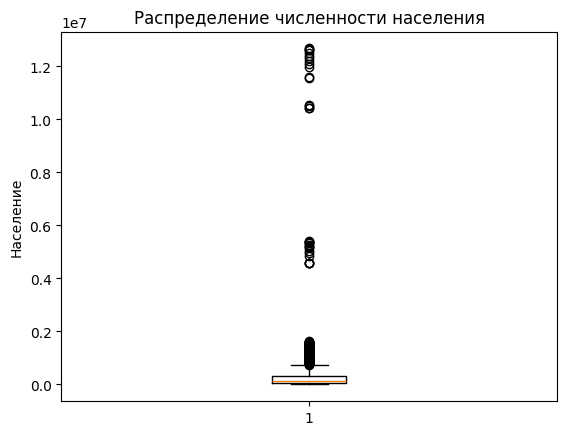

In [101]:
plt.boxplot(population)
plt.title('Распределение численности населения')
plt.ylabel('Население')
plt.show()

Из-за большого числа выбросов диаграмма получилась ненаглядна. Так как данные ассиметричны, то есть имеется большое число именно верхних выбросов. Для наглядной визуалиции не будем рассматривать значения выше 2000000:

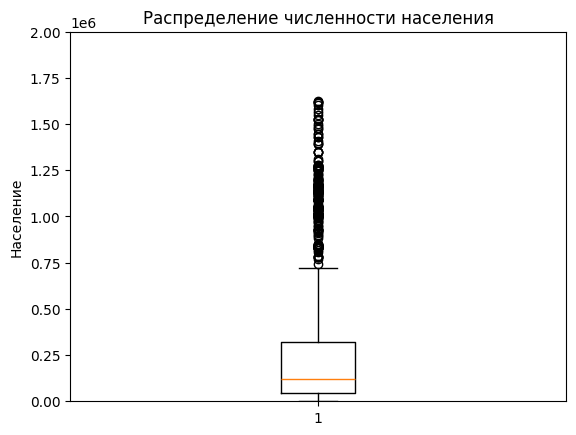

In [102]:
plt.boxplot(population)
plt.title('Распределение численности населения')
plt.ylabel('Население')
plt.axis(ymin=0, ymax=2000000)
plt.show()

Построим "ящик с усами" для данных без выбросов:

Построим гистограмму:

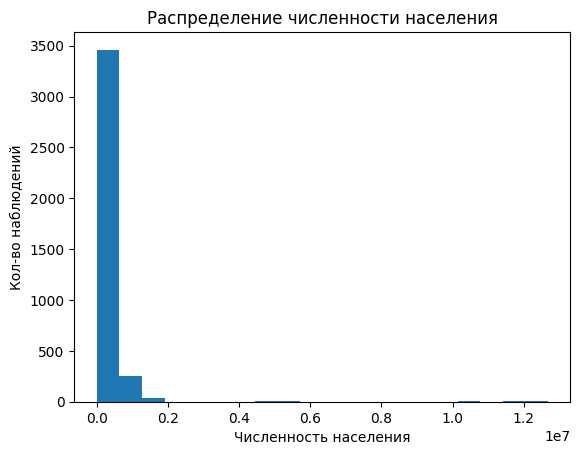

In [103]:
plt.hist(population, bins=20)
plt.title('Распределение численности населения')
plt.xlabel('Численность населения')
plt.ylabel('Кол-во наблюдений')
plt.show()

Из-за большого числа выбросов диаграмма получилась ненаглядна. Так как данные ассиметричны, то есть имеется большое число именно верхних выбросов. Для наглядной визуалиции не будем рассматривать значения больше 2000000:

In [104]:
population_without_outliers = air_pollution_df_copy[air_pollution_df_copy['population'] <= 2000000]['population'].copy()

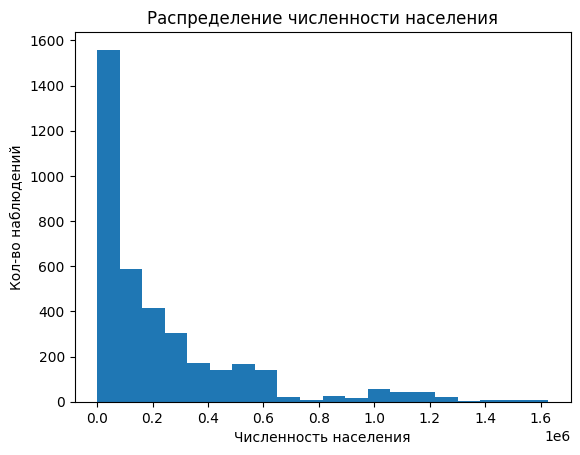

In [105]:
plt.hist(population_without_outliers, bins=20)
plt.title('Распределение численности населения')
plt.xlabel('Численность населения')
plt.ylabel('Кол-во наблюдений')
plt.show()

**Выводы по разделу с анализом численности населения городов (вернее, населённых пунктов):**
1.   Максимальное и минимальное значения признака *population* сильно отличаются. Наибольшая численность населения в датасете — 12678100 чел., наименьшая — 200 чел. Таким образом, размах значений *population* очень велик, он равен 12677900.
2.   Среди значений *population* нулевые значения отсутствуют.
3.   Средняя численность населения города — 303617 чел., медианная численность — 118400 чел. Разница между средним значением и медианой приближенно равна 185217 чел. Это более чем значительное отличие (среднее больше медианы примерно в 2.5 раза). Вероятными причинами этого являются большой размах выборки и большое число выбросов, сдвигающие среднее вверх.
4.  *   численность населения 10% н.п. не превышает 15800 чел.;
    *   численность населения 25% н.п. не превышает 42200 чел.;
    *   численность населения 50% н.п. не превышает 118400 чел.;
    *   численность населения 75% н.п. не превышает 319000 чел.;
    *   численность населения 90% н.п. не превышает 606960 чел.
5.   

*   Для наглядности диаграмм предварительно были исключены выбросы, так как их в выборке было слишком много.
*   "Ящик с усами" показывает, что наиболее характерными для выборки численностей населения являются значения от 40000 чел. до 320000 чел., характерными — от 200 чел. до 700000 чел. Остальные значения менее характерны. В выборке имеется очень много верхних выбросов.
*   Гистограмма показывает, что значительная часть н.п. имеют численность менее 50000 чел (около трети всей выборки), а чем больше численность населения, тем меньше населенных пунктов в датасете с такой численностью.

### *9.2. solid_emissions*

In [106]:
solid_emissions = air_pollution_df_copy['solid_emissions']
solid_emissions

0       23.80
1        9.00
2        2.90
3       12.30
4        0.40
        ...  
3784     0.80
3785     0.70
3786     0.02
3787     0.30
3788     1.30
Name: solid_emissions, Length: 3789, dtype: float64

Рассчитаем максимальное и минимальное значения объем выбросов от промышленных предприятий твердых веществ:

In [107]:
max_volume = solid_emissions.max()
min_volume = solid_emissions.min()
print('Наибольший объем выбросов твердых веществ: ', max_volume, '; Наименьший объем выбросов твердых веществ: ', min_volume)

Наибольший объем выбросов твердых веществ:  70.7 ; Наименьший объем выбросов твердых веществ:  0.0


Рассмотрим наблюдения, у которых значение по признаку solid_emissions равно 0.0:

In [108]:
air_pollution_df_copy[air_pollution_df_copy['solid_emissions']==0.0]

year    economic_region                region                 city  \
1006  2011        Центральный   Костромская область         ВОЛГОРЕЧЕНСК   
1239  2012        Центральный   Костромская область         ВОЛГОРЕЧЕНСК   
1473  2013        Центральный   Костромская область         ВОЛГОРЕЧЕНСК   
2874  2019        Центральный   Костромская область         ВОЛГОРЕЧЕНСК   
2930  2019          Уральский  Оренбургская область             КУВАНДЫК   
2964  2019  Северо-Кавказский       Республика Крым              АРМЯНСК   
3040  2019    Дальневосточный      Хабаровский край  НИКОЛАЕВСК-НА-АМУРЕ   
3281  2020    Дальневосточный      Хабаровский край  НИКОЛАЕВСК-НА-АМУРЕ   

      population  pollution_level  solid_emissions  so2_emissions  \
1006       17100                1              0.0          1.100   
1239       17100                1              0.0          0.500   
1473       16900                1              0.0            NaN   
2874       16400                1              0.0          0.900   
2930       23400                2              0.0          0.001   
2964       21600                2              0.0          0.000   
3040       18200                1              0.0          0.000   
3281       17900                1              0.0          0.100   

      no2_emissions  co_emissions  exceeded_mpc_pollutants_count  \
1006           11.1         1.100                              1   
1239           13.1         0.800                              1   
1473           13.0         0.100                              1   
2874           14.0         0.900                              0   
2930            0.4         0.800                              1   
2964            0.0         0.001                              1   
3040            0.8         1.100                              0   
3281            0.7         0.800                              1   

      huge_standard_index_pollutants_count  stantions_count  
1006                                     0                1  
1239                                     0                1  
1473                                     0                1  
2874                                     0                1  
2930                                     0                2  
2964                                     0                2  
3040                                     0                1  
3281                                     0                1

Рассчитаем среднее значение признака:

In [109]:
mean_volume = solid_emissions.mean()
print('Средний объем выбросов твердых веществ: ', mean_volume)

Средний объем выбросов твердых веществ:  3.9535536931818185


Рассчитаем медианное значение признака:

In [110]:
median_volume = solid_emissions.median()
print('Медианный объем выбросов твердых веществ: ', median_volume)

Медианный объем выбросов твердых веществ:  1.3


In [111]:
print('Разница между медианой и средним: ', mean_volume - median_volume)

Разница между медианой и средним:  2.653553693181818


Рассчитаем процентили (10, 25, 50, 75, 90):

In [112]:
percentile_10_value = solid_emissions.quantile(0.1)
percentile_25_value = solid_emissions.quantile(0.25)
percentile_50_value = solid_emissions.quantile(0.5)
percentile_75_value = solid_emissions.quantile(0.75)
percentile_90_value = solid_emissions.quantile(0.9)
print('10-й процентиль объемов выбросов твердых веществ: ', percentile_10_value)
print('25-й процентиль объемов выбросов твердых веществ: ', percentile_25_value)
print('50-й процентиль объемов выбросов твердых веществ: ', percentile_50_value)
print('75-й процентиль объемов выбросов твердых веществ: ', percentile_75_value)
print('90-й процентиль объемов выбросов твердых веществ: ', percentile_90_value)

10-й процентиль объемов выбросов твердых веществ:  0.1
25-й процентиль объемов выбросов твердых веществ:  0.34
50-й процентиль объемов выбросов твердых веществ:  1.3
75-й процентиль объемов выбросов твердых веществ:  4.0
90-й процентиль объемов выбросов твердых веществ:  11.8


Выведем таблицу с показателями описательной статистики:

In [113]:
solid_emissions.describe()

count    3520.000000
mean        3.953554
std         6.762255
min         0.000000
25%         0.340000
50%         1.300000
75%         4.000000
max        70.700000
Name: solid_emissions, dtype: float64

Построим диаграмму "ящик с усами":

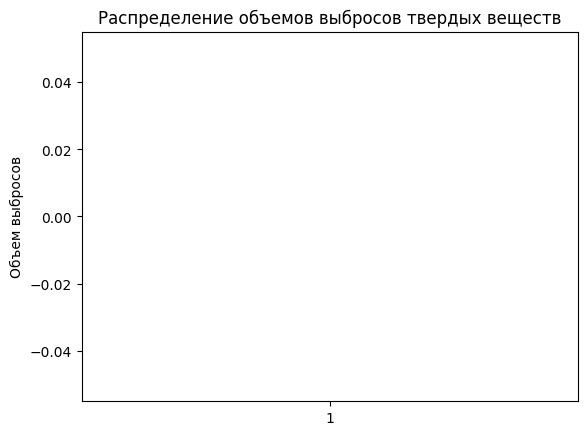

In [114]:
plt.boxplot(solid_emissions)
plt.title('Распределение объемов выбросов твердых веществ')
plt.ylabel('Объем выбросов')
plt.show()

Диаграмма пустая. Это связано с наличием пропущенных значений по признаку. Очистим колонку от пустых значений с помощью dropna и попробуем заново построить "ящик с усами":

In [115]:
solid_emissions_without_na = solid_emissions.dropna()

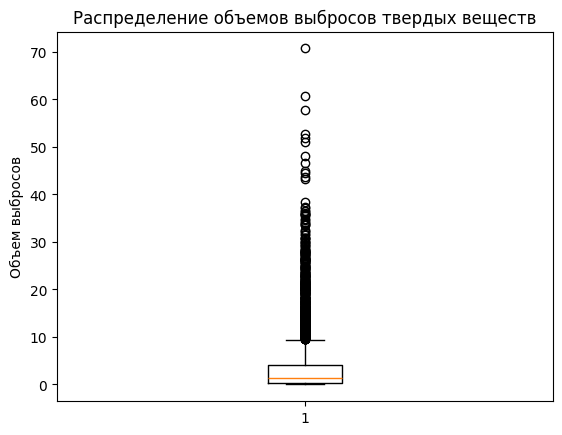

In [116]:
plt.boxplot(solid_emissions_without_na)
plt.title('Распределение объемов выбросов твердых веществ')
plt.ylabel('Объем выбросов')
plt.show()

Из-за большого числа выбросов диаграмма получилась ненаглядна. Так как данные ассиметричны, то есть имеется большое число именно верхних выбросов. Для наглядной визуалиции не будем рассматривать значения большие 40 тыс. т (т.е. выбросов, лежащих неплотно):

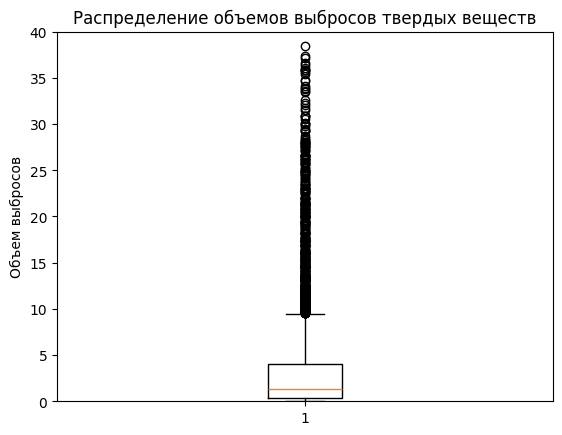

In [117]:
plt.boxplot(solid_emissions_without_na)
plt.title('Распределение объемов выбросов твердых веществ')
plt.ylabel('Объем выбросов')
plt.axis(ymin=0, ymax=40)
plt.show()

Построим гистограмму:

In [118]:
solid_emissions_without_na_and_outliers = air_pollution_df_copy[air_pollution_df_copy['solid_emissions'] <= 40]['solid_emissions'].dropna().copy()

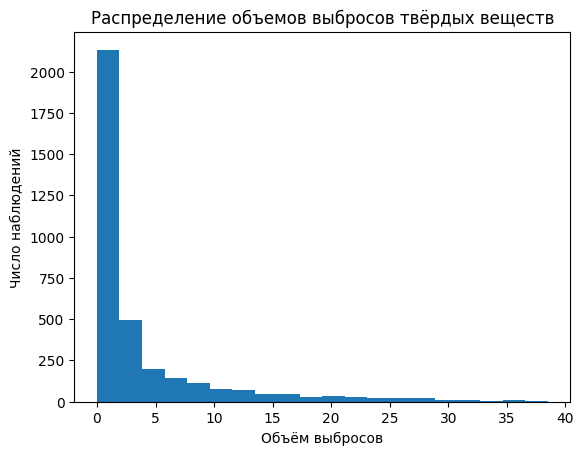

In [119]:
plt.hist(solid_emissions_without_na_and_outliers, bins=20)
plt.title('Распределение объемов выбросов твёрдых веществ')
plt.xlabel('Объём выбросов')
plt.ylabel('Число наблюдений')
plt.show()

**Выводы по разделу с анализом объёмов выбросов от промышленных предприятий твёрдых веществ:**
1.   Максимальное и минимальное значения признака *solid_emissions* сильно отличаются. Наибольший объем выбросов твердых веществ в датасете — 70.7 тыс. т, наименьший — 0.0. Таким образом, размах значений *solid_emissions* очень велик, он равен 70.7 тыс..
2.   Среди значений *solid_emissions* имеются нулевые значения. Исключать их не стоит, так как они лишь означают отсутствие соответствующих выбросов.
3.   Средний объем выбросов твердых веществ — 3.95 тыс. т, медианный объем — 1.3 тыс. т. Разница между средним значением и медианой приближенно равна 2.65 тыс. т. Это более чем значительное отличие (среднее больше медианы примерно в 3 раза). Вероятными причинами этого являются большой размах выборки и большое число выбросов, сдвигающие среднее вверх.
4.  *   объем выбросов твёрдых веществ 10% пром. предприятий не превышает 0.1 тыс. т;
    *   объем выбросов твёрдых веществ 25% пром. предприятий не превышает 0.34 тыс. т;
    *   объем выбросов твёрдых веществ 50% пром. предприятий не превышает 1.3 тыс. т;
    *   объем выбросов твёрдых веществ 75% пром. предприятий не превышает 4.0 тыс. т;
    *   объем выбросов твёрдых веществ 90% пром. предприятий не превышает 11.8 тыс. т.
5.   

*   Для наглядности диаграмм предварительно были исключены выбросы, так как их в выборке было слишком много.
*   "Ящик с усами" показывает, что наиболее характерными для выборки объемов выбросов твердых веществ являются значения от 0.3 тыс. т до 4 тыс. т, характерными — от 0 до 9 тыс. т. Остальные значения менее характерны. В выборке имеется очень много верхних выбросов.
*   Гистограмма показывает, что значительная часть пром. предприятий имеют объем выбросов твёрдых веществ численность менее 0.5 тыс. т (около трети всей выборки), а чем объем выбросов твёрдых веществ, тем меньше наблюдений с таким объемом.

### *9.3. so2_emissions*

In [120]:
so2_emissions = air_pollution_df_copy['so2_emissions']
so2_emissions

0       14.70
1        7.40
2        4.80
3        3.80
4        0.30
        ...  
3784     0.30
3785     0.03
3786     0.08
3787     0.10
3788    13.10
Name: so2_emissions, Length: 3789, dtype: float64

Рассчитаем максимальное и минимальное значения объем выбросов от промышленных предприятий диоксида серы:

In [121]:
max_volume = so2_emissions.max()
min_volume = so2_emissions.min()
print('Наибольший объем выбросов диоксида серы: ', max_volume, '; Наименьший объем выбросов диоксида серы: ', min_volume)

Наибольший объем выбросов диоксида серы:  1950.5 ; Наименьший объем выбросов диоксида серы:  0.0


Рассчитаем среднее значение признака:

In [122]:
mean_volume = so2_emissions.mean()
print('Средний объем выбросов диоксида серы: ', mean_volume)

Средний объем выбросов диоксида серы:  14.550785693929893


Рассчитаем медианное значение признака:

In [123]:
median_volume = so2_emissions.median()
print('Медианный объем выбросов диоксида серы: ', median_volume)

Медианный объем выбросов диоксида серы:  0.9


In [124]:
print('Разница между медианой и средним: ', mean_volume - median_volume)

Разница между медианой и средним:  13.650785693929892


Рассчитаем процентили (10, 25, 50, 75, 90):

In [125]:
percentile_10_value = so2_emissions.quantile(0.1)
percentile_25_value = so2_emissions.quantile(0.25)
percentile_50_value = so2_emissions.quantile(0.5)
percentile_75_value = so2_emissions.quantile(0.75)
percentile_90_value = so2_emissions.quantile(0.9)
print('10-й процентиль объемов выбросов диоксида серы: ', percentile_10_value)
print('25-й процентиль объемов выбросов диоксида серы: ', percentile_25_value)
print('50-й процентиль объемов выбросов диоксида серы: ', percentile_50_value)
print('75-й процентиль объемов выбросов диоксида серы: ', percentile_75_value)
print('90-й процентиль объемов выбросов диоксида серы: ', percentile_90_value)

10-й процентиль объемов выбросов диоксида серы:  0.06
25-й процентиль объемов выбросов диоксида серы:  0.2
50-й процентиль объемов выбросов диоксида серы:  0.9
75-й процентиль объемов выбросов диоксида серы:  5.6
90-й процентиль объемов выбросов диоксида серы:  17.82000000000003


Выведем таблицу с показателями описательной статистики:

In [126]:
so2_emissions.describe()

count    3509.000000
mean       14.550786
std       124.142509
min         0.000000
25%         0.200000
50%         0.900000
75%         5.600000
max      1950.500000
Name: so2_emissions, dtype: float64

Построим диаграмму "ящик с усами":

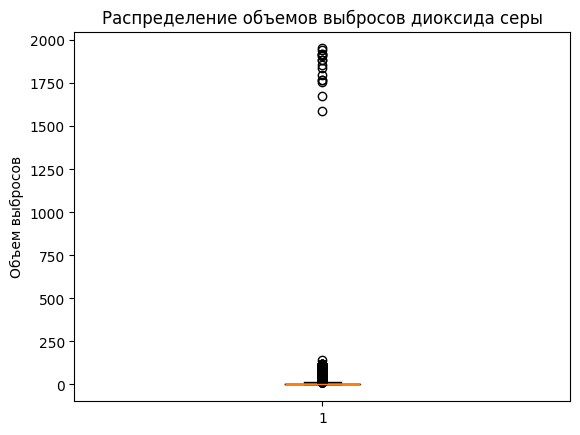

In [127]:
plt.boxplot(so2_emissions.dropna())
plt.title('Распределение объемов выбросов диоксида серы')
plt.ylabel('Объем выбросов')
plt.show()

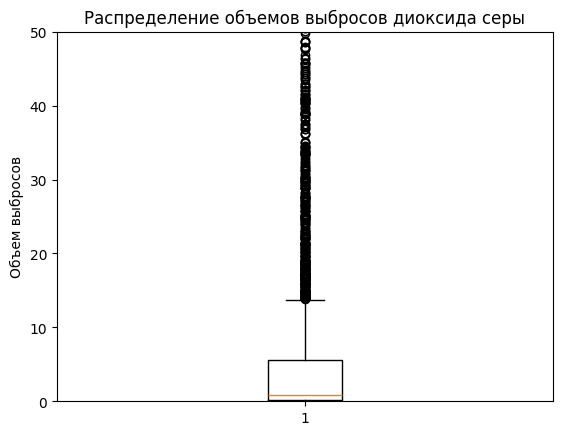

In [128]:
plt.boxplot(so2_emissions.dropna())
plt.title('Распределение объемов выбросов диоксида серы')
plt.ylabel('Объем выбросов')
plt.axis(ymin=0, ymax=50)
plt.show()

Построим гистограмму:

In [129]:
so2_emissions_without_na_and_outliers = air_pollution_df_copy[air_pollution_df_copy['so2_emissions'] <= 50]['so2_emissions'].dropna().copy()

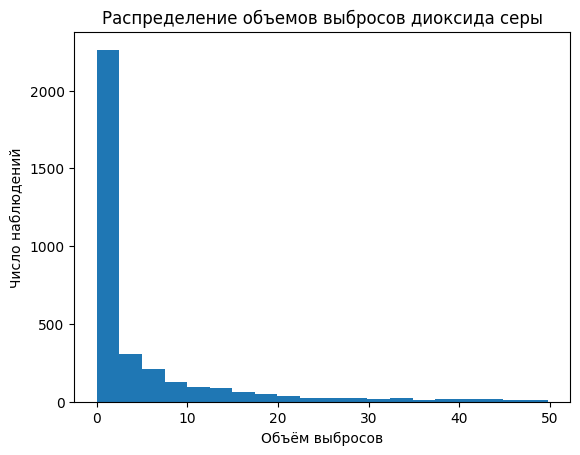

In [130]:
plt.hist(so2_emissions_without_na_and_outliers, bins=20)
plt.title('Распределение объемов выбросов диоксида серы')
plt.xlabel('Объём выбросов')
plt.ylabel('Число наблюдений')
plt.show()

**Выводы по разделу с анализом объёмов выбросов от промышленных предприятий диоксида серы:**
1.   Максимальное и минимальное значения признака *so2_emissions* сильно отличаются. Наибольший объем выбросов диоксида серы в датасете — 1950.5 тыс. т, наименьший — 0.0. Таким образом, размах значений *so2_emissions* очень велик, он равен 1950.5 тыс.
2.   Среди значений *so2_emissions* имеются нулевые значения. Исключать их не стоит, так как они лишь означают отсутствие соответствующих выбросов.
3.   Средний объем выбросов диоксида серы — 14.55 тыс. т, медианный объем — 0.9 тыс. т. Разница между средним значением и медианой приближенно равна 13.25 тыс. т. Это более чем значительное отличие (огромное!) (среднее больше медианы более, чем в 10(!) раз). Вероятными причинами этого являются огромный размах выборки и очень большое число выбросов, сдвигающие среднее вверх.
4.  *   объем выбросов диоксида серы 10% пром. предприятий не превышает 0.06 тыс. т;
    *   объем выбросов диоксида серы 25% пром. предприятий не превышает 0.2 тыс. т;
    *   объем выбросов диоксида серы 50% пром. предприятий не превышает 0.9 тыс. т;
    *   объем выбросов диоксида серы 75% пром. предприятий не превышает 5.6 тыс. т;
    *   объем выбросов диоксида серы 90% пром. предприятий не превышает 17.82 тыс. т.
5.   

*   Для наглядности диаграмм предварительно были исключены выбросы, так как их в выборке было слишком много.
*   "Ящик с усами" показывает, что наиболее характерными для выборки объемов выбросов диоксида серы являются значения от 0.2 тыс. т до 5.6 тыс. т, характерными — от 0 до 12 тыс. т (среднее значение выборки почти в 2 раза больше!). Остальные значения менее характерны. В выборке имеется очень много верхних выбросов.
*   Гистограмма показывает, что значительная часть пром. предприятий имеют объем выбросов диоксида серы численность менее 1.0 тыс. т (более половины всей выборки), а чем объем выбросов диоксида серы больше, тем меньше наблюдений с таким объемом.

### *9.4. no2_emissions*

In [131]:
no2_emissions = air_pollution_df_copy['no2_emissions']
no2_emissions

0       4.3
1       2.9
2       2.4
3       4.0
4       0.2
       ... 
3784    0.6
3785    0.5
3786    0.2
3787    0.8
3788    9.5
Name: no2_emissions, Length: 3789, dtype: float64

Рассчитаем максимальное и минимальное значения объем выбросов от промышленных предприятий диоксида азота:

In [132]:
max_volume = no2_emissions.max()
min_volume = no2_emissions.min()
print('Наибольший объем выбросов диоксида азота: ', max_volume, '; Наименьший объем выбросов диоксида азота: ', min_volume)

Наибольший объем выбросов диоксида азота:  728.9 ; Наименьший объем выбросов диоксида азота:  0.0


Рассчитаем среднее значение признака:

In [133]:
mean_volume = no2_emissions.mean()
print('Средний объем выбросов диоксида азота: ', mean_volume)

Средний объем выбросов диоксида азота:  7.272724293785311


Рассчитаем медианное значение признака:

In [134]:
median_volume = no2_emissions.median()
print('Медианный объем выбросов диоксида азота: ', median_volume)

Медианный объем выбросов диоксида азота:  3.1


In [135]:
print('Разница между медианой и средним: ', mean_volume - median_volume)

Разница между медианой и средним:  4.172724293785311


Рассчитаем процентили (10, 25, 50, 75, 90):

In [136]:
percentile_10_value = no2_emissions.quantile(0.1)
percentile_25_value = no2_emissions.quantile(0.25)
percentile_50_value = no2_emissions.quantile(0.5)
percentile_75_value = no2_emissions.quantile(0.75)
percentile_90_value = no2_emissions.quantile(0.9)
print('10-й процентиль объемов выбросов диоксида азота: ', percentile_10_value)
print('25-й процентиль объемов выбросов диоксида азота: ', percentile_25_value)
print('50-й процентиль объемов выбросов диоксида азота: ', percentile_50_value)
print('75-й процентиль объемов выбросов диоксида азота: ', percentile_75_value)
print('90-й процентиль объемов выбросов диоксида азота: ', percentile_90_value)

10-й процентиль объемов выбросов диоксида азота:  0.24900000000000033
25-й процентиль объемов выбросов диоксида азота:  0.9575
50-й процентиль объемов выбросов диоксида азота:  3.1
75-й процентиль объемов выбросов диоксида азота:  8.3
90-й процентиль объемов выбросов диоксида азота:  16.8


Выведем таблицу с показателями описательной статистики:

In [137]:
no2_emissions.describe()

count    3540.000000
mean        7.272724
std        18.391001
min         0.000000
25%         0.957500
50%         3.100000
75%         8.300000
max       728.900000
Name: no2_emissions, dtype: float64

Построим диаграмму "ящик с усами":

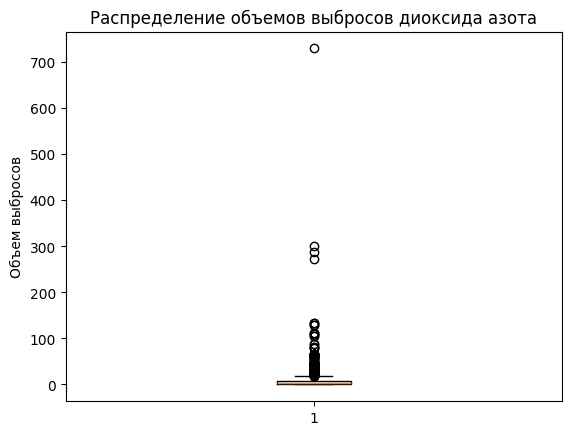

In [138]:
plt.boxplot(no2_emissions.dropna())
plt.title('Распределение объемов выбросов диоксида азота')
plt.ylabel('Объем выбросов')
plt.show()

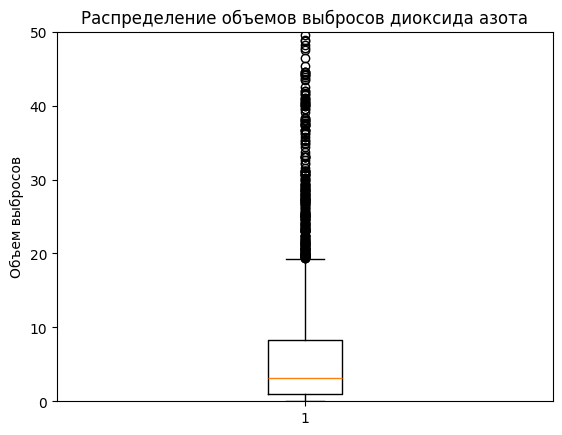

In [139]:
plt.boxplot(no2_emissions.dropna())
plt.title('Распределение объемов выбросов диоксида азота')
plt.ylabel('Объем выбросов')
plt.axis(ymin=0, ymax=50)
plt.show()

Построим гистограмму:

In [140]:
no2_emissions_without_na_and_outliers = air_pollution_df_copy[air_pollution_df_copy['no2_emissions'] <= 50]['no2_emissions'].dropna().copy()

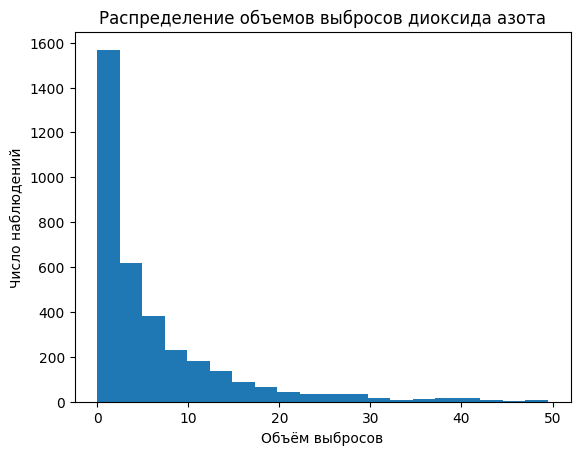

In [141]:
plt.hist(no2_emissions_without_na_and_outliers, bins=20)
plt.title('Распределение объемов выбросов диоксида азота')
plt.xlabel('Объём выбросов')
plt.ylabel('Число наблюдений')
plt.show()

**Выводы по разделу с анализом объёмов выбросов от промышленных предприятий диоксида азота:**
1.   Максимальное и минимальное значения признака *no2_emissions* сильно отличаются. Наибольший объем выбросов диоксида азота в датасете — 728.9 тыс. т, наименьший — 0.0. Таким образом, размах значений *no2_emissions* очень велик, он равен 728.9 тыс.
2.   Среди значений *no2_emissions* имеются нулевые значения. Исключать их не стоит, так как они лишь означают отсутствие соответствующих выбросов.
3.   Средний объем выбросов диоксида азота — 7.27 тыс. т, медианный объем — 3.1 тыс. т. Разница между средним значением и медианой равна 4.17 тыс. т. Это более чем значительное отличие (медиана более, чем в 2 раза больше среднего). Вероятными причинами этого являются большой размах выборки и очень большое число выбросов, сдвигающие среднее вверх.
4.  *   объем выбросов диоксида азота 10% пром. предприятий не превышает 0.25 тыс. т;
    *   объем выбросов диоксида азота 25% пром. предприятий не превышает 0.96 тыс. т;
    *   объем выбросов диоксида азота 50% пром. предприятий не превышает 3.1 тыс. т;
    *   объем выбросов диоксида азота 75% пром. предприятий не превышает 8.3 тыс. т;
    *   объем выбросов диоксида азота 90% пром. предприятий не превышает 16.8 тыс. т.
5.   

*   Для наглядности диаграмм предварительно были исключены выбросы, так как их в выборке было слишком много.
*   "Ящик с усами" показывает, что наиболее характерными для выборки объемов выбросов диоксида азота являются значения от 1.0 тыс. т до 8 тыс. т, характерными — от 0.0 до 19.0 тыс. т. Остальные значения менее характерны. В выборке имеется очень много верхних выбросов.
*   Гистограмма показывает, что значительная часть пром. предприятий имеют объем выбросов диоксида азота численность менее 1.0 тыс. т (около 25%), а чем больше объем выбросов диоксида азота, тем меньше наблюдений с таким объемом.

### *9.5. co_emissions*

In [142]:
co_emissions = air_pollution_df_copy['co_emissions']
co_emissions

0        4.6
1       12.7
2       17.8
3        6.2
4        1.4
        ... 
3784     1.6
3785     1.0
3786     0.5
3787     1.4
3788     5.3
Name: co_emissions, Length: 3789, dtype: float64

Рассчитаем максимальное и минимальное значения объем выбросов от промышленных предприятий монооксида углерода:

In [143]:
max_volume = co_emissions.max()
min_volume = co_emissions.min()
print('Наибольший объем выбросов монооксида углерода: ', max_volume, '; Наименьший объем выбросов монооксида углерода: ', min_volume)

Наибольший объем выбросов монооксида углерода:  1125.7 ; Наименьший объем выбросов монооксида углерода:  0.0


Рассчитаем среднее значение признака:

In [144]:
mean_volume = co_emissions.mean()
print('Средний объем выбросов монооксида углерода: ', mean_volume)

Средний объем выбросов монооксида углерода:  24.440720982773225


Рассчитаем медианное значение признака:

In [145]:
median_volume = co_emissions.median()
print('Медианный объем выбросов диоксида азота: ', median_volume)

Медианный объем выбросов диоксида азота:  6.3


In [146]:
print('Разница между медианой и средним: ', mean_volume - median_volume)

Разница между медианой и средним:  18.140720982773225


Рассчитаем процентили (10, 25, 50, 75, 90):

In [147]:
percentile_10_value = co_emissions.quantile(0.1)
percentile_25_value = co_emissions.quantile(0.25)
percentile_50_value = co_emissions.quantile(0.5)
percentile_75_value = co_emissions.quantile(0.75)
percentile_90_value = co_emissions.quantile(0.9)
print('10-й процентиль объемов выбросов монооксида углерода: ', percentile_10_value)
print('25-й процентиль объемов выбросов монооксида углерода: ', percentile_25_value)
print('50-й процентиль объемов выбросов монооксида углерода: ', percentile_50_value)
print('75-й процентиль объемов выбросов монооксида углерода: ', percentile_75_value)
print('90-й процентиль объемов выбросов монооксида углерода: ', percentile_90_value)

10-й процентиль объемов выбросов монооксида углерода:  0.5
25-й процентиль объемов выбросов монооксида углерода:  1.6
50-й процентиль объемов выбросов монооксида углерода:  6.3
75-й процентиль объемов выбросов монооксида углерода:  21.8
90-й процентиль объемов выбросов монооксида углерода:  58.8


Выведем таблицу с показателями описательной статистики:

In [148]:
co_emissions.describe()

count    3541.000000
mean       24.440721
std        61.292389
min         0.000000
25%         1.600000
50%         6.300000
75%        21.800000
max      1125.700000
Name: co_emissions, dtype: float64

Построим диаграмму "ящик с усами":

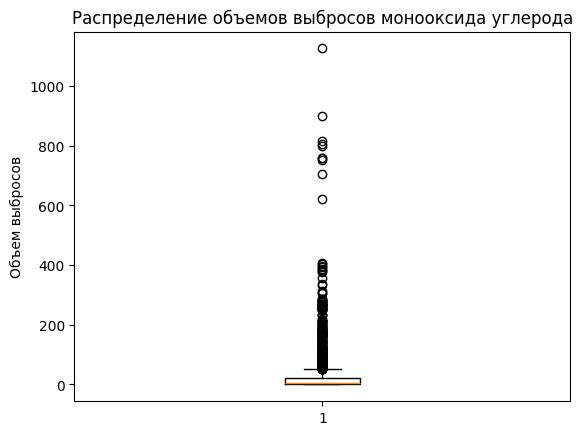

In [149]:
plt.boxplot(co_emissions.dropna())
plt.title('Распределение объемов выбросов монооксида углерода')
plt.ylabel('Объем выбросов')
plt.show()

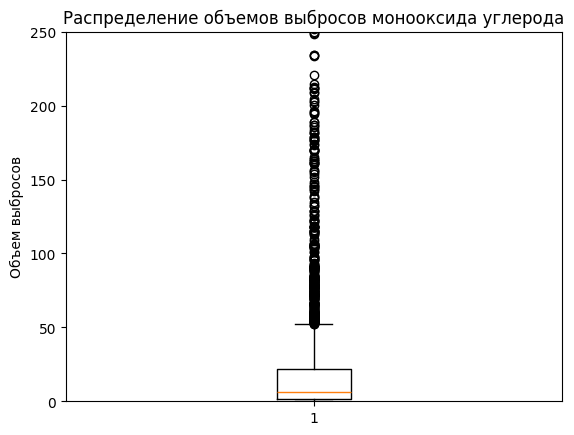

In [150]:
plt.boxplot(co_emissions.dropna())
plt.title('Распределение объемов выбросов монооксида углерода')
plt.ylabel('Объем выбросов')
plt.axis(ymin=0, ymax=250)
plt.show()

Построим гистограмму:

In [151]:
co_emissions_without_na_and_outliers = air_pollution_df_copy[air_pollution_df_copy['co_emissions'] <= 250]['co_emissions'].dropna().copy()

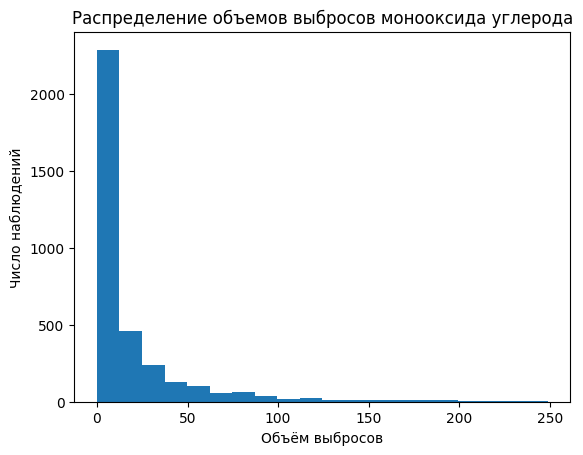

In [152]:
plt.hist(co_emissions_without_na_and_outliers, bins=20)
plt.title('Распределение объемов выбросов монооксида углерода')
plt.xlabel('Объём выбросов')
plt.ylabel('Число наблюдений')
plt.show()

**Выводы по разделу с анализом объёмов выбросов от промышленных предприятий монооксида углерода:**
1.   Максимальное и минимальное значения признака *co_emissions* сильно отличаются. Наибольший объем выбросов монооксида углерода в датасете — 1125.7 тыс. т, наименьший — 0.0. Таким образом, размах значений *co_emissions* очень велик, он равен 1125.7 тыс.
2.   Среди значений *co_emissions* имеются нулевые значения. Исключать их не стоит, так как они лишь означают отсутствие соответствующих выбросов.
3.   Средний объем выбросов монооксида углерода — 7.27 тыс. т, медианный объем — 24.44 тыс. т. Разница между средним значением и медианой равна 6.3 тыс. т. Это более чем значительное отличие (медиана примерно в 4 раза больше среднего). Вероятными причинами этого являются большой размах выборки и очень большое число выбросов, сдвигающие среднее вверх.
4.  *   объем выбросов монооксида углерода 10% пром. предприятий не превышает 0.5 тыс. т;
    *   объем выбросов монооксида углерода 25% пром. предприятий не превышает 1.6 тыс. т;
    *   объем выбросов монооксида углерода 50% пром. предприятий не превышает 6.3 тыс. т;
    *   объем выбросов монооксида углерода 75% пром. предприятий не превышает 21.8 тыс. т;
    *   объем выбросов монооксида углерода 90% пром. предприятий не превышает 58.8 тыс. т.
5.   

*   Для наглядности диаграмм предварительно были исключены выбросы, так как их в выборке было слишком много.
*   "Ящик с усами" показывает, что наиболее характерными для выборки объемов выбросов монооксида углерода являются значения от 1.5 тыс. т до 21 тыс. т, характерными — от 0.0 до 50.0 тыс. т. Остальные значения менее характерны. В выборке имеется очень много верхних выбросов.
*   Гистограмма показывает, что значительная часть пром. предприятий имеют объем выбросов монооксида углерода численность менее 1.0 тыс. т (около 25%), а чем больше объем выбросов монооксида углерода, тем меньше наблюдений с таким объемом.

## 10. Неграфический и графический анализ порядковых признаков

### *10.1. year*

Данные в датасете представлены с 2007 по 2022 годы, это всего лишь 16 значений, что немного, следовательно, рассматривать года как числа в данном случае не имеет смысла. Поэтому для анализа преобразуем данные из int в object:

In [153]:
year = air_pollution_df_copy['year'].astype('object')

Оценим описательные статистики признака:

In [154]:
year.describe()

count     3789
unique      16
top       2021
freq       244
Name: year, dtype: int64

Изучим уникальные значения признака:

In [155]:
year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022], dtype=object)

Проведем неграфический структурный анализ:

In [156]:
year.value_counts()

year
2021    244
2009    243
2022    243
2007    242
2008    242
2020    241
2019    240
2014    238
2012    235
2015    235
2018    235
2017    232
2013    231
2010    230
2011    229
2016    229
Name: count, dtype: int64

Сохраним результаты работы метода value_counts() в переменную year_counts:

In [157]:
year_counts = year.value_counts().sort_values(ascending=True)

Построим горизонтальную столбчатую диаграмму:

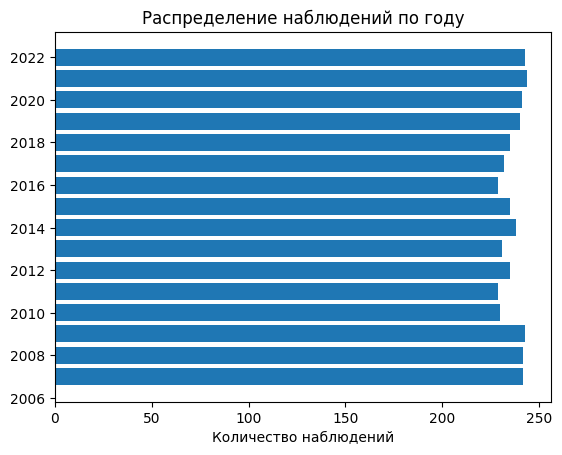

In [158]:
plt.barh(year_counts.index, year_counts.values)
plt.title('Распределение наблюдений по году')
plt.xlabel('Количество наблюдений')
plt.show()

**Выводы по разделу с анализом годов:**
1.   Имеется 16 уникальных значений признака *year*: года с 2007 по 2022.
2.   Наиболее часто встречаемый год в датасете — 2021. Он встречается 244 раз.
3.   Диапазон значений количества наблюдений по году совсем небольшой: от 229 до 244.
4.   И графический (столбчатая диаграмма), и неграфический (частотный ряд) анализ наглядно свидетельствуют о том, что наблюдения в датасете распределены по годам равномерно. Это позволит провести качественный анализ изменения состояния загрязнения атмосферы по годам.

### *10.2. pollution_level*

In [159]:
pollution_level = air_pollution_df_copy['pollution_level']

Вначале проведем небольшой анализ общего уровня загрязнения воздуха, как числового признака.

Выведем показатели описательной статистики:

In [160]:
pollution_level.describe()

count      3514.0
mean     2.139442
std      1.076583
min           1.0
25%           1.0
50%           2.0
75%           3.0
max           4.0
Name: pollution_level, dtype: Float64

Рассчитаем процентили (10, 25, 50, 75, 90) и выведем значения на печать:

In [161]:
percentile_10_value = pollution_level.quantile(0.1)
percentile_25_value = pollution_level.quantile(0.25)
percentile_50_value = pollution_level.quantile(0.5)
percentile_75_value = pollution_level.quantile(0.75)
percentile_90_value = pollution_level.quantile(0.9)
print('10-й процентиль уровня загрязнения атмосферы: ', percentile_10_value)
print('25-й процентиль уровня загрязнения атмосферы: ', percentile_25_value)
print('50-й процентиль уровня загрязнения атмосферы: ', percentile_50_value)
print('75-й процентиль уровня загрязнения атмосферы: ', percentile_75_value)
print('90-й процентиль уровня загрязнения атмосферы: ', percentile_90_value)

10-й процентиль уровня загрязнения атмосферы:  1
25-й процентиль уровня загрязнения атмосферы:  1
50-й процентиль уровня загрязнения атмосферы:  2
75-й процентиль уровня загрязнения атмосферы:  3
90-й процентиль уровня загрязнения атмосферы:  4


Далее проведем анализ общего уровня загрязнения атмосферы как категориального признака.

Преобразуем тип уровня загрязнения атмосферы из int64 в object:

In [162]:
pollution_level = pollution_level.astype('object')

In [163]:
pollution_level

0          4
1          3
2          3
3          4
4          1
        ... 
3784    <NA>
3785       1
3786       1
3787       2
3788       2
Name: pollution_level, Length: 3789, dtype: object

Оценим описательные статистики признака:

In [164]:
pollution_level.describe()

count     3514
unique       4
top          1
freq      1397
Name: pollution_level, dtype: int64

Изучим уникальные значения признака:

In [165]:
pollution_level.unique()

array([4, 3, 1, 2, <NA>], dtype=object)

Проведем неграфический структурный анализ:

In [166]:
pollution_level.value_counts()

pollution_level
1    1397
3    1031
2     658
4     428
Name: count, dtype: int64

Построим столбчатую диаграмму:

In [167]:
pollution_level_counts = pollution_level.value_counts().sort_values(ascending=True)

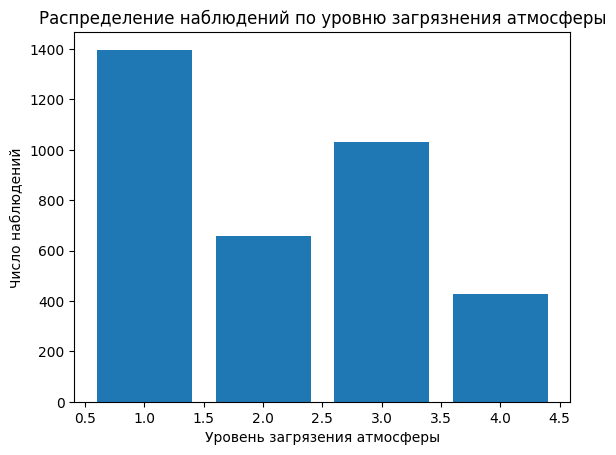

In [168]:
plt.bar(pollution_level_counts.index, pollution_level_counts.values)
plt.title('Распределение наблюдений по уровню загрязнения атмосферы')
plt.xlabel('Уровень загрязения атмосферы')
plt.ylabel('Число наблюдений')
plt.show()

Построим круговую диаграмму:

In [169]:
# Определяем цвета для каждого уровня загрязнения
colors = {1: "#2ca02c",  # зеленый - низкий уровень
          2: "#ffcc00",  # желтый - повышенный
          3: "#ff6600",  # оранжевый - высокий
          4: "#cc0000"}  # красный - очень высокий
labels = pollution_level_counts.index

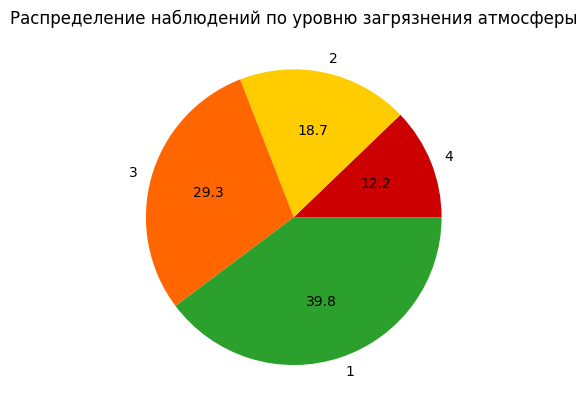

In [170]:
plt.pie(pollution_level_counts.values, labels=labels, colors=[colors[key] for key in labels], autopct='%.1f')
plt.title('Распределение наблюдений по уровню загрязнения атмосферы')
plt.show()

**Выводы по разделу с анализом уровней загрязнения атмосферы:**
1.   Имеется 4 уникальных значения признака *pollution_level*: "1" — Низкий, "2" — Повышенный, "3" — Высокий, "4" — Очень высокий.
2.   Наиболее часто встречаемый уровень загрязнения атмосферы в датасете — "1". Он встречается 1397 раз.
3.   Почти 40% наблюдений занимают записи о населенных пунктах с низким загрязнением атмосферы (уровень "1"). Почти 30% занимают записи о населенных пунктах с высоким загрязнением (уровень "3") — 1031 наблюдение. 18.7% занимают записи о населенных пунктах с повышенным загрязнением атмосферы (уровень "2") — 658 наблюдений. И самую небольшую часть (12.2%) занимают записи о населенных пунктах с очень высоким загрязнением атмосферы (уровень "4") — 428 наблюдений.
Получается, уровни загрязнения "1" и "2"  в сумме имеют 58.5% наблюдений, а уровни загрязнения "3" и "4" — 42.5% наблюдений.
4.   Усредненный уровень загрязнения атмосферы по всем наблюдениям — 2.14, медианный уровень — 2.
5.  *   уровень загрязнения атмосферы 10% н.п. не превышает 1;
    *   уровень загрязнения атмосферы 25% н.п. не превышает 1;
    *   уровень загрязнения атмосферы 50% н.п. не превышает 2;
    *   уровень загрязнения атмосферы 75% н.п. не превышает 3;
    *   уровень загрязнения атмосферы 90% н.п. не превышает 4.
6.   Столбчатая и круговая диаграммы не позволяют зафиксировать какую-либо зависимость уровня загрязнения атмосферы и числа наблюдений. Несмотря на то, что населенные пункты с низким уровнем загрязнения встречаются заметно чаще остальных, а с очень высоким уровнем заметно реже остальных, населенные пункты с высоким уровнем загрязнения встречаются значительно чаще населенных пунктов просто с повышенным уровнением загрязнения.

### *10.3. exceeded_mpc_pollutants_count*

In [171]:
exceeded_mpc_pollutants = air_pollution_df_copy['exceeded_mpc_pollutants_count']

Вначале проведем небольшой анализ количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК, как числового признака.

Выведем показатели описательной статистики:

In [172]:
exceeded_mpc_pollutants.describe()

count    3789.000000
mean        1.672209
std         1.442389
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: exceeded_mpc_pollutants_count, dtype: float64

Рассчитаем процентили (10, 25, 50, 75, 90):

In [173]:
percentile_10_value = exceeded_mpc_pollutants.quantile(0.1)
percentile_25_value = exceeded_mpc_pollutants.quantile(0.25)
percentile_50_value = exceeded_mpc_pollutants.quantile(0.5)
percentile_75_value = exceeded_mpc_pollutants.quantile(0.75)
percentile_90_value = exceeded_mpc_pollutants.quantile(0.9)
print('10-й процентиль количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК: ', percentile_10_value)
print('25-й процентиль количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК: ', percentile_25_value)
print('50-й процентиль количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК: ', percentile_50_value)
print('75-й процентиль количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК: ', percentile_75_value)
print('90-й процентиль количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК: ', percentile_90_value)

10-й процентиль количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК:  0.0
25-й процентиль количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК:  0.0
50-й процентиль количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК:  1.0
75-й процентиль количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК:  3.0
90-й процентиль количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК:  4.0


Далее проведем анализ количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК как категориального признака.

Преобразуем тип количества веществ из int64 в object:

In [174]:
exceeded_mpc_pollutants = exceeded_mpc_pollutants.astype('object')

Оценим описательные статистики признака:

In [175]:
exceeded_mpc_pollutants.describe()

count     3789
unique      11
top          0
freq       959
Name: exceeded_mpc_pollutants_count, dtype: int64

Изучим уникальные значения признака:

In [176]:
exceeded_mpc_pollutants.unique()

array([4, 2, 3, 1, 0, 5, 6, 7, 8, 9, 10], dtype=object)

Проведем неграфический структурный анализ:

In [177]:
exceeded_mpc_pollutants.value_counts()

exceeded_mpc_pollutants_count
0     959
1     957
2     875
3     574
4     273
5     106
6      36
7       6
8       1
9       1
10      1
Name: count, dtype: int64

Построим горизонтальную столбчатую диаграмму:

In [178]:
exceeded_mpc_pollutants_counts = exceeded_mpc_pollutants.value_counts().sort_values(ascending=True)

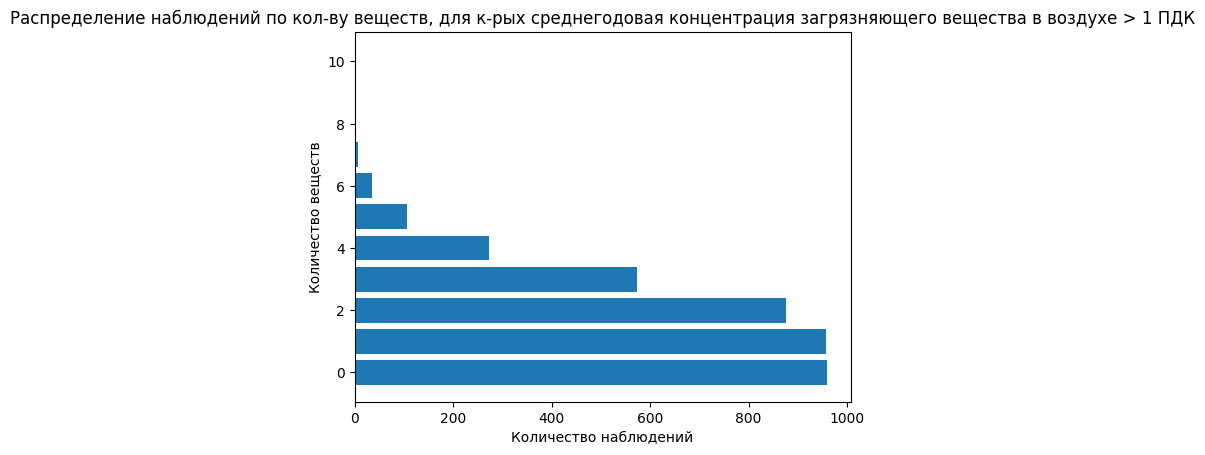

In [179]:
plt.barh(exceeded_mpc_pollutants_counts.index, exceeded_mpc_pollutants_counts.values)
plt.title('Распределение наблюдений по кол-ву веществ, для к-рых среднегодовая концентрация загрязняющего вещества в воздухе > 1 ПДК')
plt.xlabel('Количество наблюдений')
plt.ylabel('Количество веществ')
plt.show()

**Выводы по разделу с анализом количества веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК:**
1.   Имеется 11 уникальных значения признака *exceeded_mpc_pollutants_count*: значения от 0 до 10.
2.   Наиболее часто встречаемое число веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК — 0. Оно асто встречаемое встречается 959 раз. Наиболее ненулевое — 1. Оно встречается 957 раз.
3.   Усредненное число веществ — 1.67, медианное число — 1.
4.  *   число веществ со среднегодовой концентрацией загрязняющего вещества в воздухе превышающего 1 ПДК у 10% н.п. не превышает 0;
    *   число веществ со среднегодовой концентрацией загрязняющего вещества в воздухе превышающего 1 ПДК у 25% н.п. не превышает 0;
    *   число веществ со среднегодовой концентрацией загрязняющего вещества в воздухе превышающего 1 ПДК у 50% н.п. не превышает 1;
    *   число веществ со среднегодовой концентрацией загрязняющего вещества в воздухе превышающего 1 ПДК у 75% н.п. не превышает 3;
    *   число веществ со среднегодовой концентрацией загрязняющего вещества в воздухе превышающего 1 ПДК у 90% н.п. не превышает 4.
5.   Гистограмма наглядно демонстрирует четкую зависимость: чем больше число веществ, для которых среднегодовая концентрация загрязняющего вещества в воздухе превышает 1 ПДК, тем меньше населенных пунктов в датасете с таким числом.


### *10.4. huge_standard_index_pollutants_count*

In [180]:
huge_standard_index_pollutants = air_pollution_df_copy['huge_standard_index_pollutants_count']

Вначале проведем небольшой анализ количества вещвеществ, для которых стандартный индекс (СИ) > 10 ПДК, как числового признака.

Выведем показатели описательной статистики:

In [181]:
huge_standard_index_pollutants.describe()

count    3789.000000
mean        0.169174
std         0.430662
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: huge_standard_index_pollutants_count, dtype: float64

Рассчитаем процентили (10, 25, 50, 75, 90):

In [182]:
percentile_10_value = huge_standard_index_pollutants.quantile(0.1)
percentile_25_value = huge_standard_index_pollutants.quantile(0.25)
percentile_50_value = huge_standard_index_pollutants.quantile(0.5)
percentile_75_value = huge_standard_index_pollutants.quantile(0.75)
percentile_90_value = huge_standard_index_pollutants.quantile(0.9)
print('10-й процентиль количества веществ, для которых стандартный индекс (СИ) > 10 ПДК: ', percentile_10_value)
print('25-й процентиль количества веществ, для которых стандартный индекс (СИ) > 10 ПДК: ', percentile_25_value)
print('50-й процентиль количества веществ, для которых стандартный индекс (СИ) > 10 ПДК: ', percentile_50_value)
print('75-й процентиль количества веществ, для которых стандартный индекс (СИ) > 10 ПДК: ', percentile_75_value)
print('90-й процентиль количества веществ, для которых стандартный индекс (СИ) > 10 ПДК: ', percentile_90_value)

10-й процентиль количества веществ, для которых стандартный индекс (СИ) > 10 ПДК:  0.0
25-й процентиль количества веществ, для которых стандартный индекс (СИ) > 10 ПДК:  0.0
50-й процентиль количества веществ, для которых стандартный индекс (СИ) > 10 ПДК:  0.0
75-й процентиль количества веществ, для которых стандартный индекс (СИ) > 10 ПДК:  0.0
90-й процентиль количества веществ, для которых стандартный индекс (СИ) > 10 ПДК:  1.0


Далее проведем анализ количества веществ, я которых стандартный индекс (СИ) > 10 ПДК, как категориального признака.

In [183]:
huge_standard_index_pollutants = huge_standard_index_pollutants.astype('object')

Оценим описательные статистики:

In [184]:
huge_standard_index_pollutants.describe()

count     3789
unique       5
top          0
freq      3220
Name: huge_standard_index_pollutants_count, dtype: int64

Изучим уникальные значения признака:

In [185]:
huge_standard_index_pollutants.unique()

array([1, 0, 2, 3, 4], dtype=object)

Проведем неграфический структурный анализ:

In [186]:
huge_standard_index_pollutants.value_counts()

huge_standard_index_pollutants_count
0    3220
1     508
2      52
3       7
4       2
Name: count, dtype: int64

Построим столбчатую диаграмму:

In [187]:
huge_standard_index_pollutants_counts = huge_standard_index_pollutants.value_counts().sort_values(ascending=True)

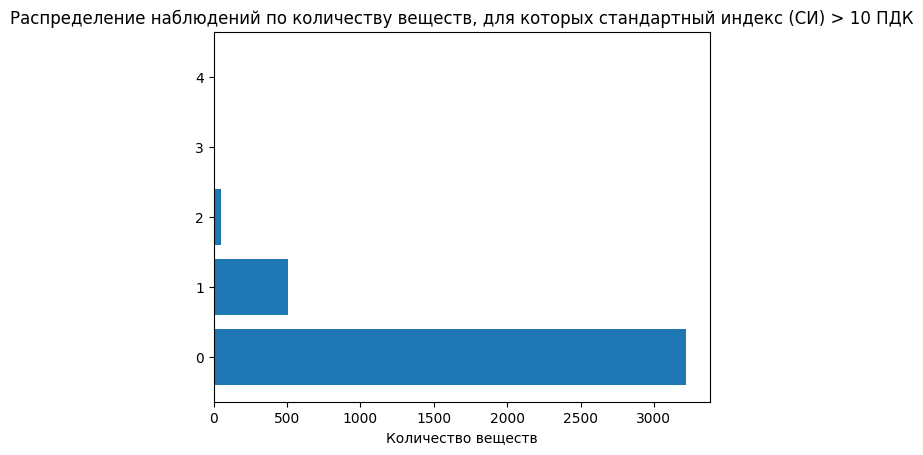

In [188]:
plt.barh(huge_standard_index_pollutants_counts.index, huge_standard_index_pollutants_counts.values)
plt.title('Распределение наблюдений по количеству веществ, для которых стандартный индекс (СИ) > 10 ПДК')
plt.xlabel('Количество наблюдений')
plt.xlabel('Количество веществ')
plt.show()

**Выводы по разделу с анализом количества веществ, для которых стандартный индекс (СИ) > 10 ПДК:**
1.   Имеется 5 уникальных значения признака *huge_standard_index_pollutants_count*: значения от 0 до 4.
2.   Наиболее часто встречаемое  с подавляющим перевесом число веществ, для которых стандартный индекс (СИ) > 10 ПДК — 0. Оно встречается 3220 раз. Наиболее часто встречаемое ненулевое — 1. Оно встречается 508 раз. 2-4 вещества со СИ > 10 ПДК имеютс лишья в 61 наблюдении.
3.   Усредненное число веществ — 0.17, медианное число — 0.
4.   Гистограмма наглядно демонстрирует четкую зависимость: чем больше число веществ, для которых стандартный индекс (СИ) > 10 ПДК, тем меньше населенных пунктов в датасете с таким числом.

### *10.5. stantions_count*

In [189]:
stantions = air_pollution_df_copy['stantions_count']

Вначале проведем небольшой анализ количества станций мониторинга загрязнения воздуха, как числового признака.



Выведем показатели описательной статистики:

In [190]:
stantions.describe()

count    3789.000000
mean        2.848509
std         2.618221
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        24.000000
Name: stantions_count, dtype: float64

Рассчитаем процентили (10, 25, 50, 75, 90):

In [191]:
percentile_10_value = stantions.quantile(0.1)
percentile_25_value = stantions.quantile(0.25)
percentile_50_value = stantions.quantile(0.5)
percentile_75_value = stantions.quantile(0.75)
percentile_90_value = stantions.quantile(0.9)
print('10-й процентиль количества станций мониторинга: ', percentile_10_value)
print('25-й процентиль количества станций мониторинга: ', percentile_25_value)
print('50-й процентиль количества станций мониторинга: ', percentile_50_value)
print('75-й процентиль количества станций мониторинга: ', percentile_75_value)
print('90-й процентиль количества станций мониторинга: ', percentile_90_value)

10-й процентиль количества станций мониторинга:  1.0
25-й процентиль количества станций мониторинга:  1.0
50-й процентиль количества станций мониторинга:  2.0
75-й процентиль количества станций мониторинга:  4.0
90-й процентиль количества станций мониторинга:  6.0


Построим гистограмму, чтобы посмотреть на распределение признака:

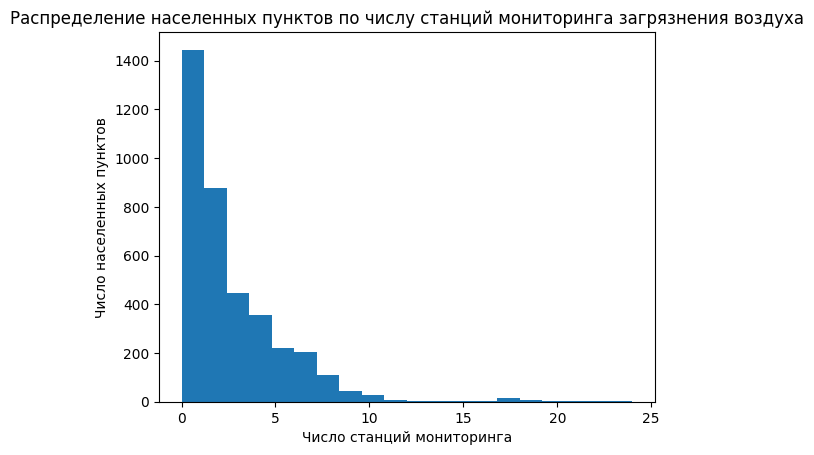

In [192]:
plt.hist(stantions, bins=20)
plt.title('Распределение населенных пунктов по числу станций мониторинга загрязнения воздуха')
plt.xlabel('Число станций мониторинга')
plt.ylabel('Число населенных пунктов')
plt.show()

Далее проведем анализ общего уровня загрязнения атмосферы как категориального признака.

In [193]:
stantions = stantions.astype('object')
stantions

0       6
1       4
2       1
3       1
4       2
       ..
3784    1
3785    1
3786    1
3787    2
3788    5
Name: stantions_count, Length: 3789, dtype: object

Оценим описательные статистики признака:

In [194]:
stantions.describe()

count     3789
unique      25
top          1
freq      1438
Name: stantions_count, dtype: int64

Изучим уникальные значения признака:

In [195]:
stantions.unique()

array([6, 4, 1, 2, 3, 5, 9, 8, 17, 0, 13, 10, 7, 18, 16, 12, 19, 14, 20,
       11, 15, 21, 24, 23, 22], dtype=object)

Проведем неграфический структурный анализ:

In [196]:
stantions.value_counts()

stantions_count
1     1438
2      879
3      447
4      355
5      222
6      141
8      110
7       64
9       46
10      29
17      14
0        7
11       6
20       5
19       5
16       5
18       4
12       3
14       2
15       2
13       1
21       1
24       1
23       1
22       1
Name: count, dtype: int64

**Выводы по разделу с анализом числа станций мониторинга загрязнения атмосферы в населенных пунктах:**
1.   Имеется 25 уникальных значения признака *stantions_count*: значения от 0 до 24.
2.   Наиболее часто встречаемое число станций мониторинга в населенном пункте — 1. Оно встречается 1438 раз.
3.   Усредненный уровень числа станций мониторинга — 2.85, медианное число — 2. Разница между средним значением и медианой равна 0.85. Это отличие не является значительным.
4.  *   число станций мониторинга 10% н.п. не превышает 1;
    *   число станций мониторинга 25% н.п. не превышает 1;
    *   число станций мониторинга 50% н.п. не превышает 2;
    *   число станций мониторинга 75% н.п. не превышает 4;
    *   число станций мониторинга 90% н.п. не превышает 6.
5.   Гистограмма наглядно демонстрирует четкую зависимость: чем больше число станций мониторинга, тем меньше населенных пунктов в датасете с таким числом.

## 11. Неграфический и графический анализ номинальных признаков

### *11.1. economic_region*

In [197]:
economic_region = air_pollution_df_copy['economic_region']
economic_region

0       Западно-Сибирский
1       Западно-Сибирский
2       Западно-Сибирский
3         Дальневосточный
4         Дальневосточный
              ...        
3784      Дальневосточный
3785    Западно-Сибирский
3786          Центральный
3787          Центральный
3788          Центральный
Name: economic_region, Length: 3789, dtype: object

Оценим описательные статистики признака:

In [198]:
economic_region.describe()

count                   3789
unique                    12
top       Восточно-Сибирский
freq                     533
Name: economic_region, dtype: object

Изучим уникальные значения признака:

In [199]:
economic_region.unique()

array(['Западно-Сибирский', 'Дальневосточный', 'Северный', 'Поволжский',
       'Центрально-Черноземный', 'Центральный', 'Восточно-Сибирский',
       'Калининградский', 'Северо-Кавказский', 'Волго-Вятский',
       'Уральский', 'Северо-Западный'], dtype=object)

Проведем неграфический структурный анализ:

In [200]:
economic_region.value_counts()

economic_region
Восточно-Сибирский        533
Дальневосточный           446
Центральный               434
Поволжский                398
Уральский                 394
Северо-Кавказский         375
Северный                  353
Западно-Сибирский         333
Северо-Западный           231
Волго-Вятский             164
Центрально-Черноземный    112
Калининградский            16
Name: count, dtype: int64

Построим горизонтальную столбчатую диаграмму:

In [201]:
economic_region_counts = air_pollution_df_copy['economic_region'].value_counts().sort_values(ascending=True)

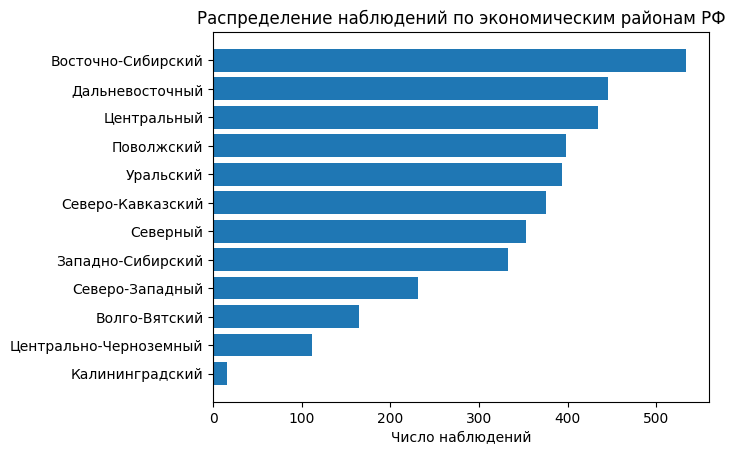

In [202]:
plt.barh(economic_region_counts.index, economic_region_counts.values)
plt.title('Распределение наблюдений по экономическим районам РФ')
plt.xlabel('Число наблюдений')
plt.show()

Выделим топ-5 экономических районов, по которым больше всего наблюдений в датасете:

In [203]:
economic_region_counts_top_5 = air_pollution_df_copy['economic_region'].value_counts()[:5]
economic_region_counts_top_5

economic_region
Восточно-Сибирский    533
Дальневосточный       446
Центральный           434
Поволжский            398
Уральский             394
Name: count, dtype: int64

Построим круговую диаграмму:

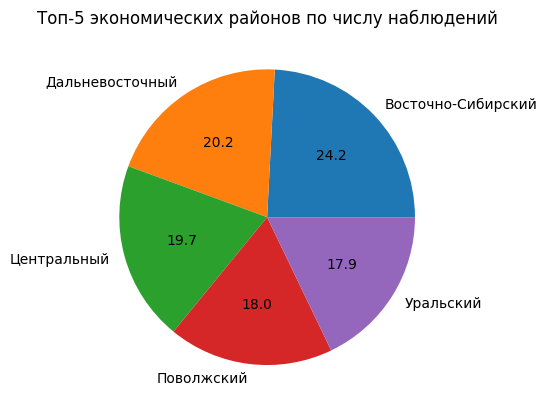

In [204]:
plt.pie(economic_region_counts_top_5.values, labels=economic_region_counts_top_5.index, autopct='%.1f')
plt.title('Топ-5 экономических районов по числу наблюдений')
plt.show()

**Выводы по разделу с анализом экономических районов:**
1.   Имеется 12 уникальных значений признака *economic_region*. То есть каждый экономический район РФ представлен в датасете.
2.   Наиболее часто встречаемый экономический район в датасете — Восточно-Сибирский. Он встречается 533 раза.
3.   Экономические районы встречаются в датасете разное число раз: от 16 для Калининградского района до 533 раз для Восточно-Сибирского.
4.   Число наблюдений по районам варьируется в этом диапазоне. Однозначную зависимость зафиксировать не удается, но можно предположить, что чем больше населенных пунктов относятся к экономическому району, тем большее число наблюдений будет об этом районе (Восточная Сибирь включает в себя несколько огромных регионов, а Калининградский район всего лишь относительно небольшую Калининградскую область).

### *11.2. region и city*

In [205]:
region = air_pollution_df_copy['region']
city = air_pollution_df_copy['city']

In [206]:
region

0                        Алтайский край
1                        Алтайский край
2                        Алтайский край
3                      Амурская область
4                      Амурская область
                     ...               
3784         Чукотский автономный округ
3785    Ямало-Ненецкий автономный округ
3786                Ярославская область
3787                Ярославская область
3788                Ярославская область
Name: region, Length: 3789, dtype: object

In [207]:
city

0                    БАРНАУЛ
1                      БИЙСК
2                    ЗАРИНСК
3               БЛАГОВЕЩЕНСК
4                        ЗЕЯ
                ...         
3784                   ПЕВЕК
3785                САЛЕХАРД
3786    ПЕРЕСЛАВЛЬ-ЗАЛЕССКИЙ
3787                 РЫБИНСК
3788               ЯРОСЛАВЛЬ
Name: city, Length: 3789, dtype: object

Оценим описательные статистики признаков:

In [208]:
air_pollution_df_copy[['region', 'city']].describe()

region          city
count                3789          3789
unique                 77           278
top     Иркутская область  БЛАГОВЕЩЕНСК
freq                  246            32

Изучим уникальные значения признаков:

In [209]:
region.unique()

array(['Алтайский край', 'Амурская область', 'Архангельская область',
       'Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область',
       'Вологодская область', 'Воронежская область',
       'Еврейская автономная область', 'Забайкальский край',
       'Ивановская область', 'Иркутская область',
       'Калининградская область', 'Калужская область', 'Камчатский край',
       'Карачаево-Черкесская Республика', 'Кемеровская область',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Москва', 'Московская область', 'Мурманская область',
       'Нижегородская область', 'Новгородская область',
       'Новосибирская область', 'Омская область', 'Оренбургская область',
       'Орловская область', 'Пензенская область', 'Пермский край',
       'Приморский кр

In [210]:
city.unique()

array(['БАРНАУЛ', 'БИЙСК', 'ЗАРИНСК', 'БЛАГОВЕЩЕНСК', 'ЗЕЯ', 'ТЫНДА',
       'АРХАНГЕЛЬСК', 'КОРЯЖМА', 'НОВОДВИНСК', 'СЕВЕРОДВИНСК',
       'АКСАРАЙСКИЙ', 'АСТРАХАНЬ', 'БАЙБЕК', 'БУЗАН', 'ДОСАНГ',
       'КОМСОМОЛЬСКИЙ', 'НАРИМАНОВ', 'СЕИТОВКА', 'БЕЛГОРОД', 'ГУБКИН',
       'СТАРЫЙ ОСКОЛ', 'БРЯНСК', 'ВЛАДИМИР', 'ВОЛГОГРАД', 'ВОЛЖСКИЙ',
       'ВОЛОГДА', 'ЧЕРЕПОВЕЦ', 'ВОРОНЕЖ', 'БИРОБИДЖАН',
       'ПЕТРОВСК-ЗАБАЙКАЛЬСКИЙ', 'ЧИТА', 'ИВАНОВО', 'ПЛЕС', 'ПРИВОЛЖСК',
       'АНГАРСК', 'БАЙКАЛЬСК', 'БИРЮСИНСК', 'БРАТСК', 'ЗИМА', 'ИРКУТСК',
       'КУЛТУК', 'ЛИСТВЯНКА', 'МЕГЕТ', 'САЯНСК', 'СВИРСК', 'СЛЮДЯНКА',
       'ТУЛУН', 'УСОЛЬЕ-СИБИРСКОЕ', 'УСТЬ-ИЛИМСК', 'ЧЕРЕМХОВО', 'ШЕЛЕХОВ',
       'КАЛИНИНГРАД', 'КАЛУГА', 'ЕЛИЗОВО', 'ПЕТРОПАВЛОВСК-КАМЧАТСКИЙ',
       'ЧЕРКЕССК', 'КЕМЕРОВО', 'НОВОКУЗНЕЦК', 'ПРОКОПЬЕВСК', 'КИРОВ',
       'КИРОВО-ЧЕПЕЦК', 'ВОЛГОРЕЧЕНСК', 'КОСТРОМА', 'БЕЛОРЕЧЕНСК',
       'КРАСНОДАР', 'НОВОРОССИЙСК', 'СОЧИ', 'АЧИНСК', 'КАНСК',
       'КРАСНОЯРСК', 'ЛЕСОСИБИРСК', 'МИНУСИ

Проведем неграфический структурный анализ:

In [211]:
region.value_counts()

region
Иркутская область             246
Московская область            147
Мурманская область            145
Самарская область             139
Ростовская область            139
                             ... 
Курганская область             16
Рязанская область              16
Санкт-Петербург                16
Чукотский автономный округ     14
Севастополь                     9
Name: count, Length: 77, dtype: int64

In [212]:
city.value_counts()

city
БЛАГОВЕЩЕНСК          32
БАРНАУЛ               16
НАБЕРЕЖНЫЕ ЧЕЛНЫ      16
НАДВОИЦЫ              16
ПЕТРОЗАВОДСК          16
                      ..
ПОС. БОЛЬШАЯ САКМА     1
П.Г.Т. ГОРНЫЙ          1
БАЛАХНА                1
МОХСОГОЛЛОХ            1
СЕНГИЛЕЙ               1
Name: count, Length: 278, dtype: int64

In [213]:
air_pollution_df_copy[['region', 'city']].value_counts()

region                    city            
Алтайский край            БАРНАУЛ             16
Республика Саха (Якутия)  НЕРЮНГРИ            16
Республика Бурятия        ГУСИНООЗЕРСК        16
                          СЕЛЕНГИНСК          16
                          УЛАН-УДЭ            16
                                              ..
Волгоградская область     СВЕТЛЫЙ ЯР           1
Ульяновская область       МУЛЛОВКА             1
Республика Саха (Якутия)  МОХСОГОЛЛОХ          1
Саратовская область       П.Г.Т. ГОРНЫЙ        1
                          ПОС. ОКТЯБРЬСКИЙ     1
Name: count, Length: 279, dtype: int64

**Выводы по разделу с анализом регионов и городов:**
1.   Имеется 77 уникальных значений признака *region* и 278 уникальных значений признака *city*. Это значит, что в датасете представлены не все регионы РФ, но подавляющее большинство.
2.   Наиболее часто встречаемый регион в датасете с большим отрывом — Иркутская область. Она встречается 246 раз.
3.   Регионы и города встречаются в датасете разное число раз. Регионы: от 9 для Севастополя и 14 для Чукотки до 246 раз для Иркутской области. Города: от 1 до 16 раз.
4.   Числа наблюдений по регионам и городам варьируются в этих диапазонах. Однозначную зависимость зафиксировать не удается, но можно предположить, что чем больше населенных пунктов относятся к региону, тем большее число наблюдений будет относиться к этому региону (Иркутская и Московская области включают в себя несколько больших н.п., а Севастополь и Санкт-Петербур, являясь городами федерального значения, считаются за регионы).

## 12. Анализ взаимосвязи между количественными признаками

### *12.1. population - solid_emissions - so2_emissions - no2_emissions - co_emissions*

In [214]:
columns = ['population', 'solid_emissions', 'so2_emissions', 'no2_emissions', 'co_emissions']

Выведем таблицу описательных статистик для всех количественных признаков:

In [215]:
air_pollution_df_copy[columns].describe()

population  solid_emissions  so2_emissions  no2_emissions  \
count  3.789000e+03      3520.000000    3509.000000    3540.000000   
mean   3.036173e+05         3.953554      14.550786       7.272724   
std    8.650360e+05         6.762255     124.142509      18.391001   
min    2.000000e+02         0.000000       0.000000       0.000000   
25%    4.220000e+04         0.340000       0.200000       0.957500   
50%    1.184000e+05         1.300000       0.900000       3.100000   
75%    3.190000e+05         4.000000       5.600000       8.300000   
max    1.267810e+07        70.700000    1950.500000     728.900000   

       co_emissions  
count   3541.000000  
mean      24.440721  
std       61.292389  
min        0.000000  
25%        1.600000  
50%        6.300000  
75%       21.800000  
max     1125.700000

Построим диаграммы рассеяния, используя функции PairGrid():

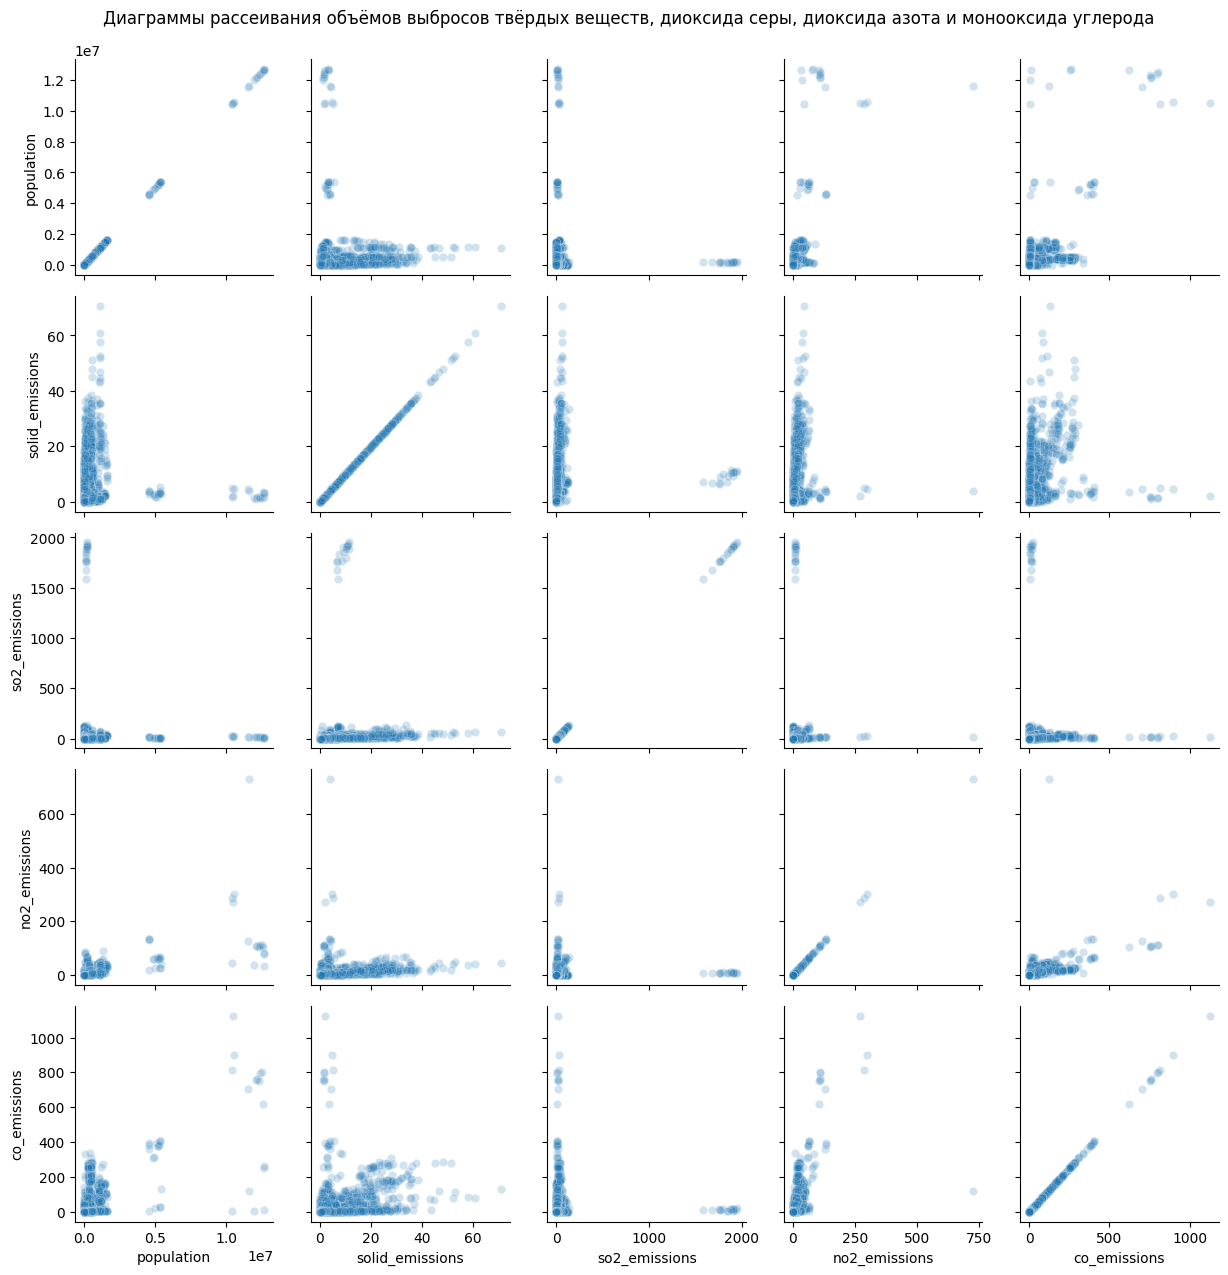

In [216]:
g = sns.PairGrid(air_pollution_df_copy[columns])
g.fig.suptitle('Диаграммы рассеивания объёмов выбросов твёрдых веществ, диоксида серы, диоксида азота и монооксида углерода', y=1.02)
g.map(sns.scatterplot, alpha=0.2)

Исключим выбросы, отфильтровав датасет по 99% процентилю:

In [217]:
quantitative_df_columns = air_pollution_df_copy[columns]
for col in columns:
  limiter = quantitative_df_columns[col].quantile(0.99)
  quantitative_df_columns =quantitative_df_columns[quantitative_df_columns[col]<=limiter]

Построим диаграммы рассеяния по данным датасета pollutants_emissions_volumes:

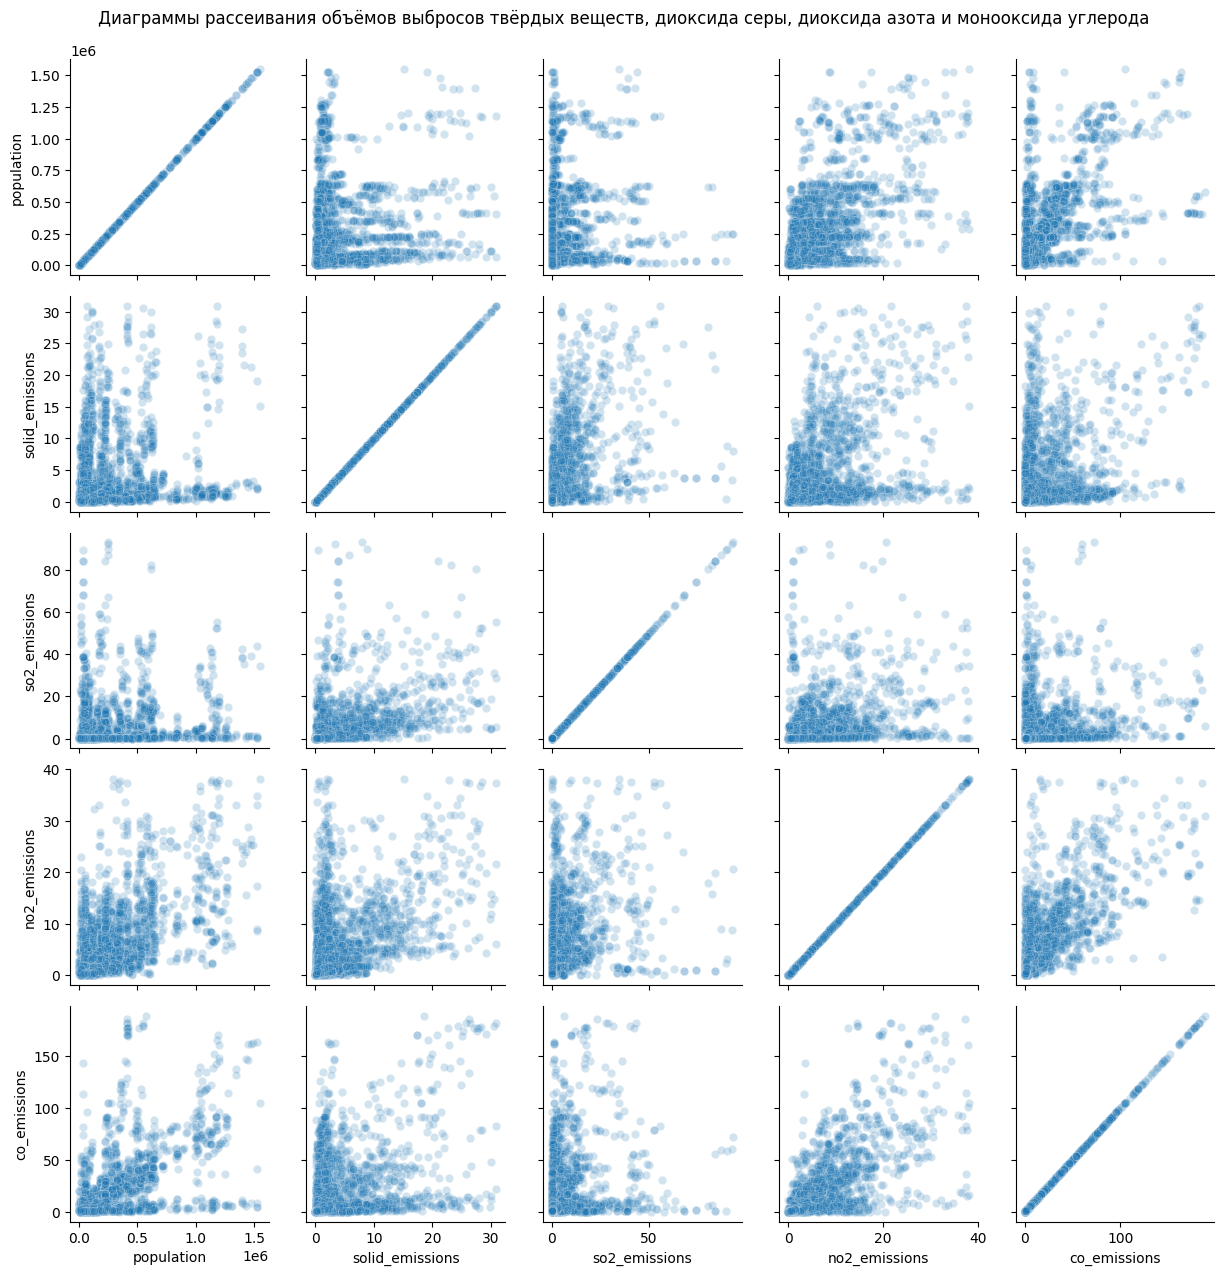

In [218]:
g = sns.PairGrid(quantitative_df_columns[columns])
g.fig.suptitle('Диаграммы рассеивания объёмов выбросов твёрдых веществ, диоксида серы, диоксида азота и монооксида углерода', y=1.02)
g.map(sns.scatterplot, alpha=0.2)

Посчитаем коэффициент корреляции Пирсона для каждой пары данных признаков:

In [219]:
air_pollution_df_copy[columns].corr(method='pearson')

population  solid_emissions  so2_emissions  no2_emissions  \
population         1.000000         0.072661       0.001164       0.658871   
solid_emissions    0.072661         1.000000       0.113580       0.252076   
so2_emissions      0.001164         0.113580       1.000000       0.034162   
no2_emissions      0.658871         0.252076       0.034162       1.000000   
co_emissions       0.694723         0.331136       0.008440       0.624713   

                 co_emissions  
population           0.694723  
solid_emissions      0.331136  
so2_emissions        0.008440  
no2_emissions        0.624713  
co_emissions         1.000000

Визуализируем данную корреляционную таблицу:

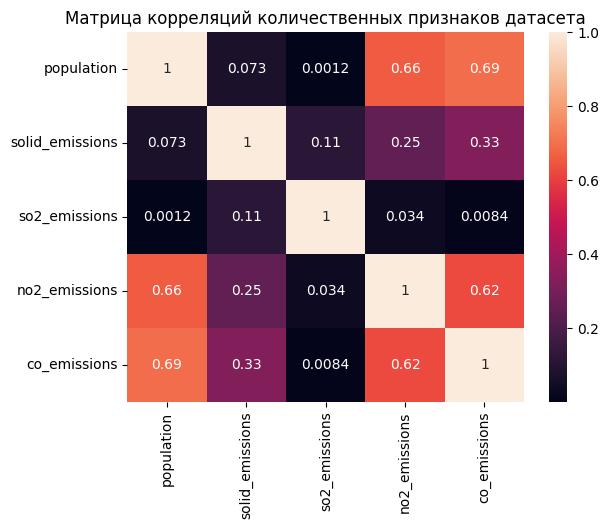

In [220]:
plt.title('Матрица корреляций количественных признаков датасета')
hm = sns.heatmap(air_pollution_df_copy[columns].corr(),annot=True)

Проверим, является ли корреляция между признаками статистически значимой для каждой пары, у которой коэффициент корреляции Пирсона больше 0.25 и выше:

In [221]:
quantitative_df_columns = air_pollution_df_copy[columns].dropna()
quantitative_df_columns.shape

(3485, 5)

In [222]:
scipy.stats.pearsonr(quantitative_df_columns['solid_emissions'], quantitative_df_columns['so2_emissions'])

PearsonRResult(statistic=0.11356832854721376, pvalue=1.771209498298587e-11)

1) *population* и *co_emissions*

In [223]:
scipy.stats.pearsonr(quantitative_df_columns['population'], quantitative_df_columns['co_emissions'])

PearsonRResult(statistic=0.7000126755557041, pvalue=0.0)

2) *population* и *no2_emissions*

In [224]:
scipy.stats.pearsonr(quantitative_df_columns['population'], quantitative_df_columns['no2_emissions'])

PearsonRResult(statistic=0.6656954354294676, pvalue=0.0)

3) *solid_emissions* и *no2_emissions*

In [225]:
scipy.stats.pearsonr(quantitative_df_columns['solid_emissions'], quantitative_df_columns['no2_emissions'])

PearsonRResult(statistic=0.2514923212269951, pvalue=2.053805783262978e-51)

4) *solid_emissions* и *co_emissions*

In [226]:
scipy.stats.pearsonr(quantitative_df_columns['solid_emissions'], quantitative_df_columns['no2_emissions'])

PearsonRResult(statistic=0.2514923212269951, pvalue=2.053805783262978e-51)

5) *no2_emissions* и *co_emissions*

In [227]:
scipy.stats.pearsonr(quantitative_df_columns['co_emissions'], quantitative_df_columns['no2_emissions'])

PearsonRResult(statistic=0.6193055107559942, pvalue=0.0)

**Выводы по разделу о взаимосвязи между численностью населения, объемом выбросов тяжелых веществ, диоксида серы, диоксида азота и монооксида углерода промышленными предприятиями:**
1. По графикам и, в первую очередь, в результате корреляционного анализа, обнаружена сильная прямая зависимость между: численностью населения, объемом выбросов диоксида азота и объемом выбросов монооксида углерода. Коэффициент корреляции Пирсона у всех пар, составленных из этих признаков, высок.
2. Имеется статистически значимая прямая зависимость между объемом выбросов тяжелых веществ и объемом выбросов, а также между объемом выбросов тяжелых веществ и объемом выбросов монооксида углерода. Коэффицент корреляции у этих пар умеренный.
3. У остальных пар признаков либо коэффициент корреляции низок, либо совсем близок к нулю.

## 13. Анализ взаимосвязи двух порядковых признаков

### *13.1. year - pollution_level*

Вспомним структурный анализ признака *year*:

In [228]:
air_pollution_df_copy['year'].value_counts()

year
2021    244
2009    243
2022    243
2007    242
2008    242
2020    241
2019    240
2014    238
2012    235
2015    235
2018    235
2017    232
2013    231
2010    230
2011    229
2016    229
Name: count, dtype: int64

Для корректного визуального представления распределения признака 'pollution_level' создадим словарь, в котором каждому уровню загрязнения будет присвоен соответствующий цвет:

In [229]:
# Определяем цвета для каждого уровня загрязнения
colors = {1: "#2ca02c",  # зеленый - низкий уровень
          2: "#ffcc00",  # желтый - повышенный
          3: "#ff6600",  # оранжевый - высокий
          4: "#cc0000"}  # красный - очень высокий

Для каждого года построим круговую диаграмму:

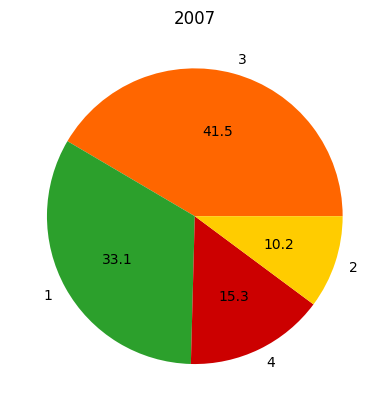

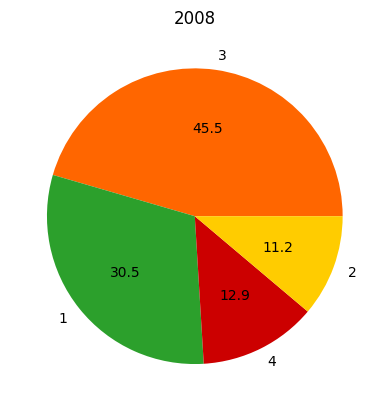

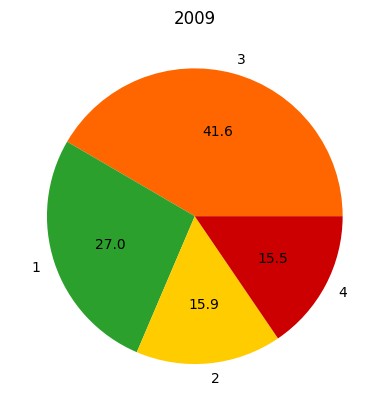

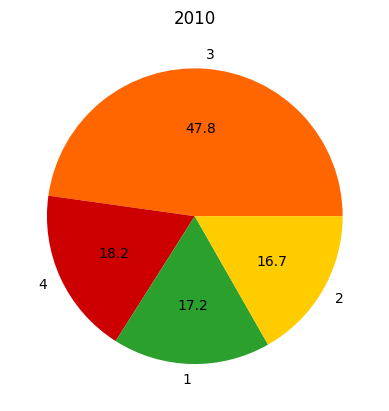

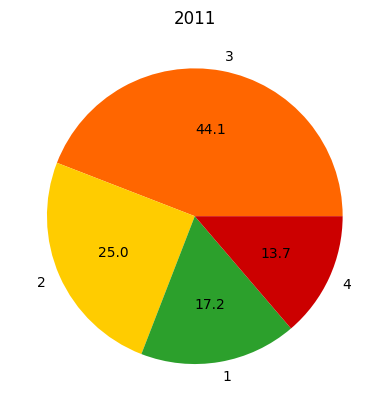

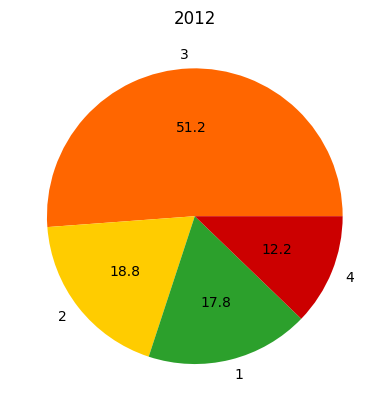

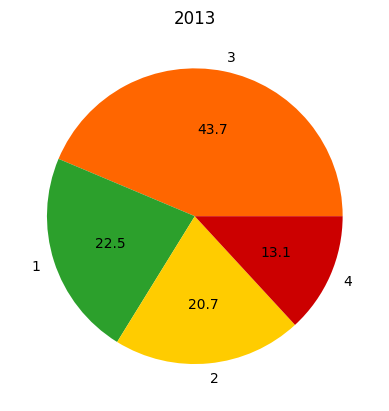

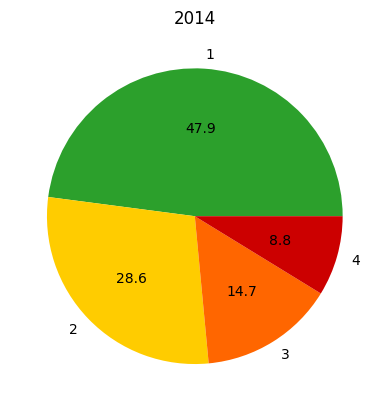

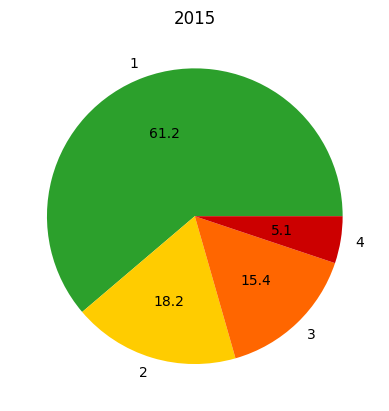

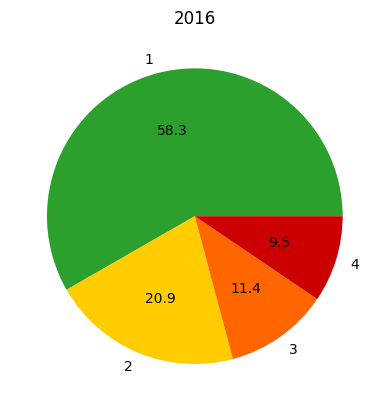

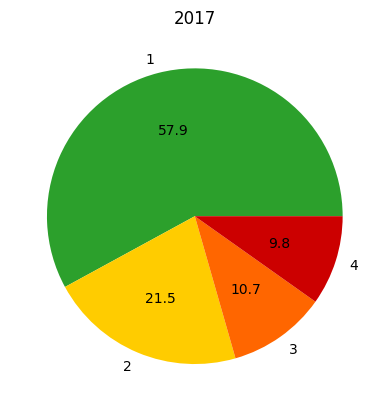

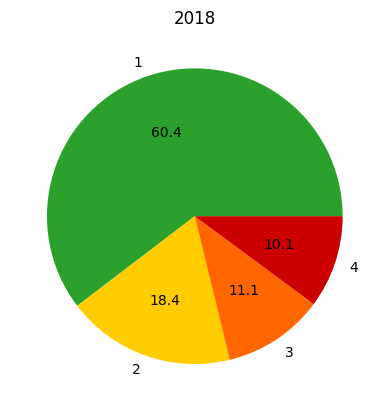

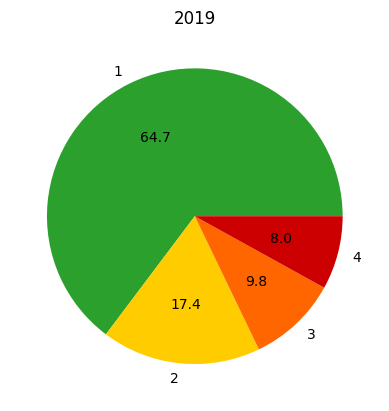

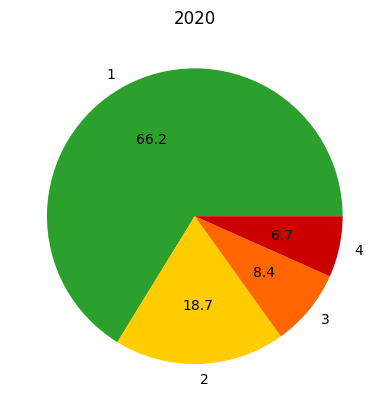

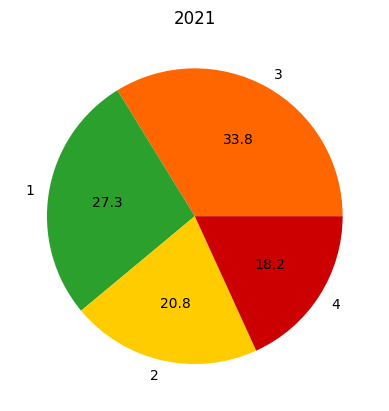

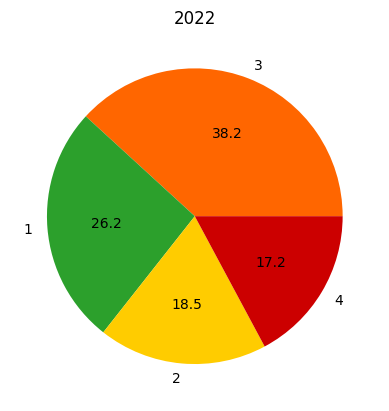

In [230]:
for year in air_pollution_df_copy['year'].unique():
  filtered_df = air_pollution_df_copy[air_pollution_df_copy['year']==year].copy()

  pollution_level_counts = filtered_df['pollution_level'].value_counts()
  labels = pollution_level_counts.index

  plt.title(year)
  plt.pie(pollution_level_counts, labels=labels, colors=[colors[key] for key in labels], autopct='%.1f')
  plt.show()

Посчитаем коэффициент корреляции Спирмена для этих двух признаков:

In [231]:
air_pollution_df_copy[['year', 'pollution_level']].corr(method='spearman')

year  pollution_level
year             1.00000         -0.18861
pollution_level -0.18861          1.00000

Коэффицент корреляции отрицательный и низкий. Проверим статистическую значимость корреляции:

In [232]:
year_and_pollution = air_pollution_df_copy[['year', 'pollution_level']].dropna()

In [233]:
scipy.stats.spearmanr(year_and_pollution.year, year_and_pollution.pollution_level)

SignificanceResult(statistic=-0.18861039566486076, pvalue=1.6849140908876573e-29)

Но такой расчет некорректен из-за аномально хорошей ситуации в 2014-2020. Посчитаем коэффициент корреляции без этих лет:

In [234]:
air_pollution_df_copy[(air_pollution_df_copy['year']<2014) | (air_pollution_df_copy['year']>2020)][['year', 'pollution_level']].corr(method='spearman')

year  pollution_level
year             1.000000         0.009312
pollution_level  0.009312         1.000000

**Выводы по разделу c анализом взаимосвязи года и уровня загрязнения атмосферы:**
1.   Парный коэффициент корреляции Спирмена отрицальный (что могло бы свидетельствовать о положительной динамике уровня загрязнения атмосферы по годам). Абсолютное значение коэффициента низкое. Однако при проверке корреляции на стат. значимость p-value оказался очень низким и подтвердил статистическую значимость. Несмотря на это, мы не можем зафиксировать прямой зависимости года и уровня загрязнения воздуха, так как распределение нас. пунктов по уровню загрязнения с 2007 года по 2013 год показывало приблизительно одну картину, в 2014 году резко изменились в лучшую сторону, а в 2021 также резко изменились, уже в худшую. Коэффициент корреляции, расчитанный без годов с аномальными показателями, почти нулевой.
2.   Подробное описание динамики распределения нас. пунктов по уровню загрязнения с 2007 года по 2022 год:
*   С 2007 по 2009 год: 40-45% н.п. с высоким уровнем загрязнения, около 30% н.п. с низким уровнем загрязнения, около 15% н.п. с очень высоким загрязнением и 10-15% н.п. с повышенным.
*   С 2010 по 2013 год состояние загрязнения атмосферы ухудшилось: доля н.п. с высоким уровнением загрязнения увеличилась до половины от всех н.п. (45-50%), доля н.п. с низким уровнем загрязнения уменьшилась в 1.5-2 раза до 17-22%, за счёт этого резко увеличилась доля н.п. с повышенным загрязнением (в 2-2.5 раза) до 17-25%, став на второе место. Доля н.п. с очень высоким загрязнением не сильно поменялась по сравнению с 2007-2009 годами (около 15%), лишь в 2010 году доля н.п. с очень высоким уровнем загрязнения воздуха увеличилась аж до 18.2%, выйдя ненадолго на 2-е место.
*   В 2014 году показатели аномально резко улучшились. Почти половину (47.9%) стали занимать н.п. с низким уровнем загрязнения, чуть больше четверти (28.6%) с повышенным, 14.7% н.п. — с высоким и всего лишь 8.8% н.п. — с очень высоким.
*   С 2015 по 2020 год показатели стали ещё лучше на порядок: более 60% н.п. с низким уровнем загрязнения, около 20% н.п. с повышенным уровнем загрязнения, около 10% н.п. с высоким загрязнением и 5-10% н.п. с очень высоким уровнем загрязнения.
*   В 2021 ситуация аномально резко ухудшилась и вернулась примерно на уровень до аномального улучшения в 2014. С 2021 по 2022 год: 33-38% н.п. с высоким уровнем загрязнения, 26-27% н.п. с низким уровнем загрязнения, около 18-20% н.п. с повышенным загрязнением и 17-18% н.п. с очень высоким. То есть примерно в более половины населенных пунктах России (50-55%) уровень загрязнения воздуха высокий и очень высокий.
3.   Причина таких аномально хороших показателей за период с 2014 по 2020 годы найдены в интернете.  
Нормативы СанПиН предельно допустимых концентраций для отдельных веществ существенно менялись в 2014 (снижение нормативов для формальдегида и фенола) и 2021 (возвращение нормативов) годах.  
В 2014 году были повышены величины ПДК формальдегида более чем в три раза по сравнению с прежним нормативом (без установления среднегодовой ПДК). Это приводит к занижению оценки уровня загрязнения атмосферного воздуха формальдегидом и показателя качества воздуха — комплексного индекса загрязнения атмосферы (ИЗА). Если учитывать прежние ПДК, то количество городов, где средние концентрации какой-либо примеси превышают 1 ПДК, в 2014 году составило бы 199 вместо 174.  
Оценка уровня загрязнения атмосферного воздуха за 2021 год выполнена с использованием нормативов в соответствии с СанПиН 1.2.3685-21. За счет установления более низких значений ПДК по сравнению с ранее используемыми, произошло изменение оценки уровней загрязнения атмосферного воздуха в городах.


### *13.2. year - stantions_count*

Для каждого года построим круговую диаграмму:

In [235]:
year_and_stantions = air_pollution_df_copy[['year', 'stantions_count']].copy()

year_and_stantions.loc[year_and_stantions['stantions_count']>=5, 'stantions_count'] = 100
year_and_stantions['stantions_count'] = year_and_stantions['stantions_count'].astype('str')
year_and_stantions['stantions_count'] = year_and_stantions['stantions_count'].replace('100', '5 или более')

year_and_stantions['stantions_count']

0       5 или более
1                 4
2                 1
3                 1
4                 2
           ...     
3784              1
3785              1
3786              1
3787              2
3788    5 или более
Name: stantions_count, Length: 3789, dtype: object

In [236]:
labels = year_and_stantions['stantions_count'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'5 или более': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '4': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 '1': (1.0, 0.4980392156862745, 0.054901960784313725),
 '2': (1.0, 0.7333333333333333, 0.47058823529411764),
 '3': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 '0': (0.596078431372549, 0.8745098039215686, 0.5411764705882353)}

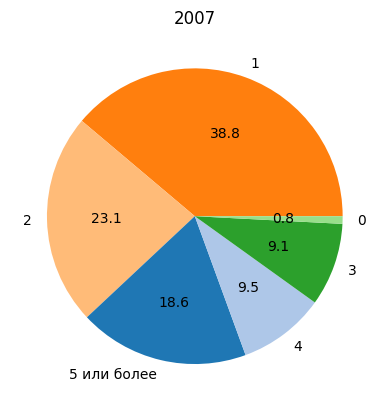

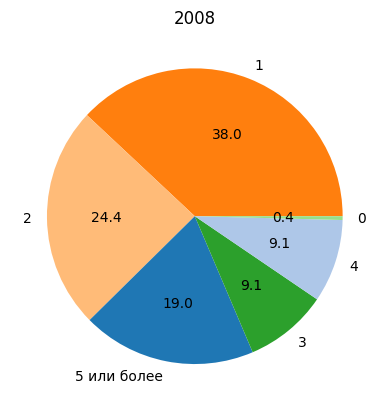

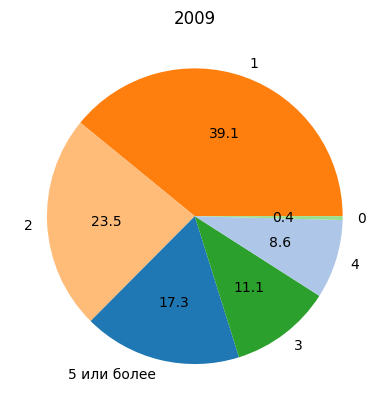

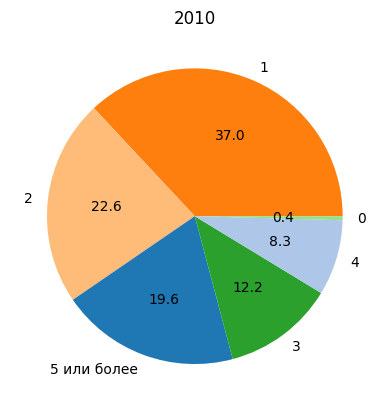

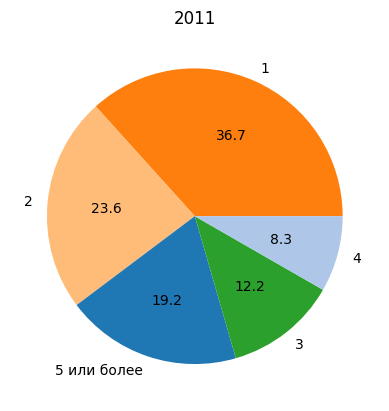

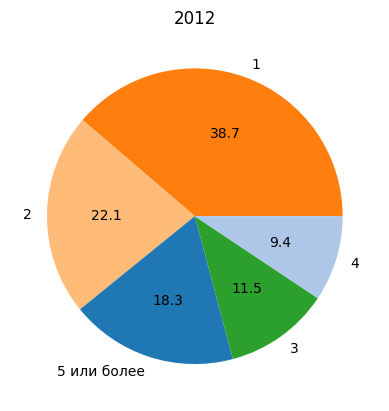

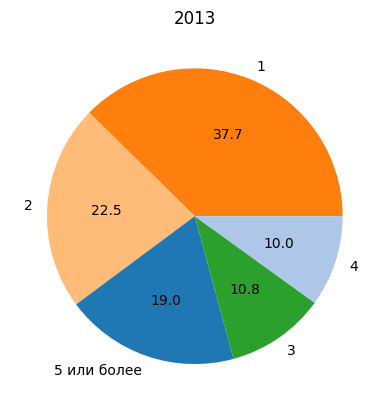

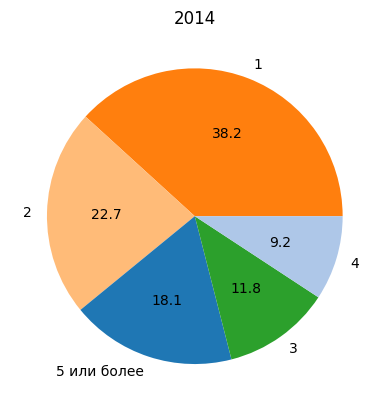

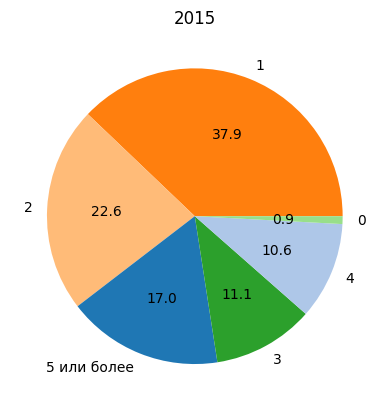

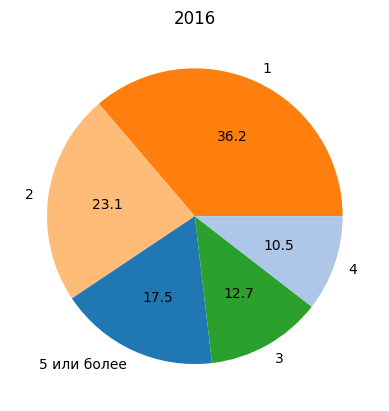

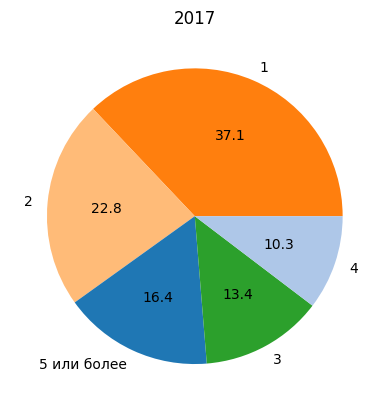

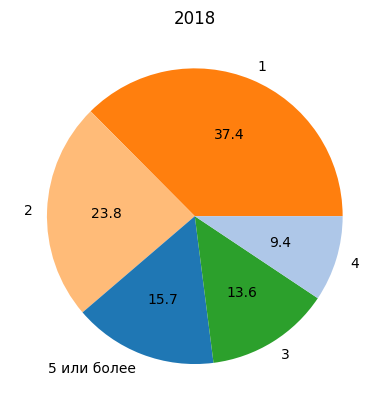

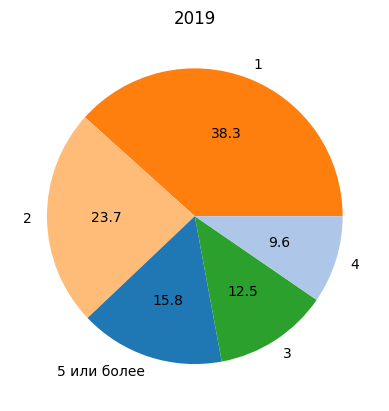

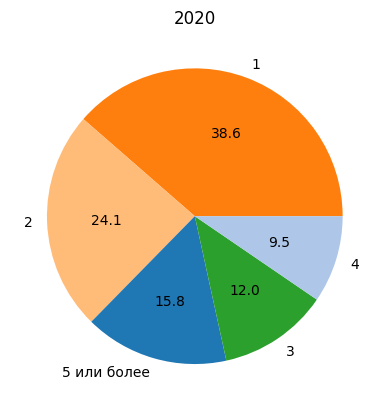

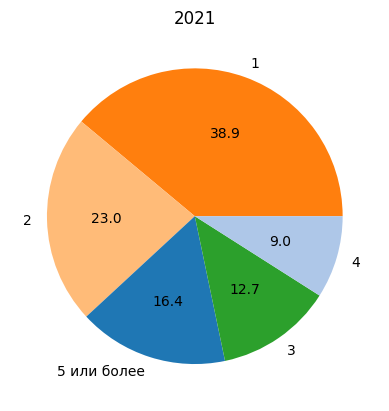

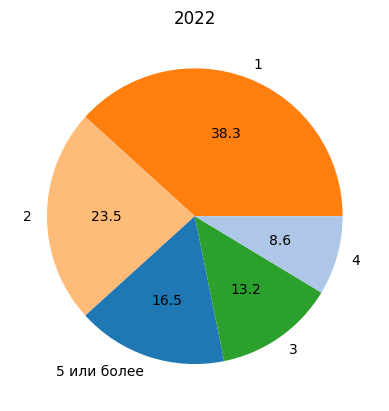

In [237]:
for year in year_and_stantions['year'].unique():
  filtered_df = year_and_stantions[year_and_stantions['year']==year].copy()

  stantions_count_counts = filtered_df['stantions_count'].value_counts()
  labels = stantions_count_counts.index

  plt.title(year)
  plt.pie(stantions_count_counts, labels=labels, colors=[colors[key] for key in labels], autopct='%.1f')
  plt.show()

**Выводы по разделу c анализом взаимосвязи года и количества станций мониторинга:**
1.   Круговые диаграммы распределения количеств станций мониторинга по годам наглядно демонстрируют, что количество станций с 2007 по 2022 год практически не поменялось. Это говорит о том, что либо за представленные 15 лет новых станций мониторинга установлено не было, либо были лишь заменены вышедшие из строя станции.
2.   Распределение населенных пунктов по количеству станций мониторинга: 38% — н.п. с одной станцией мониторинга, 23% — н.п. с двумя станциями, 10-13% с тремя станциями, 9-10% — с четырьмя станциями и 16-18% — с пятью или более станциями.   
Получается, что приблизительно 60% населенных пунктов имеют всего лишь 1-2 станции мониторинга, и этот показатель с течением времени абсолютно никак не улучшается.

### *13.3. stantions_count - pollution_level*

Вспомним структурный анализ признака *stantions_count*:

In [238]:
air_pollution_df_copy['stantions_count'].value_counts()

stantions_count
1     1438
2      879
3      447
4      355
5      222
6      141
8      110
7       64
9       46
10      29
17      14
0        7
11       6
20       5
19       5
16       5
18       4
12       3
14       2
15       2
13       1
21       1
24       1
23       1
22       1
Name: count, dtype: int64

Так как для населенных пунктов с большим количеством станций наблюдений совсем мало, проведем визуальный анализ только для числа станций не больше 10.

Для корректного визуального представления распределения признака 'pollution_level' создадим словарь, в котором каждому уровню загрязнения будет присвоен соответствующий цвет:

In [239]:
# Определяем цвета для каждого уровня загрязнения
colors = {1: "#2ca02c",  # зеленый - низкий уровень
          2: "#ffcc00",  # желтый - повышенный
          3: "#ff6600",  # оранжевый - высокий
          4: "#cc0000"}  # красный - очень высокий

Для каждого числа станций в н.п. не более 10 построим круговую диаграмму:

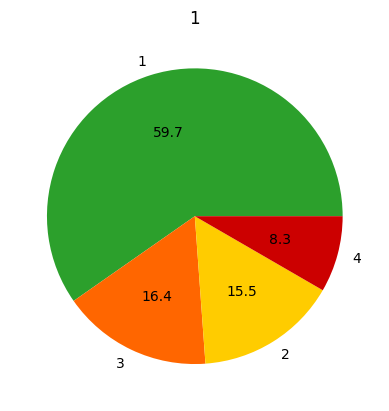

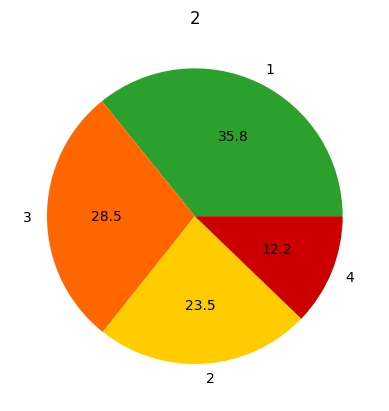

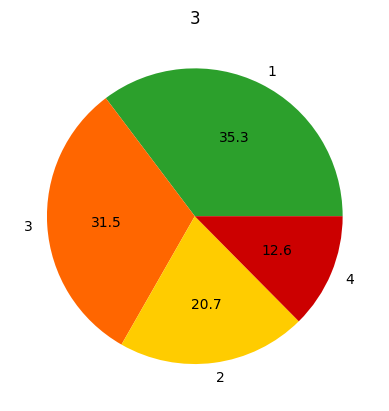

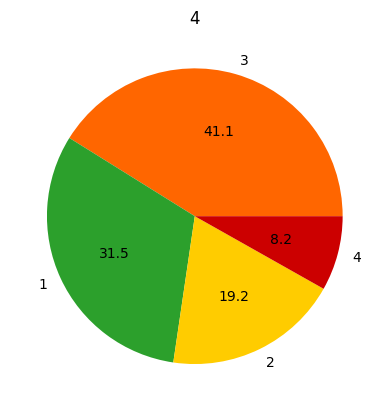

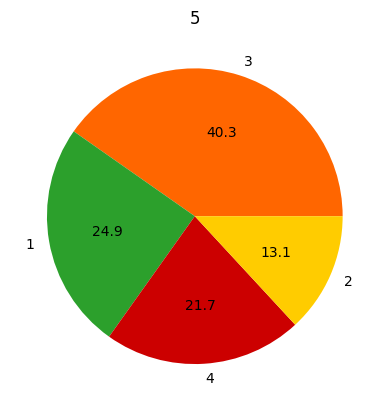

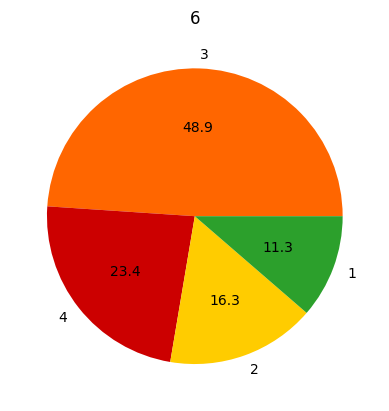

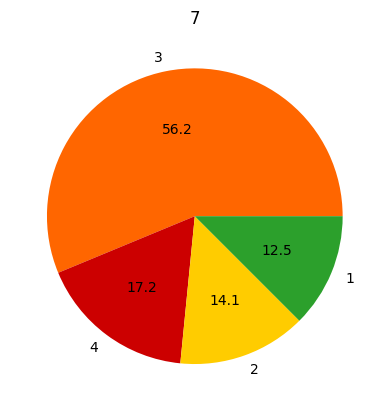

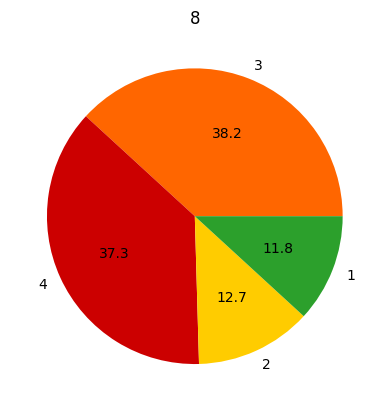

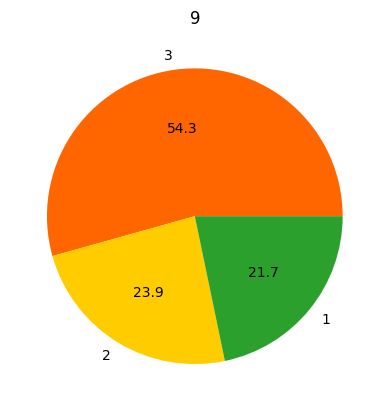

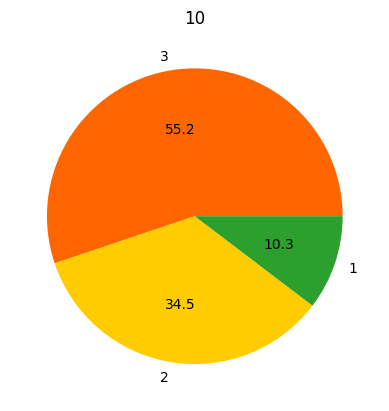

In [240]:
for i in range(1, 11):
  filtered_df = air_pollution_df_copy[air_pollution_df_copy['stantions_count']==i]

  pollution_level_counts = filtered_df['pollution_level'].value_counts()
  labels = pollution_level_counts.index

  plt.title(i)
  plt.pie(pollution_level_counts, labels=labels, colors=[colors[key] for key in labels], autopct='%.1f')
  plt.show()

Посчитаем коэффициент корреляции Спирмена для этих двух признаков:

In [241]:
air_pollution_df_copy[['stantions_count', 'pollution_level']].corr(method='spearman')

stantions_count  pollution_level
stantions_count         1.000000         0.314364
pollution_level         0.314364         1.000000

Коэффицент корреляции положительный, корреляция умеренная. Проверим статистическую значимость корреляции:

In [242]:
stantions_and_pollution = air_pollution_df_copy[['stantions_count', 'pollution_level']].dropna()

In [243]:
scipy.stats.spearmanr(stantions_and_pollution.stantions_count, stantions_and_pollution.pollution_level)

SignificanceResult(statistic=0.314364174975901, pvalue=1.8860818518935403e-81)

**Выводы по разделу c анализом взаимосвязи количества станций мониторинга в населенном пункте и уровня загрязненности атмосферы:**
1.   Имеется статистически значимая прямая зависимость между количеством станций и уровнем загрязения воздуха. Парный коэффициент корреляции умеренный (0.31).
2.   Вероятно, это связано с тем, что чем хуже в населенном пункте обстановка с загрязнением воздуха, тем больше станций мониторинга в нем устанавливается. Но можно и предположить, что малое число станций мониторинга в населенном пункте просто не дает возможности в полной мере оценить уровень загрязнения воздуха и показывают показатели лучше, чем они есть в реальности.

### *13.4. exceeded_mpc_pollutants_count - pollutions_level, huge_standard_index_pollutants_count - pollutions_level*

### *13.5. exceeded_mpc_pollutants_count - year, huge_standard_index_pollutants_count - year*

## 14. Анализ взаимосвязи количественного и порядкового/категориального признаков

### *14.1. population - year*

Оценим медианные значения численностей населения городов в разрезе лет:

In [244]:
air_pollution_df_copy.groupby('year')['population'].median()

year
2007    107800.0
2008    109350.0
2009    109800.0
2010    119050.0
2011    118900.0
2012    112000.0
2013    118900.0
2014    119650.0
2015    124900.0
2016    126500.0
2017    125850.0
2018    124700.0
2019    119350.0
2020    119400.0
2021    115350.0
2022    117600.0
Name: population, dtype: float64

Оценим описательные статистики численностей населения городов в разрезе лет:

In [245]:
air_pollution_df_copy.groupby('year')['population'].describe()

count           mean            std    min      25%       50%       75%  \
year                                                                            
2007  242.0  280751.644628  763633.223042  400.0  39725.0  107800.0  306950.0   
2008  242.0  280898.752066  763642.290543  400.0  39550.0  109350.0  306950.0   
2009  243.0  281000.814815  767798.062604  350.0  39350.0  109800.0  307550.0   
2010  230.0  296771.508696  789705.729359  290.0  45247.5  119050.0  314375.0   
2011  229.0  305217.633188  855340.750451  290.0  46200.0  118900.0  317000.0   
2012  235.0  300097.400000  851981.214268  290.0  43350.0  112000.0  317300.0   
2013  231.0  307801.679654  882437.855638  260.0  44750.0  118900.0  320700.0   
2014  238.0  305659.991597  880682.726852  200.0  43050.0  119650.0  323525.0   
2015  235.0  311549.357447  892444.627852  300.0  43550.0  124900.0  328100.0   
2016  229.0  320079.467249  912306.679280  300.0  44200.0  126500.0  336500.0   
2017  232.0  318115.512931  912055.407815  300.0  43125.0  125850.0  331550.0   
2018  235.0  316358.297872  915655.120411  300.0  43350.0  124700.0  327600.0   
2019  240.0  311349.991667  914307.426880  300.0  41450.0  119350.0  318675.0   
2020  241.0  310788.788382  916561.873167  300.0  39700.0  119400.0  325200.0   
2021  244.0  305965.561475  909891.509639  300.0  37750.0  115350.0  321150.0   
2022  243.0  307572.139918  910714.062084  300.0  37300.0  117600.0  322000.0   

             max  
year              
2007  10422700.0  
2008  10422700.0  
2009  10510000.0  
2010  10563000.0  
2011  11551900.0  
2012  11612900.0  
2013  11979500.0  
2014  12108300.0  
2015  12197600.0  
2016  12330100.0  
2017  12380700.0  
2018  12506500.0  
2019  12615300.0  
2020  12678100.0  
2021  12655100.0  
2022  12635500.0

Построим диаграммы "ящик с усами":



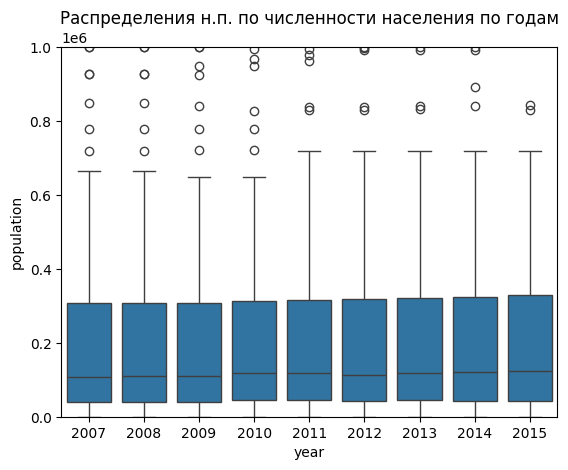

In [246]:
df_years_before_2015 = air_pollution_df_copy[air_pollution_df_copy['year']<=2015]

sns.boxplot(x='year', y='population', data=df_years_before_2015)
plt.axis(ymin=0, ymax=1000000)
plt.title('Распределения н.п. по численности населения по годам')
plt.show()

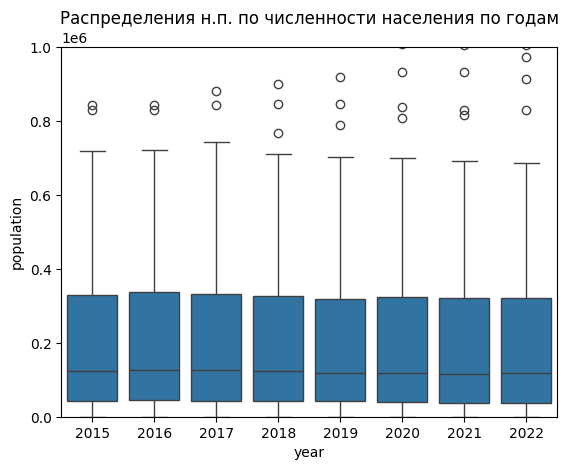

In [247]:
df_years_after_2015 = air_pollution_df_copy[air_pollution_df_copy['year']>=2015]

sns.boxplot(x='year', y='population', data=df_years_after_2015)
plt.axis(ymin=0, ymax=1000000)
plt.title('Распределения н.п. по численности населения по годам')
plt.show()

Посчитаем коэффициент корреляции Спирмена:

In [248]:
air_pollution_df_copy[['population','year']].corr(method='spearman')

population      year
population    1.000000  0.012327
year          0.012327  1.000000

**Выводы по разделу с анализом взаимодействия года и численности населения:**
1.   Прямой или обратной зависимости между признаками нет. Коэффициент корреляции близок к нулю.
2.   Распределение медианного значения численности населения в разрезе лет похоже на нормальное. В среднем численность росла с 2007 (медианное значение — 107800 чел.) по 2016 год (медианное значение — 126500 чел.), после этого начала падать (в 2021 — 115350 чел.).


### *14.2. population - pollution_level*

Оценим медианные значения численностей населения в разрезе уровней загрязнения атмосферы:

In [249]:
air_pollution_df_copy.groupby('pollution_level')['population'].median().sort_values(ascending=False)

pollution_level
3    235800.0
4    181200.0
2    162700.0
1     79700.0
Name: population, dtype: float64

Оценим описательные статистики численности населения  в разрезе уровней загрязнения атмосферы:

In [250]:
air_pollution_df_copy.groupby('pollution_level')['population'].describe()

count           mean           std    min      25%  \
pollution_level                                                        
1                1397.0  189747.595562  5.692988e+05  200.0  33000.0   
2                 658.0  391842.898176  1.162213e+06  290.0  56200.0   
3                1031.0  427999.049467  8.813740e+05  700.0  79900.0   
4                 428.0  402540.320093  1.217508e+06  800.0  66400.0   

                      50%       75%         max  
pollution_level                                  
1                 79700.0  209100.0  12678100.0  
2                162700.0  327500.0  12615300.0  
3                235800.0  519100.0  12655100.0  
4                181200.0  409000.0  11979500.0

Оценим суммарные численности населения в разрезе уровней загрязнения атмосферы:

In [251]:
pd.set_option('display.max_rows', None)  # Показывать все строки
air_pollution_df_copy.groupby(['year', 'pollution_level'])['population'].sum()

year  pollution_level
2007  1                   4621800
      2                   3526700
      3                  44994298
      4                  14352900
2008  1                   4108600
      2                   5599100
      3                  47591698
      4                  10273100
2009  1                   3664008
      2                   8184610
      3                  35497490
      4                  20212660
2010  1                   2700570
      2                   4743429
      3                  37057379
      4                  22452500
2011  1                   2217090
      2                   9616590
      3                  39156198
      4                  17620100
2012  1                   2275390
      2                   6214300
      3                  40667599
      4                  19931100
2013  1                   3732460
      2                   9501300
      3                  36645529
      4                  20175099
2014  1                  14956879
      2                  35844399
      3                  15037500
      4                   5462600
2015  1                  28262299
      2                  25590500
      3                  16679600
      4                   1573100
2016  1                  28799598
      2                  27196500
      3                  12317100
      4                   4102400
2017  1                  38383999
      2                  21025200
      3                   8453200
      4                   5093900
2018  1                  33021600
      2                  26877900
      3                   8461500
      4                   5138500
2019  1                  37674900
      2                  25691600
      3                   7395700
      4                   3320599
2020  1                  49671198
      2                  14856300
      3                   7903400
      4                   1777000
2021  1                   5591400
      2                  17858799
      3                  40364599
      4                  10404999
2022  1                   5395600
      2                  15505400
      3                  43044230
      4                  10396700
Name: population, dtype: int64

In [252]:
pd.reset_option('display.max_rows')  # Вернуть настройку по умолчанию

Для наглядности визуализируем распределение населения в разрезе уровней загрязнения атмосферы по годам:

In [253]:
# Определяем цвета для каждого уровня загрязнения
colors = {1: "#2ca02c",  # зеленый - низкий уровень
          2: "#ffcc00",  # желтый - повышенный
          3: "#ff6600",  # оранжевый - высокий
          4: "#cc0000"}  # красный - очень высокий

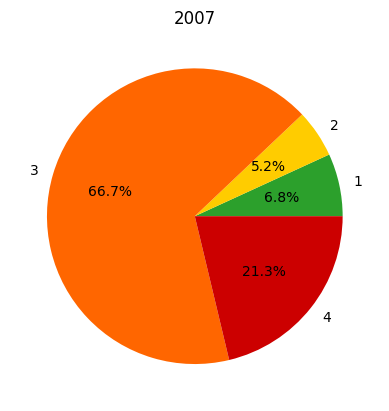

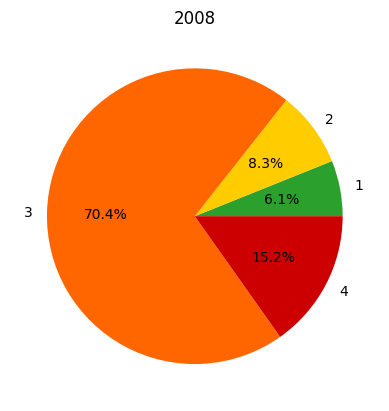

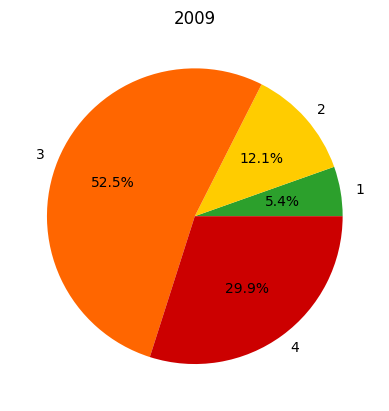

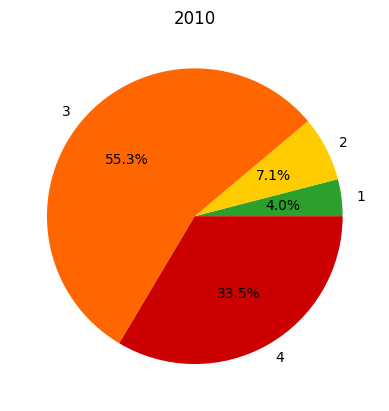

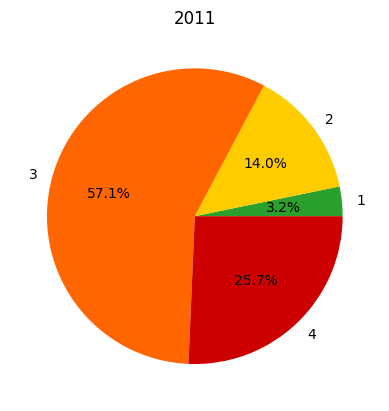

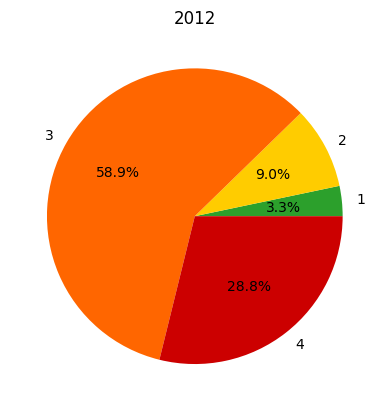

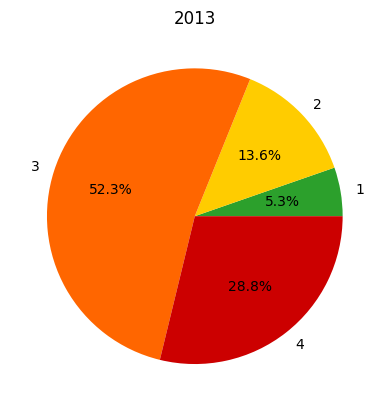

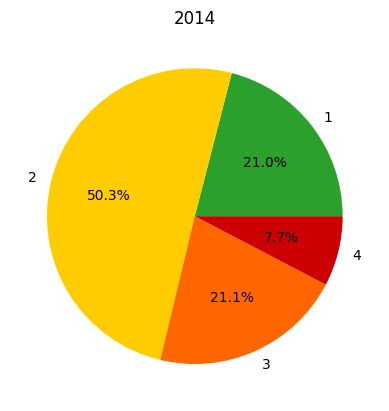

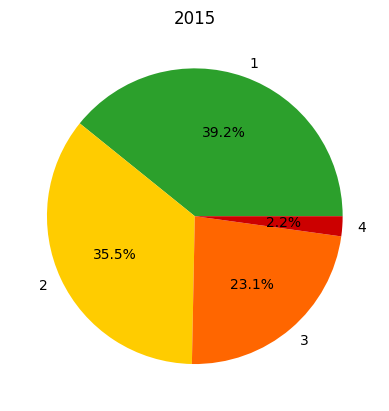

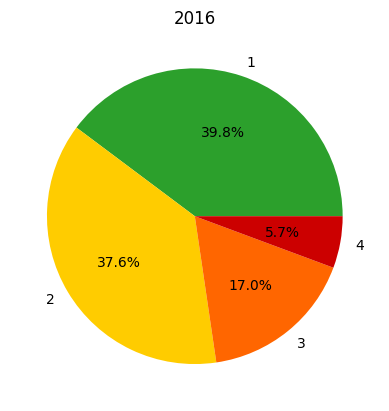

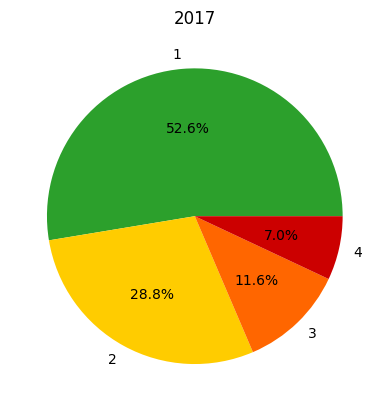

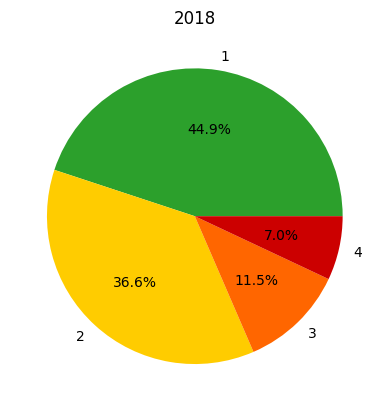

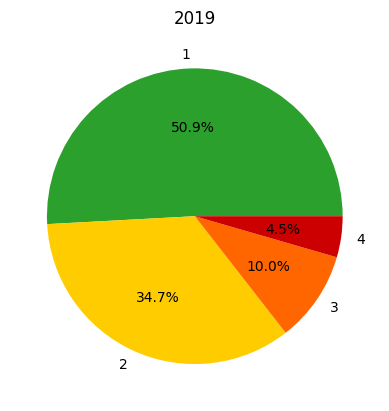

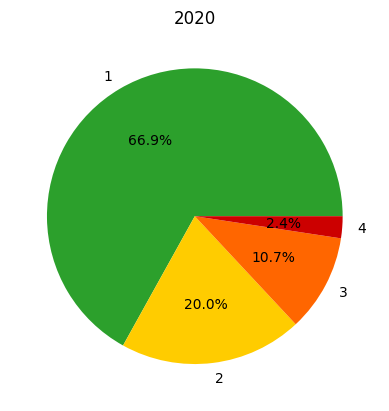

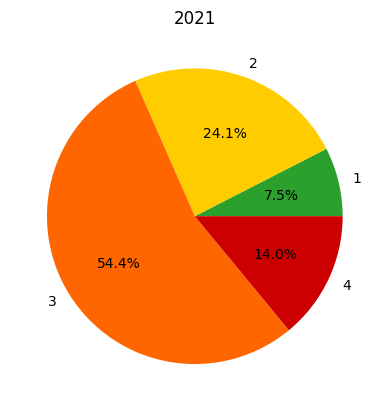

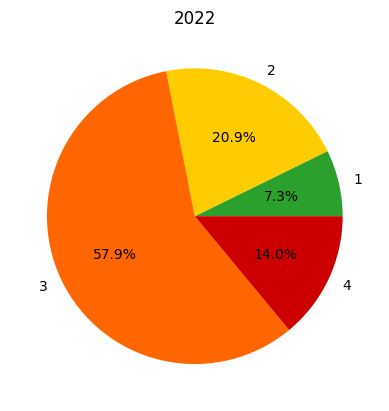

In [254]:
for year in air_pollution_df_copy['year'].unique():
    filtered_df = air_pollution_df_copy[air_pollution_df_copy['year'] == year]

    population_by_pollution_level = filtered_df.groupby('pollution_level')['population'].sum()

    labels = population_by_pollution_level.index
    sizes = population_by_pollution_level.values

    plt.title(year)
    plt.pie(
        sizes,
        labels=labels,
        colors=[colors[key] for key in labels],
        autopct='%.1f%%'
    )
    plt.show()

Построим диаграммы "ящик с усами" с помощью метода boxplot():

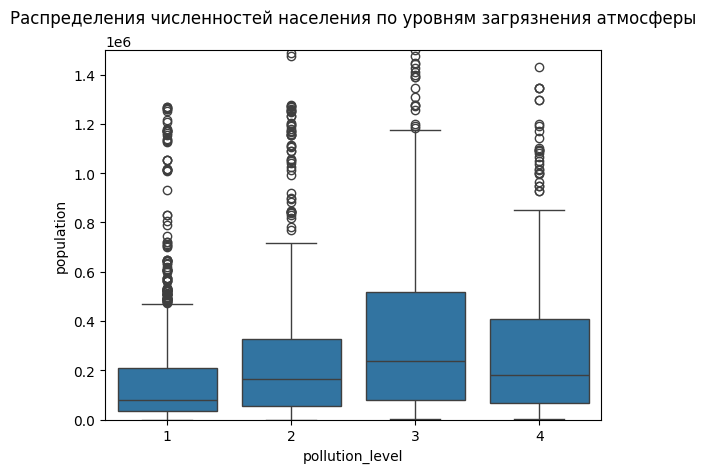

In [255]:
sns.boxplot(x='pollution_level', y='population', data=air_pollution_df_copy)
plt.axis(ymin=0, ymax=1500000)
plt.title('Распределения численностей населения по уровням загрязнения атмосферы', y=1.05)
plt.show()

Сравним 4 группы.

Проверим распределения на нормальность:

In [256]:
df_pl1=np.array(air_pollution_df_copy[air_pollution_df_copy['pollution_level']==1]['population'])
df_pl2=np.array(air_pollution_df_copy[air_pollution_df_copy['pollution_level']==2]['population'])
df_pl3=np.array(air_pollution_df_copy[air_pollution_df_copy['pollution_level']==3]['population'])
df_pl4=np.array(air_pollution_df_copy[air_pollution_df_copy['pollution_level']==4]['population'])

In [257]:
print(stats.shapiro(df_pl1))
print(stats.shapiro(df_pl2))
print(stats.shapiro(df_pl3))
print(stats.shapiro(df_pl4))

ShapiroResult(statistic=0.21531871183647888, pvalue=2.780048438921719e-60)
ShapiroResult(statistic=0.24700240631449533, pvalue=2.88532033607001e-45)
ShapiroResult(statistic=0.3471640756071225, pvalue=3.8704275519542654e-51)
ShapiroResult(statistic=0.23009440428453998, pvalue=1.527099186255536e-38)


Распределения совсем не нормальные, поэтому применим критерий Краскела-Уоллиса:

In [258]:
stats.mstats.kruskalwallis(df_pl1, df_pl2, df_pl3, df_pl4)

KruskalResult(statistic=305.8694483705543, pvalue=5.338438904482299e-66)

Посчитаем коэффициет корреляции Спирмена:

In [259]:
air_pollution_df_copy[['population','pollution_level']].corr(method='spearman')

population  pollution_level
population         1.000000         0.264831
pollution_level    0.264831         1.000000

Проверим стат. значимость корреляции:

In [260]:
population_and_pollution_level = air_pollution_df_copy[['population','pollution_level']].dropna()
scipy.stats.spearmanr(population_and_pollution_level.population, population_and_pollution_level.pollution_level)

SignificanceResult(statistic=0.26483103451345086, pvalue=1.776213211749757e-57)

Так как показатели уровней загрязнения воздуха в 2014-2020 существенно отличаются от других, сгруппируем дополнительно данные по трем диапазонам лет и проведем аналогичный анализ:

In [261]:
air_pollution_df_copy_2007_2013 = air_pollution_df_copy[(air_pollution_df_copy['year']>=2007) & (air_pollution_df_copy['year']<=2013)]
air_pollution_df_copy_2014_2020 = air_pollution_df_copy[(air_pollution_df_copy['year']>=2014) & (air_pollution_df_copy['year']<=2020)]
air_pollution_df_copy_2021_2022 = air_pollution_df_copy[air_pollution_df_copy['year']>=2021]
datasets = [air_pollution_df_copy_2007_2013, air_pollution_df_copy_2014_2020, air_pollution_df_copy_2021_2022]

In [262]:
#years_ranges = {air_pollution_df_copy_2007_2013: '2007-2013', air_pollution_df_copy_2014_2020: '2014-2020', air_pollution_df_copy_2021_2022: '2021-2022'}
for df in datasets:
    display(df.groupby('pollution_level')['population'].describe())

count           mean           std    min      25%       50%  \
pollution_level                                                                 
1                366.0   63715.622951  8.068760e+04  260.0  14475.0   39650.0   
2                255.0  185827.564706  2.103758e+05  290.0  55800.0  120100.0   
3                687.0  409912.941776  7.698873e+05  800.0  84350.0  245700.0   
4                220.0  568261.177273  1.664435e+06  800.0  81850.0  225800.0   

                      75%         max  
pollution_level                        
1                 83825.0    606900.0  
2                257200.0   1275000.0  
3                506100.0  10422700.0  
4                412000.0  11979500.0

count           mean           std      min       25%  \
pollution_level                                                          
1                907.0  254432.715546  6.954451e+05    200.0   43250.0   
2                312.0  567571.791667  1.601102e+06    700.0   57250.0   
3                177.0  430779.661017  6.313827e+05    700.0  106400.0   
4                126.0  210064.277778  2.513951e+05  12200.0   48900.0   

                      50%       75%         max  
pollution_level                                  
1                119000.0  298600.0  12678100.0  
2                227700.0  539075.0  12615300.0  
3                226800.0  559000.0   5191700.0  
4                 77700.0  311200.0   1169400.0

count           mean           std      min      25%  \
pollution_level                                                         
1                124.0   88604.838710  9.063438e+04    300.0  20050.0   
2                 91.0  366639.549451  8.056875e+05  11000.0  60550.0   
3                167.0  499454.065868  1.393345e+06    700.0  49200.0   
4                 82.0  253679.256098  2.680648e+05  12100.0  68850.0   

                      50%       75%         max  
pollution_level                                  
1                 51750.0  126250.0    443600.0  
2                165900.0  339200.0   5384300.0  
3                224800.0  533450.0  12655100.0  
4                160900.0  397700.0   1200700.0

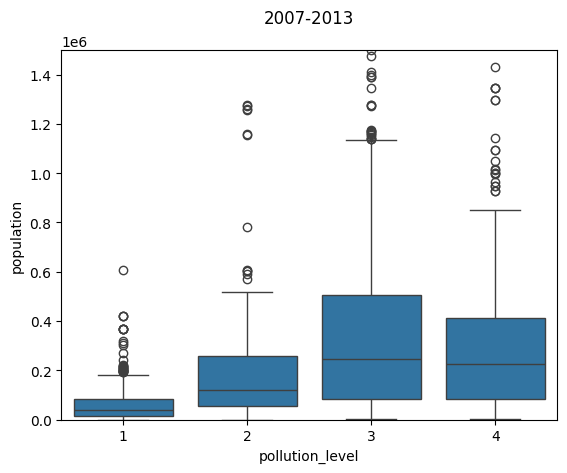

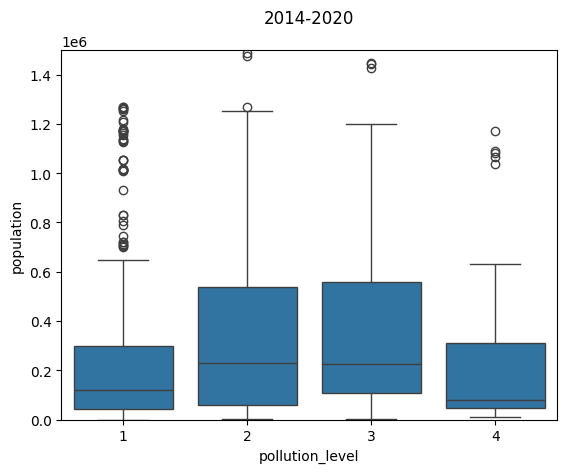

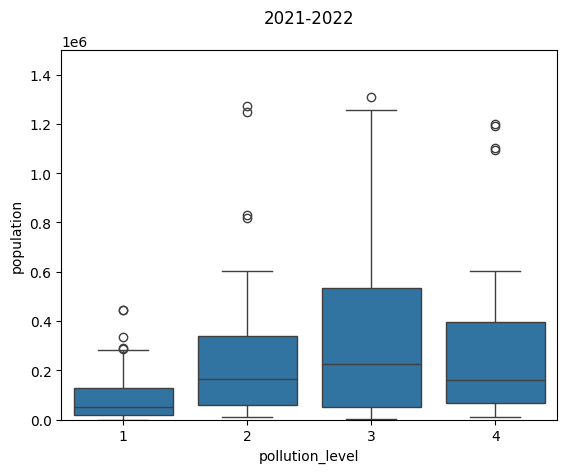

In [263]:
year_ranges = ('2007-2013', '2014-2020', '2021-2022')
for df, year_range in zip(datasets, year_ranges):
    sns.boxplot(x='pollution_level', y='population', data=df)
    plt.axis(ymin=0, ymax=1500000)
    plt.title(year_range, y=1.05)
    plt.show()

**Выводы по разделу с анализом взаимодействия численности населения и уровня загрязнения атмосферы:**
1.   Имеется умеренная стат. значимая прямая зависимость между численностью населения и уровнем загрязнения воздуха (коэффициент корреляции — 0.26).
2.   Несмотря на прямую зависимость между признаками, которая явно выполнятеся для первых трех уровней загрязнения, численность населения городов с очень высоким уровнем загрязнения в среднем ниже численности населения городов с высоким уровнем загрязнения.
3.   Чем выше медианная численность, тем шире разброс распределения.  
*    Для н.п. с низким загрязнением воздуха медианная численность равна 79700 чел., разброс характерных численностей — от 33000 чел. до 209100 чел. Следовательно, для небольших н.п. характерен низкий уровень загрязнения воздуха.  
*    Для н.п. с повышенным загрязнением воздуха медианная численность равна 162700 чел., разброс характерных численностей — от 56200 чел. до 327500 чел. Следовательно, для небольших городов характерен повышенный уровень загрязнения воздуха.
*    Для н.п. с высоким загрязнением воздуха медианная численность равна 235800 чел., разброс характерных численностей — от 79900 чел. до 519100 чел. Следовательно, для крупных городов характерен высокий уровень загрязнения воздуха.
*    Для н.п. с очень высоким загрязнением воздуха медианная численность равна 181200 чел., разброс характерных численностей — от 66400 чел. до 409000 чел. Следовательно, очень высокий уровень загрязнения характерен для средних по размеру городов городов.

В распределении численностей населения каждого уровня очень много выбросов, вследствие этого, среднее значение каждой из этих выборок в два раза и более превышает медианное.
4.   Подробное описание динамики распределения населения по уровню загрязнения с 2007 года по 2022 год:
*   В 2007-2008 годах: 85% (!) людей проживало в н.п. с высоким и очень высоким уровнем загрязнения атмосферы: 65-70% — с высоким, 15-20% — с очень высоким. 5-8% населения проживало в н.п. с повышенным загрязнением и всего лишь 6-7% — с низким уровнем загрязнения.
*   С 2019 по 2013 год распределение людей по уровню загрязнения атмосферы в н.п., в которых они живут, ухудшилось и стало катастрофическим: доля людей, проживающих в н.п. с высоким уровнением загрязнения уменьшилась до 52-59% всего населения, но доля людей, проживающих в н.п. с очень высоким уровнением загрязнения достигла огромного показателя в 25-33% (!) всего населения. 7-14% людей проживали в н.п. с повышенным загрязнением и всего лишь 3-5% (!) людей — с низким уровнем загрязнения.
*   В 2014 году показатели аномально резко улучшились (по причинам, описанным в пункте с анализом взаимосвязи *year - pollution_level*. Половину (50.3%) населения стали относится к н.п. с повышенным уровнем загрязнения, 21% — с низким уровнем. Так же 21% населения стало относилиться к н.п. с высоким загрязнением воздуха и 7.7% — с очень высоким.
*   С 2015 по 2020 год показатели становились с каждым годом ещё лучше на порядок и к 2020 году достигли следующих значений: более 66.9% (!) населения относились к н.п. с низким уровнем загрязнения, 20% населения — к н.п. с повышенным уровнем загрязнения, 10.7% населения — к н.п. с высоким уровнем загрязнения и лишь 4.7% — к н.п. с очень  высоким уровнем загрязнения.
*   В 2021 вернулись реальные показатели. С 2021 по 2022 год: примерно 70% людей проживают в городах с высоким (54-58%) и очень высоким (14%) уровнем загрязнения воздуха. 21-24% людей проживают в н.п. с высоким уровнем загрязнения воздуха, и всего лишь 7.5% людей проживают в н.п. с низким уровнем загрязнения воздуха.  

Исходя из вышеприведенных заключений можно сделать вывод, что картина распределения населения по уровню загрязнения н.п., в которых они проживают, за 15 лет заметно улучшилась, но по-прежнему остается негативной.

### *14.3. solid_emissions - year, so2_emissions - year, no2_emissions - year, co_emissions - year*

In [264]:
pollutants_emissions = ['solid_emissions', 'so2_emissions', 'no2_emissions', 'co_emissions']

Оценим медианные значения объемов выбросов твердых веществ, диоксида серы, диоксида азота и монооксида углерода в разрезе лет:

In [265]:
air_pollution_df_copy.groupby('year')[pollutants_emissions].median()

solid_emissions  so2_emissions  no2_emissions  co_emissions
year                                                             
2007             1.90           1.75           2.10          2.45
2008             2.10           1.60           5.00          9.40
2009             1.90           1.45           5.20         10.00
2010             1.60           1.50           5.40         13.10
2011             1.46           1.20           4.50         13.10
2012             1.30           1.00           3.70         11.40
2013             1.40           0.80           2.90          4.20
2014             1.15           0.70           2.90          9.30
2015             1.15           0.80           3.10          9.10
2016             1.30           0.80           3.10         10.00
2017             1.20           0.85           3.30         10.25
2018             1.20           0.65           2.80          9.55
2019             0.60           0.35           2.40          7.30
2020             0.90           0.50           2.20          2.40
2021             0.80           0.40           1.80          2.30
2022             0.90           0.40           1.85          2.15

Оценим описательные статистики объемов выбросов твердых веществ, диоксида серы, диоксида азота и монооксида углерода в разрезе лет:

In [266]:
for emis in pollutants_emissions:
    print(f'Описательные статистики для {emis}:')
    display(air_pollution_df_copy.groupby('year')[emis].describe())

Описательные статистики для solid_emissions:


count      mean       std    min     25%   50%    75%   max
year                                                             
2007  203.0  5.378507  8.815834  0.002  0.7000  1.90  4.950  51.1
2008  221.0  5.398570  8.489682  0.004  0.7000  2.10  5.600  48.0
2009  226.0  4.993947  8.585789  0.003  0.6000  1.90  4.675  70.7
2010  223.0  4.532498  7.470338  0.003  0.5800  1.60  4.600  52.7
2011  213.0  4.752817  7.631353  0.000  0.5000  1.46  5.300  51.9
2012  223.0  4.399013  7.384354  0.000  0.4000  1.30  4.900  57.8
2013  217.0  4.324207  7.618549  0.000  0.3000  1.40  3.700  60.8
2014  218.0  3.644697  6.268359  0.020  0.3000  1.15  3.600  44.6
2015  216.0  3.953426  6.333964  0.010  0.3000  1.15  4.700  35.8
2016  206.0  3.908752  6.262101  0.003  0.3025  1.30  4.575  38.5
2017  210.0  3.708443  5.997848  0.003  0.3000  1.20  3.775  35.8
2018  212.0  3.540425  5.834539  0.010  0.3000  1.20  3.475  35.8
2019  232.0  2.884065  5.184819  0.000  0.2000  0.60  3.025  35.4
2020  233.0  2.814888  4.706768  0.000  0.3000  0.90  2.800  26.5
2021  233.0  2.682614  4.489554  0.002  0.3000  0.80  2.600  24.4
2022  234.0  2.681517  4.483660  0.001  0.3000  0.90  2.475  27.5

Описательные статистики для so2_emissions:


count       mean         std    min      25%   50%    75%     max
year                                                                   
2007  202.0  17.381807  136.721103  0.000  0.50000  1.75  7.375  1938.9
2008  218.0  16.335688  132.364362  0.004  0.50000  1.60  7.575  1950.5
2009  226.0  15.563425  128.043616  0.000  0.50000  1.45  6.900  1920.4
2010  223.0  15.531637  128.596819  0.000  0.50000  1.50  7.300  1917.4
2011  213.0  16.465033  129.415327  0.002  0.30000  1.20  7.600  1880.9
2012  223.0  15.502130  128.593110  0.005  0.20000  1.00  6.250  1911.8
2013  211.0  16.090654  131.971449  0.000  0.20000  0.80  6.250  1908.1
2014  216.0  14.815537  128.531923  0.000  0.19750  0.70  5.325  1881.2
2015  213.0  14.963390  123.693787  0.002  0.20000  0.80  5.300  1797.3
2016  207.0  15.403367  129.407174  0.003  0.20000  0.80  5.100  1854.0
2017  210.0  14.598119  121.642624  0.001  0.20000  0.85  5.225  1758.2
2018  214.0  13.576603  114.915577  0.001  0.12250  0.65  4.825  1675.9
2019  233.0  12.124532  115.852433  0.000  0.10000  0.35  3.300  1764.7
2020  233.0  12.781361  120.529763  0.000  0.10000  0.50  4.100  1836.9
2021  233.0  11.113863  104.030762  0.001  0.10000  0.40  4.100  1585.3
2022  234.0  11.567957  115.484315  0.001  0.09325  0.40  4.015  1765.0

Описательные статистики для no2_emissions:


count       mean        std    min    25%   50%     75%    max
year                                                                
2007  203.0   4.303842   6.160017  0.010  0.600  2.10   5.350   44.6
2008  220.0  10.443318  22.778767  0.010  1.775  5.00  11.550  286.9
2009  226.0  10.720575  22.260276  0.050  1.800  5.20  11.300  273.0
2010  223.0  11.605269  24.242730  0.030  2.225  5.40  12.700  300.4
2011  213.0   8.321995  13.133505  0.020  1.500  4.50   9.800  128.5
2012  223.0  10.292556  49.283605  0.030  1.200  3.70   8.950  728.9
2013  217.0   6.134300   9.283676  0.003  0.700  2.90   7.500   66.2
2014  221.0   6.665217  11.534647  0.000  1.000  2.90   7.500  108.9
2015  219.0   7.072397  12.242461  0.001  0.900  3.10   8.600  108.6
2016  212.0   7.285292  12.388762  0.020  0.900  3.10   8.550  104.3
2017  214.0   7.399645  12.605596  0.020  1.025  3.30   8.875  110.6
2018  216.0   6.531051  11.351936  0.017  1.000  2.80   7.200  110.9
2019  233.0   5.886133  10.568995  0.000  0.600  2.40   6.900  106.1
2020  233.0   5.087082   8.503400  0.010  0.600  2.20   5.500   81.7
2021  233.0   4.283622   5.905708  0.020  0.600  1.80   5.600   35.2
2022  234.0   4.482979   7.632731  0.020  0.525  1.85   5.100   78.1

Описательные статистики для co_emissions:


count       mean        std    min    25%    50%     75%     max
year                                                                  
2007  204.0  11.645412  37.385413  0.004  0.900   2.45   5.650   277.4
2008  221.0  31.070679  72.859568  0.070  3.200   9.40  28.000   815.0
2009  226.0  32.877301  88.019613  0.010  3.325  10.00  30.725  1125.7
2010  223.0  33.616233  76.350899  0.010  4.750  13.10  31.950   898.0
2011  213.0  30.692864  64.458037  0.130  4.300  13.10  27.800   705.5
2012  223.0  26.831839  44.992686  0.100  3.400  11.40  28.050   313.3
2013  217.0  17.151060  36.515626  0.040  1.300   4.20  14.200   279.6
2014  221.0  27.912489  67.906577  0.040  1.800   9.30  26.000   757.7
2015  218.0  29.763394  69.039569  0.030  1.725   9.10  25.175   760.2
2016  212.0  31.834528  72.306429  0.020  2.600  10.00  26.825   752.2
2017  214.0  32.222514  74.569702  0.038  2.225  10.25  28.825   797.4
2018  216.0  27.522787  69.786395  0.000  1.575   9.55  25.050   804.8
2019  233.0  26.387781  61.063854  0.001  0.900   7.30  23.800   620.2
2020  233.0  13.836052  35.768833  0.040  0.800   2.40   7.000   260.3
2021  233.0   9.243262  27.066133  0.040  0.800   2.30   5.500   212.0
2022  234.0  10.087120  30.219711  0.040  0.700   2.15   5.675   252.8

Построим диаграммы "ящик с усами":

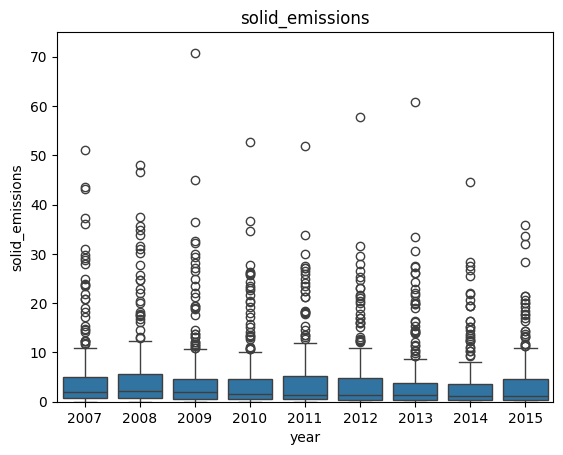

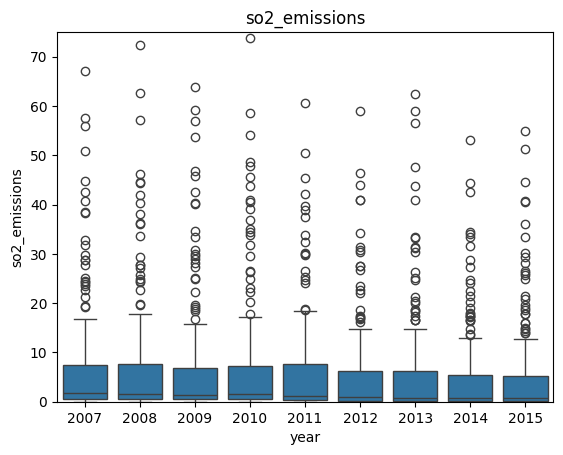

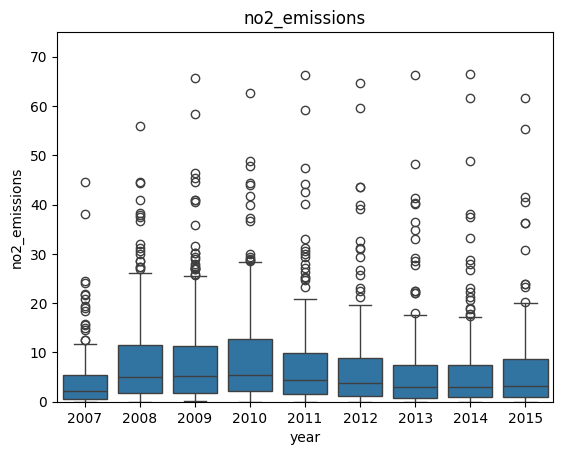

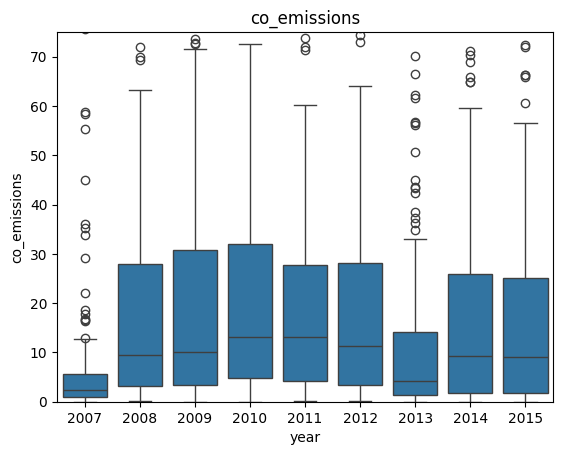

In [267]:
for emis in pollutants_emissions:
    df_years_before_2015 = air_pollution_df_copy[air_pollution_df_copy['year']<=2015]

    sns.boxplot(x='year', y=emis, data=df_years_before_2015)
    plt.axis(ymin=0, ymax=75)
    plt.title(emis)
    plt.show()

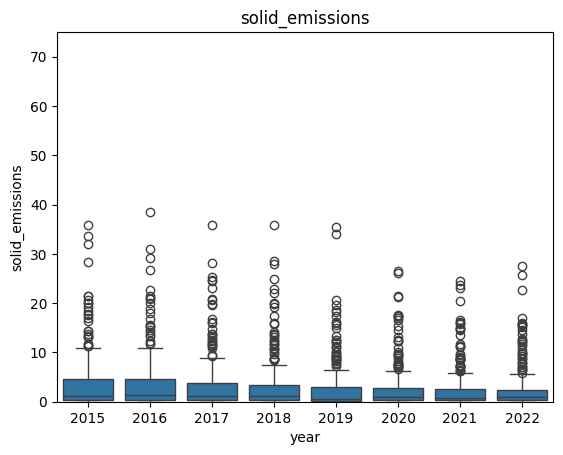

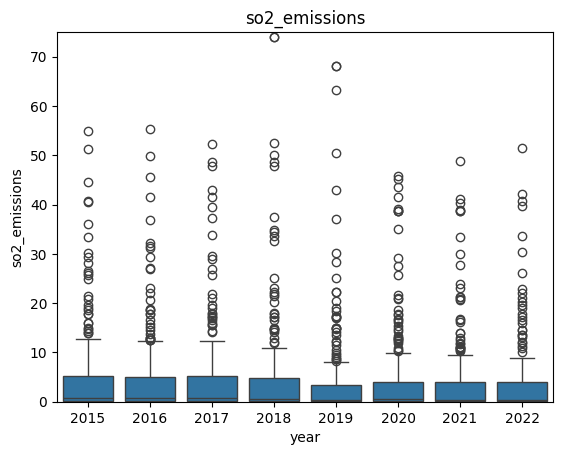

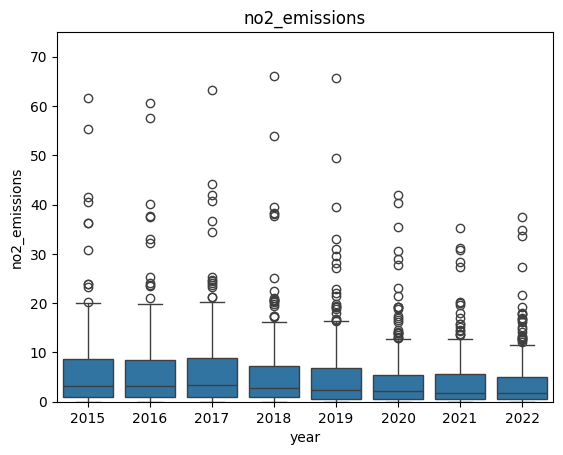

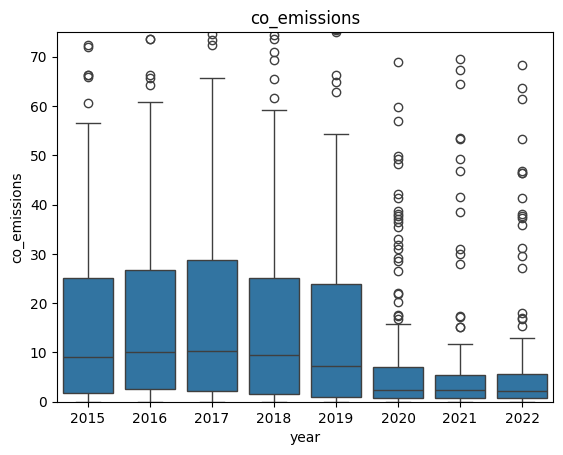

In [268]:
for emis in pollutants_emissions:
    df_years_after_2015 = air_pollution_df_copy[air_pollution_df_copy['year']>=2015]

    sns.boxplot(x='year', y=emis, data=df_years_after_2015)
    plt.axis(ymin=0, ymax=75)
    plt.title(emis)
    plt.show()

Посчитаем коэффициенты корреляции Спирмена:

In [269]:
columns = ['solid_emissions', 'so2_emissions', 'no2_emissions', 'co_emissions', 'year']
air_pollution_df_copy[columns].corr(method='spearman')

solid_emissions  so2_emissions  no2_emissions  co_emissions  \
solid_emissions         1.000000       0.744559       0.579091      0.482020   
so2_emissions           0.744559       1.000000       0.598645      0.459494   
no2_emissions           0.579091       0.598645       1.000000      0.781467   
co_emissions            0.482020       0.459494       0.781467      1.000000   
year                   -0.156571      -0.192178      -0.144743     -0.173846   

                     year  
solid_emissions -0.156571  
so2_emissions   -0.192178  
no2_emissions   -0.144743  
co_emissions    -0.173846  
year             1.000000

Проверим стат. значимость корреляций:

In [270]:
pollutants_emissions_and_year = air_pollution_df_copy[columns].dropna()

1) *solid_emissions* и *year*

In [271]:
scipy.stats.spearmanr(pollutants_emissions_and_year.solid_emissions, pollutants_emissions_and_year.year)

SignificanceResult(statistic=-0.15941545967481882, pvalue=2.8485423184814287e-21)

2) *so2_emissions* и *year*

In [272]:
scipy.stats.spearmanr(pollutants_emissions_and_year.so2_emissions, pollutants_emissions_and_year.year)

SignificanceResult(statistic=-0.18962711310218147, pvalue=1.4207299343175203e-29)

3) *no2_emissions* и *year*

In [273]:
scipy.stats.spearmanr(pollutants_emissions_and_year.so2_emissions, pollutants_emissions_and_year.year)

SignificanceResult(statistic=-0.18962711310218147, pvalue=1.4207299343175203e-29)

4) *co_emissions* и *year*

In [274]:
scipy.stats.spearmanr(pollutants_emissions_and_year.so2_emissions, pollutants_emissions_and_year.year)

SignificanceResult(statistic=-0.18962711310218147, pvalue=1.4207299343175203e-29)

**Выводы по разделу с анализом взаимодействия года и объема выбросов твердых веществ, диоксида серы, диоксида азота и монооксида углерода промышленными предприятиями:**
1.   Год имеет стат. значимую обратную зависимость с каждым из признаков, характеризующих объемы выбросов вредных веществ промышленными предприятиями. Значит, ситуация с выбросом вредных веществ промышленными предприятиями с течением времени улучшается (возможно из-за сокращения объема производства в целом).
2.  
Медианные объемы выбросов каждого из вредных веществ значительно ниже в 2022, чем в 2007 году.    
Твердых веществ: в 2007 году — 1.9 тыс. т, в 2022 году — 0.9 тыс. т.   
Диоксида серы: в 2007 году — 1.75 тыс. т, в 2022 году — 0.4 тыс. т.    
Диоксида азота: в 2007 году — 2.1 тыс. т, в 2022 году — 1.85 тыс. т.   
Монооксида углерода: в 2007 году — 2.45 тыс. т, в 2022 году — 2.15 тыс. т.


### *14.4. solid_emissions - pollution_level, so2_emissions - pollution_level, no2_emissions - pollution_level, co_emissions - pollution_level*

In [275]:
pollutants_emissions = ['solid_emissions', 'so2_emissions', 'no2_emissions', 'co_emissions']

Оценим медианные значения объемов выбросов твердых веществ, диоксида серы, диоксида азота и монооксида углерода в разрезе уровней загрязнения атмосферы:

In [276]:
air_pollution_df_copy.groupby('pollution_level')[pollutants_emissions].median()

solid_emissions  so2_emissions  no2_emissions  co_emissions
pollution_level                                                             
1                          0.695            0.5            2.0           4.6
2                          1.200            0.7            3.3           6.4
3                          1.900            1.8            5.6          11.2
4                          3.500            3.7            5.3           9.9

Оценим описательные статистики объемов выбросов твердых веществ, диоксида серы, диоксида азота и монооксида углерода в разрезе уровней загрязнения атмосферы:

In [277]:
for emis in pollutants_emissions:
    print(f'Описательные статистики для {emis}:')
    display(air_pollution_df_copy.groupby('pollution_level')[emis].describe())

Описательные статистики для solid_emissions:


count      mean       std    min   25%    50%    75%   max
pollution_level                                                             
1                1208.0  2.355326  4.121076  0.000  0.20  0.695   2.40  35.8
2                 623.0  3.462152  6.428178  0.000  0.36  1.200   3.15  60.8
3                1001.0  5.279903  7.954284  0.003  0.70  1.900   6.20  70.7
4                 419.0  7.804305  9.460682  0.003  1.00  3.500  11.25  51.1

Описательные статистики для so2_emissions:


count       mean         std    min  25%  50%    75%     max
pollution_level                                                               
1                1210.0   4.525184   12.103789  0.000  0.1  0.5   3.20   120.6
2                 621.0   7.147647   17.587247  0.000  0.2  0.7   5.50   139.3
3                1002.0   8.014025   15.387243  0.000  0.4  1.8   8.60   119.8
4                 419.0  78.326272  351.031393  0.002  0.7  3.7  12.95  1950.5

Описательные статистики для no2_emissions:


count       mean        std    min  25%  50%    75%    max
pollution_level                                                             
1                1219.0   4.459156   7.408013  0.000  0.7  2.0   5.40  110.6
2                 626.0   7.613329  13.458063  0.000  1.0  3.3   8.00  110.9
3                1001.0   9.857994  15.219077  0.003  2.3  5.6  12.60  286.9
4                 419.0  11.858045  41.776146  0.001  1.1  5.3  12.05  728.9

Описательные статистики для co_emissions:


count       mean        std    min   25%   50%     75%  \
pollution_level                                                            
1                1219.0  14.840426  39.377652  0.000  1.00   4.6  13.900   
2                 626.0  27.227270  76.581621  0.001  1.40   6.4  24.100   
3                1002.0  31.358533  58.087471  0.020  3.20  11.2  35.275   
4                 419.0  42.375802  94.995544  0.030  2.65   9.9  38.500   

                    max  
pollution_level          
1                 797.4  
2                 804.8  
3                 815.0  
4                1125.7

Построим диаграммы "ящик с усами":

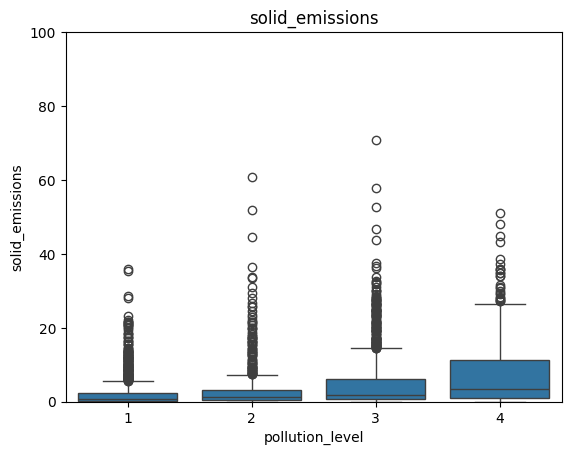

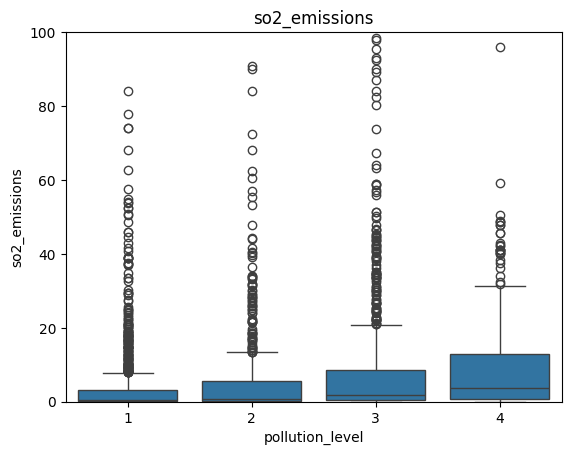

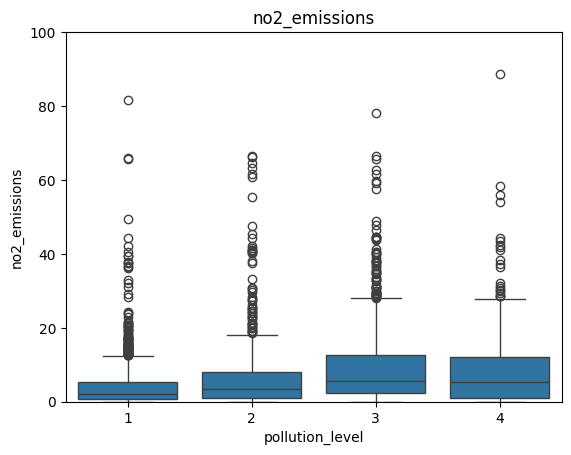

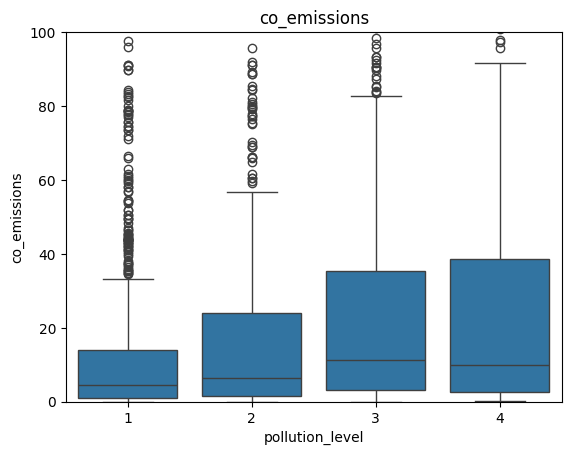

In [278]:
for emis in pollutants_emissions:
    sns.boxplot(x='pollution_level', y=emis, data=air_pollution_df_copy)
    plt.axis(ymin=0, ymax=100)
    plt.title(emis)
    plt.show()

Посчитаем коэффициенты корреляции Спирмена:

In [279]:
columns = ['solid_emissions', 'so2_emissions', 'no2_emissions', 'co_emissions', 'pollution_level']
air_pollution_df_copy[columns].corr(method='spearman')

solid_emissions  so2_emissions  no2_emissions  co_emissions  \
solid_emissions         1.000000       0.744559       0.579091      0.482020   
so2_emissions           0.744559       1.000000       0.598645      0.459494   
no2_emissions           0.579091       0.598645       1.000000      0.781467   
co_emissions            0.482020       0.459494       0.781467      1.000000   
pollution_level         0.292793       0.246242       0.240553      0.215273   

                 pollution_level  
solid_emissions         0.292793  
so2_emissions           0.246242  
no2_emissions           0.240553  
co_emissions            0.215273  
pollution_level         1.000000

Проверим стат. значимость корреляций:

In [280]:
pollutants_emissions_and_pollution_level = air_pollution_df_copy[columns].dropna()

1) *solid_emissions* и *pollution_level*

In [281]:
scipy.stats.spearmanr(pollutants_emissions_and_pollution_level.solid_emissions, pollutants_emissions_and_pollution_level.pollution_level)

SignificanceResult(statistic=0.2897971801641455, pvalue=1.3188329597245347e-63)

2) *so2_emissions* и *pollution_level*

In [282]:
scipy.stats.spearmanr(pollutants_emissions_and_pollution_level.so2_emissions, pollutants_emissions_and_pollution_level.pollution_level)

SignificanceResult(statistic=0.2426292375040389, pvalue=1.50894636030754e-44)

3) *no2_emissions* и *pollution_level*

In [283]:
scipy.stats.spearmanr(pollutants_emissions_and_pollution_level.no2_emissions, pollutants_emissions_and_pollution_level.pollution_level)

SignificanceResult(statistic=0.23822629797219103, pvalue=5.802191148877408e-43)

4) *co_emissions* и *pollution_level*

In [284]:
scipy.stats.spearmanr(pollutants_emissions_and_pollution_level.co_emissions, pollutants_emissions_and_pollution_level.pollution_level)

SignificanceResult(statistic=0.2116739562414022, pvalue=4.433931048851399e-34)

Так как показатели уровней загрязнения воздуха в 2014-2020 существенно отличаются от другим сгруппируем дополнительно данные по трем диапазонам лет и проведем графический анализ:

In [285]:
air_pollution_df_copy_2007_2013 = air_pollution_df_copy[(air_pollution_df_copy['year']>=2007) & (air_pollution_df_copy['year']<=2013)]
air_pollution_df_copy_2014_2020 = air_pollution_df_copy[(air_pollution_df_copy['year']>=2014) & (air_pollution_df_copy['year']<=2020)]
air_pollution_df_copy_2021_2022 = air_pollution_df_copy[air_pollution_df_copy['year']>=2021]
datasets = [air_pollution_df_copy_2007_2013, air_pollution_df_copy_2014_2020, air_pollution_df_copy_2021_2022]

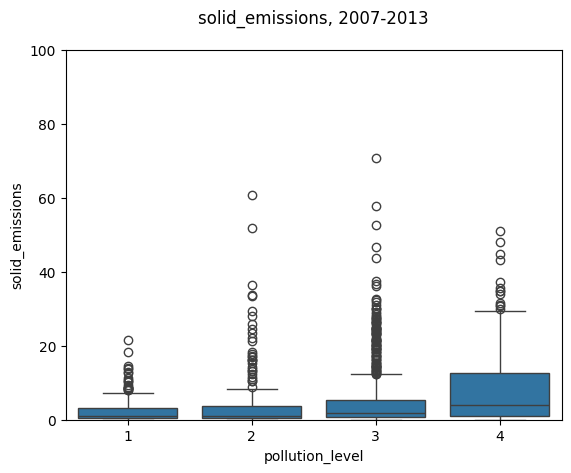

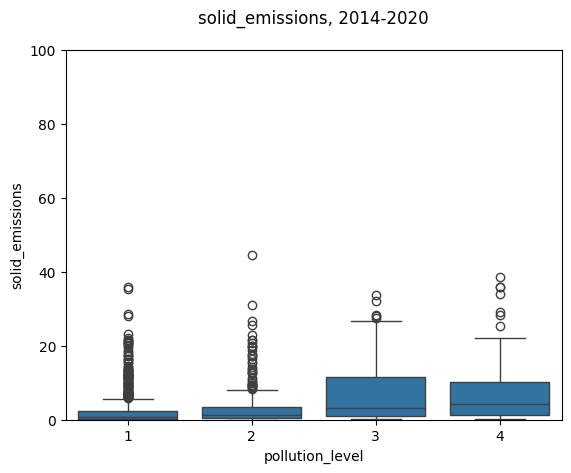

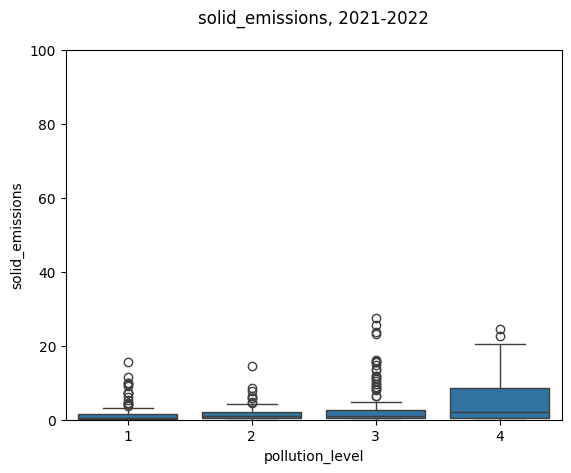

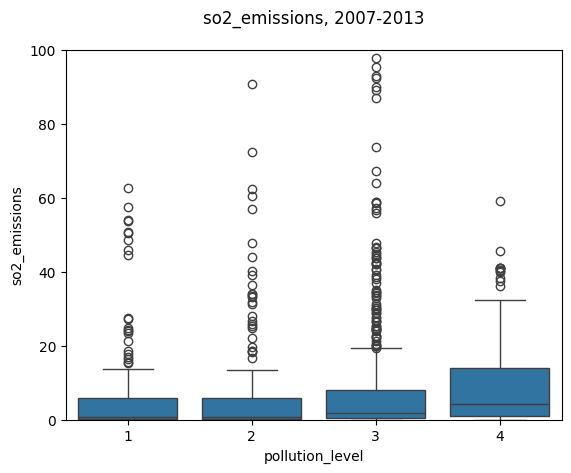

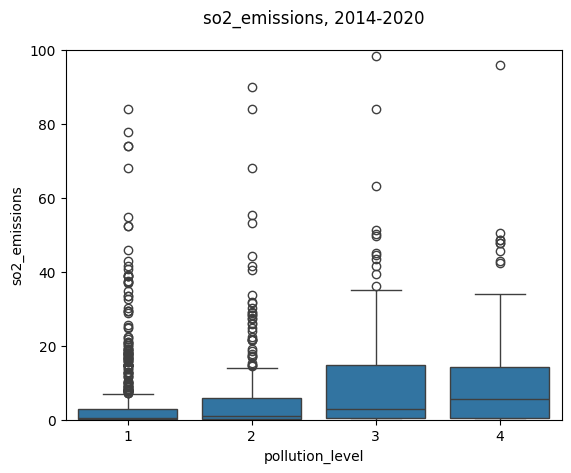

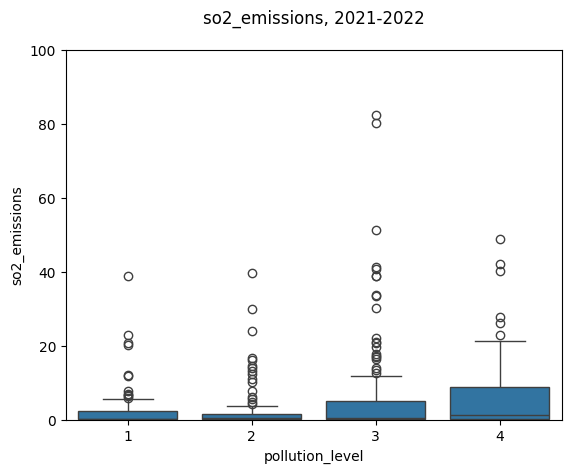

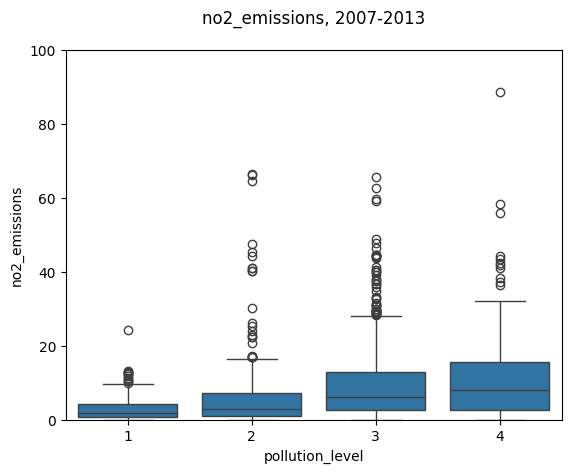

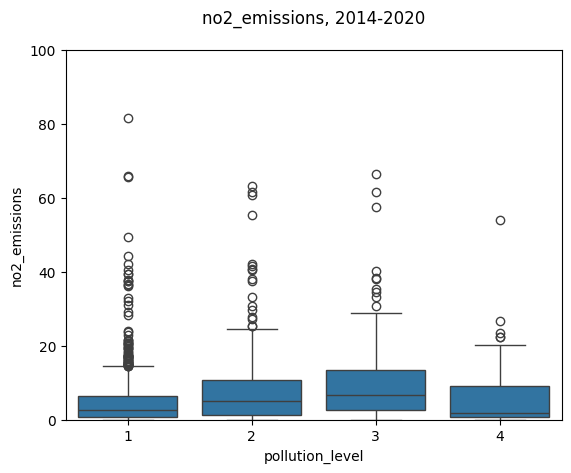

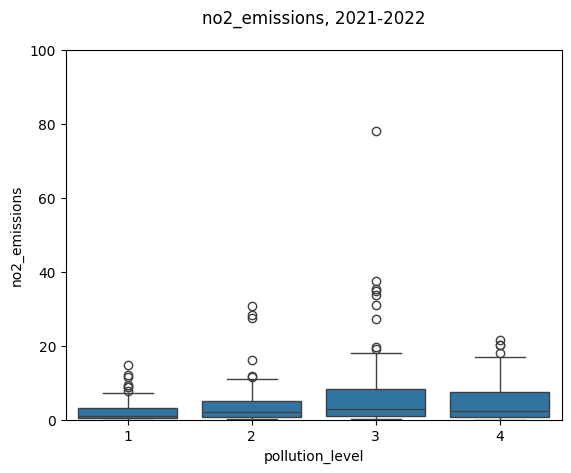

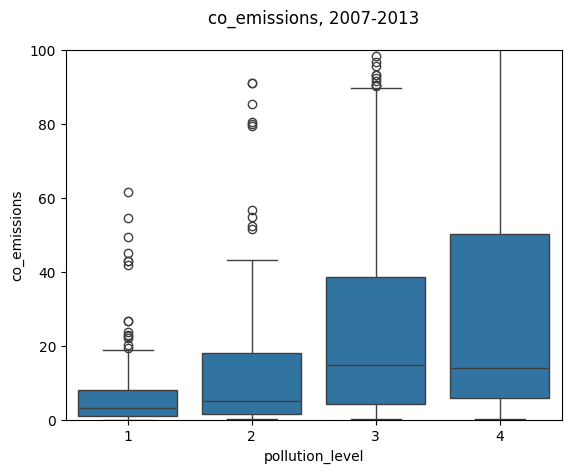

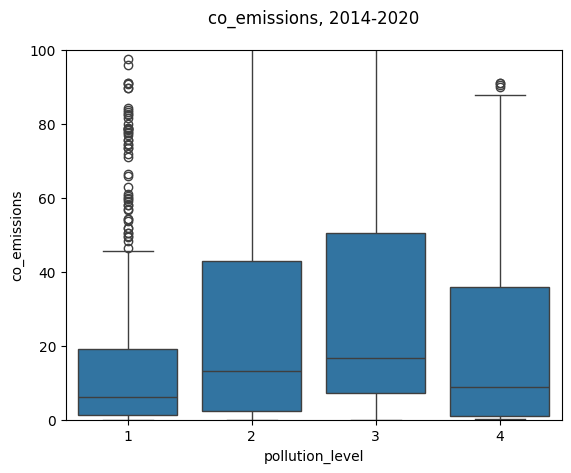

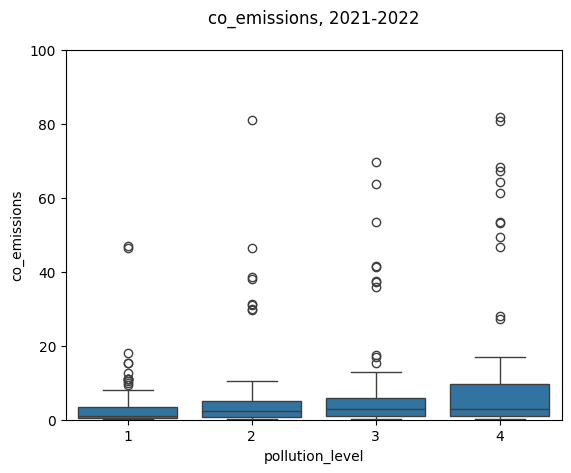

In [286]:
year_ranges = ('2007-2013', '2014-2020', '2021-2022')
for emis in pollutants_emissions:
    for df, year_range in zip(datasets, year_ranges):
        sns.boxplot(x='pollution_level', y=emis, data=df)
        plt.axis(ymin=0, ymax=100)
        plt.title(emis + ', ' + year_range, y=1.05)
        plt.show()

**Выводы по разделу с анализом взаимодействия объемов выбросов твердых веществ, диоксида серы, диоксида азота и монооксида углерода промышленными предприятиями и уровня загрязнения атмосферы:**
1.   Имеется умеренная стат. значимая прямая зависимость между уровнем загрязнения воздуха с каждым из признаков, характеризующих объемы выбросов вредных веществ промышленными предприятиями.

### *14.5. solid_emissions - economic_region, so2_emissions - economic_region, no2_emissions - economic_region, co_emissions - economic_region*

Оценим описательные статистики объемов выбрсов вредных веществ промыщленными предприятиями в разрезе экономических районов:

In [287]:
pollutants_emissions = ['solid_emissions', 'so2_emissions', 'no2_emissions', 'co_emissions']

In [288]:
for emis in pollutants_emissions:
    print(emis + ':')
    display(air_pollution_df_copy.groupby('economic_region')[emis].describe())

solid_emissions:


count      mean        std    min     25%   50%  \
economic_region                                                           
Волго-Вятский           140.0  1.596214   1.913738  0.020  0.3000  0.70   
Восточно-Сибирский      482.0  7.060251   7.435108  0.029  1.3000  4.60   
Дальневосточный         439.0  4.041526   5.212868  0.000  0.5000  1.90   
Западно-Сибирский       330.0  6.967933  11.972907  0.003  0.3000  1.75   
Калининградский          16.0  1.446875   0.428746  0.900  1.2000  1.35   
Поволжский              316.0  1.618266   2.383977  0.001  0.4000  1.10   
Северный                346.0  5.063295   6.841141  0.010  0.8000  2.90   
Северо-Западный         225.0  0.910151   1.119196  0.010  0.2000  0.40   
Северо-Кавказский       320.0  1.582262   4.439092  0.000  0.1275  0.37   
Уральский               388.0  4.939149   7.699664  0.000  0.5225  1.55   
Центрально-Черноземный  112.0  6.519286   7.648205  0.030  0.9000  1.80   
Центральный             406.0  1.409532   2.486529  0.000  0.2000  0.40   

                           75%   max  
economic_region                       
Волго-Вятский            1.700   9.6  
Восточно-Сибирский      10.950  37.2  
Дальневосточный          5.100  36.6  
Западно-Сибирский        7.675  70.7  
Калининградский          1.625   2.7  
Поволжский               1.925  31.5  
Северный                 5.800  37.4  
Северо-Западный          1.300   5.9  
Северо-Кавказский        1.000  33.6  
Уральский                4.800  43.2  
Центрально-Черноземный  10.175  28.7  
Центральный              1.500  17.8

so2_emissions:


count       mean         std    min    25%   50%  \
economic_region                                                            
Волго-Вятский           146.0   2.104219    3.082869  0.020  0.100  0.65   
Восточно-Сибирский      482.0  71.099025  328.022372  0.010  1.000  5.10   
Дальневосточный         438.0   2.677304    3.712697  0.000  0.300  1.20   
Западно-Сибирский       330.0   8.800521   15.688031  0.002  0.100  0.50   
Калининградский          16.0   1.462500    0.631269  0.500  1.150  1.40   
Поволжский              316.0   3.810680    7.406057  0.000  0.200  1.50   
Северный                346.0  15.974249   24.679536  0.020  0.700  4.45   
Северо-Западный         211.0   2.014322    4.432130  0.001  0.100  0.30   
Северо-Кавказский       317.0   2.137678    8.908250  0.000  0.100  0.20   
Уральский               389.0   7.801789   16.012905  0.000  0.300  1.50   
Центрально-Черноземный  112.0   5.597143    7.522332  0.030  0.275  0.95   
Центральный             406.0   2.181830    4.982312  0.000  0.100  0.30   

                            75%     max  
economic_region                          
Волго-Вятский            2.3000    14.9  
Восточно-Сибирский      13.3000  1950.5  
Дальневосточный          3.1000    25.2  
Западно-Сибирский        9.6250    77.9  
Калининградский          2.0500     2.4  
Поволжский               4.0250    47.7  
Северный                24.8375   120.6  
Северо-Западный          1.0550    23.9  
Северо-Кавказский        0.6000    59.2  
Уральский                7.2000   119.8  
Центрально-Черноземный  10.0250    22.3  
Центральный              1.0000    28.2

no2_emissions:


count       mean        std    min     25%   50%  \
economic_region                                                            
Волго-Вятский           146.0   6.425411   7.997218  0.200  1.7250  3.70   
Восточно-Сибирский      482.0   6.332237  10.334622  0.001  0.7000  2.60   
Дальневосточный         440.0   3.635768   4.430098  0.020  0.7000  1.80   
Западно-Сибирский       329.0  11.316809  12.978998  0.040  1.3000  5.30   
Калининградский          16.0   6.600000   3.967367  2.000  4.4250  5.85   
Поволжский              316.0   6.951554   7.500898  0.020  1.0000  4.75   
Северный                346.0   4.203243   4.520775  0.002  1.2250  2.95   
Северо-Западный         228.0   6.383000  18.860178  0.010  0.3575  1.10   
Северо-Кавказский       324.0   5.608426  10.299055  0.000  0.7000  2.00   
Уральский               392.0   9.323240  10.815303  0.000  2.2375  5.50   
Центрально-Черноземный  112.0   9.945982   7.901520  0.500  3.3000  9.55   
Центральный             409.0  11.331298  45.764204  0.020  0.8000  2.80   

                           75%    max  
economic_region                        
Волго-Вятский            8.100   47.5  
Восточно-Сибирский       8.500   66.4  
Дальневосточный          5.225   28.1  
Западно-Сибирский       17.800   49.5  
Калининградский          7.400   14.2  
Поволжский              10.525   42.0  
Северный                 5.300   28.9  
Северо-Западный          3.350  133.1  
Северо-Кавказский        6.400   87.5  
Уральский               12.425   88.7  
Центрально-Черноземный  13.850   32.7  
Центральный              8.500  728.9

co_emissions:


count       mean         std    min     25%    50%  \
economic_region                                                              
Волго-Вятский           146.0  19.306507   25.213999  0.050   4.425  10.10   
Восточно-Сибирский      481.0  16.203202   31.998338  0.010   0.800   5.40   
Дальневосточный         441.0  10.630100   15.312811  0.004   2.300   5.00   
Западно-Сибирский       330.0  29.961030   49.766581  0.080   3.200   8.50   
Калининградский          16.0  26.300000   15.276649  1.800  20.725  30.10   
Поволжский              316.0  23.174465   30.300100  0.050   2.800   8.75   
Северный                346.0  19.625809   52.050729  0.010   1.425   4.55   
Северо-Западный         228.0  23.439658   79.982878  0.032   0.600   2.30   
Северо-Кавказский       324.0  16.910188   31.723742  0.001   1.000   7.10   
Уральский               392.0  39.312806   51.990310  0.030   4.000  12.35   
Центрально-Черноземный  112.0  59.464018   83.960599  0.600   8.600  26.50   
Центральный             409.0  34.055978  126.544559  0.000   0.900   2.70   

                           75%     max  
economic_region                         
Волго-Вятский           19.900   115.4  
Восточно-Сибирский      14.800   336.7  
Дальневосточный         13.600   143.4  
Западно-Сибирский       35.375   285.8  
Калининградский         33.150    50.8  
Поволжский              37.725   255.3  
Северный                14.945   281.0  
Северо-Западный          7.820   406.6  
Северо-Кавказский       18.475   332.6  
Уральский               57.175   275.4  
Центрально-Черноземный  70.350   307.1  
Центральный             22.900  1125.7

In [289]:
year_ranges = ('2007-2013', '2014-2020', '2021-2022')

In [290]:
air_pollution_df_copy_2007_2013 = air_pollution_df_copy[(air_pollution_df_copy['year']>=2007) & (air_pollution_df_copy['year']<=2013)].copy()
air_pollution_df_copy_2014_2020 = air_pollution_df_copy[(air_pollution_df_copy['year']>=2014) & (air_pollution_df_copy['year']<=2020)].copy()
air_pollution_df_copy_2021_2022 = air_pollution_df_copy[air_pollution_df_copy['year']>=2021].copy()
datasets = [air_pollution_df_copy_2007_2013, air_pollution_df_copy_2014_2020, air_pollution_df_copy_2021_2022].copy()

In [291]:
for emis in pollutants_emissions:
    for year_range, df in zip(year_ranges, datasets):
        print(emis + ', ' + year_range)
        display(df.groupby('economic_region')[emis].describe().sort_values('50%', ascending=False))

solid_emissions, 2007-2013


count      mean        std    min     25%    50%  \
economic_region                                                            
Восточно-Сибирский      218.0  8.081018   8.502638  0.030  1.6000  4.800   
Северный                158.0  6.088608   8.039056  0.050  1.3000  3.305   
Дальневосточный         196.0  4.783673   5.990090  0.020  0.9000  2.400   
Западно-Сибирский       147.0  8.597265  14.509082  0.003  0.3000  2.100   
Уральский               175.0  6.311943   9.149407  0.060  0.6050  1.900   
Центрально-Черноземный   49.0  7.618367   8.638038  0.500  1.0000  1.900   
Поволжский              124.0  2.280242   3.247787  0.090  0.8375  1.550   
Калининградский           7.0  1.600000   0.535413  1.000  1.3500  1.500   
Центральный             169.0  1.522071   1.877797  0.000  0.3000  0.900   
Волго-Вятский            64.0  1.529688   1.881677  0.020  0.2000  0.700   
Северо-Кавказский       121.0  1.832091   4.443214  0.001  0.2000  0.500   
Северо-Западный          98.0  0.839490   1.009889  0.020  0.2000  0.440   

                           75%   max  
economic_region                       
Восточно-Сибирский      12.150  37.2  
Северный                 6.400  37.4  
Дальневосточный          7.100  36.6  
Западно-Сибирский        9.350  70.7  
Уральский                8.400  43.2  
Центрально-Черноземный  13.400  28.7  
Поволжский               2.425  31.5  
Калининградский          1.650   2.7  
Центральный              2.100  14.1  
Волго-Вятский            1.750   7.5  
Северо-Кавказский        1.100  24.2  
Северо-Западный          1.100   4.5

solid_emissions, 2014-2020


count      mean       std    min    25%   50%    75%  \
economic_region                                                                
Восточно-Сибирский      204.0  6.366907  6.382127  0.029  0.800  4.10  9.700   
Северный                144.0  4.564792  5.864705  0.010  0.585  2.45  5.250   
Дальневосточный         187.0  3.497059  4.427900  0.000  0.320  1.70  3.800   
Центрально-Черноземный   49.0  5.868571  7.035187  0.030  0.800  1.60  9.700   
Уральский               165.0  4.041515  6.487012  0.000  0.400  1.40  3.400   
Калининградский           7.0  1.350000  0.347611  0.900  1.150  1.25  1.550   
Западно-Сибирский       143.0  5.890825  9.792356  0.010  0.300  1.20  7.300   
Поволжский              143.0  1.308629  1.599696  0.001  0.325  0.90  1.600   
Волго-Вятский            58.0  1.727069  2.085781  0.100  0.400  0.80  1.700   
Центральный             184.0  1.527478  3.170111  0.000  0.200  0.40  1.100   
Северо-Западный         102.0  0.859451  1.086450  0.010  0.200  0.30  1.175   
Северо-Кавказский       141.0  1.670929  4.966771  0.000  0.100  0.30  0.800   

                         max  
economic_region               
Восточно-Сибирский      26.2  
Северный                26.7  
Дальневосточный         17.6  
Центрально-Черноземный  21.5  
Уральский               29.2  
Калининградский          1.9  
Западно-Сибирский       44.6  
Поволжский              13.4  
Волго-Вятский            9.6  
Центральный             17.8  
Северо-Западный          5.3  
Северо-Кавказский       33.6

solid_emissions, 2021-2022


count      mean       std    min     25%   50%    75%  \
economic_region                                                                 
Восточно-Сибирский       60.0  5.708833  6.104734  0.060  0.3875  4.55  8.950   
Западно-Сибирский        40.0  4.830800  7.289083  0.014  0.3225  1.85  5.750   
Уральский                48.0  3.019792  4.218735  0.050  0.5750  1.55  2.250   
Северный                 44.0  3.012955  4.019608  0.050  0.4825  1.45  3.300   
Дальневосточный          56.0  3.262143  4.392557  0.070  0.5000  1.25  4.100   
Калининградский           2.0  1.250000  0.070711  1.200  1.2250  1.25  1.275   
Центрально-Черноземный   14.0  4.950000  5.692607  0.300  0.6750  1.00  7.800   
Северо-Западный          25.0  1.394000  1.525238  0.100  0.2000  0.90  2.300   
Волго-Вятский            18.0  1.411111  1.457996  0.200  0.5250  0.70  1.475   
Поволжский               49.0  0.846694  0.819471  0.004  0.2000  0.50  1.300   
Центральный              53.0  0.641208  0.838850  0.001  0.2000  0.40  0.600   
Северо-Кавказский        58.0  0.845517  2.724904  0.025  0.1000  0.25  0.500   

                         max  
economic_region               
Восточно-Сибирский      27.5  
Западно-Сибирский       25.7  
Уральский               15.8  
Северный                16.6  
Дальневосточный         15.9  
Калининградский          1.3  
Центрально-Черноземный  16.0  
Северо-Западный          5.9  
Волго-Вятский            4.6  
Поволжский               2.8  
Центральный              3.3  
Северо-Кавказский       20.4

so2_emissions, 2007-2013


count       mean         std    min     25%    50%  \
economic_region                                                              
Северный                158.0  18.162848   24.140141  0.200  1.0250  6.800   
Восточно-Сибирский      218.0  71.191376  337.689294  0.040  1.1000  4.550   
Уральский               176.0  11.187557   21.629397  0.030  0.5600  2.900   
Поволжский              124.0   4.868629    8.164393  0.010  0.5000  2.400   
Калининградский           7.0   1.971429    0.468025  1.000  1.9000  2.200   
Центрально-Черноземный   49.0   5.164082    6.582556  0.040  0.7000  2.200   
Дальневосточный         195.0   3.318533    4.446981  0.004  0.4000  1.700   
Волго-Вятский            64.0   3.250469    3.813324  0.030  0.5000  1.050   
Западно-Сибирский       147.0   8.870701   15.952728  0.002  0.1600  0.500   
Северо-Кавказский       118.0   3.024424   10.720013  0.001  0.2000  0.500   
Центральный             168.0   2.531190    5.271212  0.000  0.2000  0.500   
Северо-Западный          92.0   2.631304    5.375719  0.020  0.1925  0.445   

                            75%     max  
economic_region                          
Северный                28.6250   110.1  
Восточно-Сибирский      12.2250  1950.5  
Уральский                9.9000   119.8  
Поволжский               6.1250    47.7  
Калининградский          2.2000     2.4  
Центрально-Черноземный   9.3000    19.9  
Дальневосточный          3.9500    25.2  
Волго-Вятский            5.9000    14.9  
Западно-Сибирский        9.0500    63.9  
Северо-Кавказский        1.0000    59.2  
Центральный              1.3250    26.4  
Северо-Западный          1.1325    23.9

so2_emissions, 2014-2020


count       mean         std    min     25%    50%  \
economic_region                                                              
Восточно-Сибирский      204.0  72.531863  326.328119  0.010  0.9500  5.550   
Северный                144.0  16.481528   27.693166  0.020  0.4475  3.350   
Калининградский           7.0   1.214286    0.353217  0.500  1.2000  1.200   
Уральский               165.0   4.844861    7.708342  0.000  0.3000  1.200   
Дальневосточный         187.0   2.136802    2.881530  0.000  0.2800  0.900   
Поволжский              143.0   3.672007    7.735561  0.000  0.1000  0.900   
Центрально-Черноземный   49.0   5.612449    7.997250  0.030  0.2000  0.700   
Западно-Сибирский       143.0   8.973203   15.985693  0.004  0.1000  0.600   
Волго-Вятский            64.0   1.315469    2.096864  0.020  0.1000  0.285   
Северо-Западный          94.0   1.648851    3.871910  0.001  0.1000  0.200   
Северо-Кавказский       141.0   1.764142    8.001554  0.000  0.1000  0.200   
Центральный             185.0   2.169735    5.154237  0.002  0.1000  0.200   

                           75%     max  
economic_region                         
Восточно-Сибирский      14.875  1881.2  
Северный                19.825   120.6  
Калининградский          1.400     1.6  
Уральский                5.900    42.9  
Дальневосточный          2.700    12.3  
Поволжский               3.850    44.3  
Центрально-Черноземный  12.500    22.3  
Западно-Сибирский        9.850    77.9  
Волго-Вятский            1.465     8.2  
Северо-Западный          0.600    16.3  
Северо-Кавказский        0.300    51.2  
Центральный              0.800    28.2

so2_emissions, 2021-2022


count       mean         std    min     25%   50%  \
economic_region                                                             
Восточно-Сибирский       60.0  65.891833  302.252744  0.040  0.8000  5.70   
Северный                 44.0   6.455000    9.873539  0.100  0.4450  2.10   
Дальневосточный          56.0   2.249339    3.008236  0.010  0.2000  1.10   
Уральский                48.0   5.551750    9.419344  0.002  0.2000  0.70   
Калининградский           2.0   0.550000    0.070711  0.500  0.5250  0.55   
Поволжский               49.0   1.538122    1.974175  0.002  0.0500  0.50   
Центрально-Черноземный   14.0   7.059286    9.165684  0.030  0.1000  0.30   
Волго-Вятский            18.0   0.833111    1.371816  0.020  0.0455  0.20   
Западно-Сибирский        40.0   7.925275   13.861484  0.003  0.0900  0.20   
Северо-Западный          25.0   1.118000    1.182423  0.020  0.0800  0.20   
Северо-Кавказский        58.0   1.241690    6.634306  0.001  0.0300  0.10   
Центральный              53.0   1.116642    2.923512  0.006  0.0280  0.10   

                           75%      max  
economic_region                          
Восточно-Сибирский      13.150  1765.00  
Северный                 6.075    38.80  
Дальневосточный          2.725    11.90  
Уральский                5.750    39.70  
Калининградский          0.575     0.60  
Поволжский               2.900     7.70  
Центрально-Черноземный  16.825    20.80  
Волго-Вятский            1.300     4.50  
Западно-Сибирский        9.000    42.14  
Северо-Западный          2.200     3.50  
Северо-Кавказский        0.200    48.80  
Центральный              0.240    14.00

no2_emissions, 2007-2013


count       mean        std    min    25%    50%  \
economic_region                                                            
Центрально-Черноземный   49.0  12.229592   8.602991  0.700  4.700  12.00   
Калининградский           7.0   8.514286   5.239093  2.000  4.150   8.00   
Поволжский              124.0   9.663306   9.102719  0.100  2.900   6.85   
Уральский               176.0  10.853750  13.107211  0.100  2.400   6.05   
Западно-Сибирский       146.0  11.588767  13.269884  0.075  1.615   5.30   
Волго-Вятский            64.0   8.759844  10.526033  0.300  2.850   5.15   
Северо-Кавказский       121.0   7.309091   8.776258  0.080  1.700   4.50   
Центральный             169.0  16.268935  67.517043  0.020  1.200   3.50   
Северный                158.0   4.885570   5.196329  0.020  1.500   3.20   
Восточно-Сибирский      218.0   7.339922  12.049469  0.003  0.800   2.90   
Дальневосточный         195.0   4.142769   4.970766  0.090  0.800   2.10   
Северо-Западный          98.0   7.625918  23.904870  0.060  0.400   1.10   

                           75%    max  
economic_region                        
Центрально-Черноземный  15.900   32.7  
Калининградский         13.550   14.2  
Поволжский              13.100   40.6  
Уральский               13.800   88.7  
Западно-Сибирский       18.700   48.9  
Волго-Вятский            9.975   47.5  
Северо-Кавказский        9.500   48.2  
Центральный             10.500  728.9  
Северный                 6.750   28.9  
Восточно-Сибирский       8.575   66.4  
Дальневосточный          5.750   28.1  
Северо-Западный          3.675  133.1

no2_emissions, 2014-2020


count       mean        std    min    25%   50%  \
economic_region                                                           
Центрально-Черноземный   49.0   8.734694   6.940027  0.500  3.100  7.10   
Калининградский           7.0   5.971429   0.642169  5.200  5.650  5.90   
Западно-Сибирский       143.0  11.461189  13.212883  0.040  1.300  5.30   
Уральский               168.0   8.543631   8.863071  0.000  1.700  5.25   
Поволжский              143.0   5.863287   5.973714  0.020  0.800  4.90   
Волго-Вятский            64.0   4.924688   4.883451  0.200  1.560  3.40   
Северный                144.0   3.825569   3.912595  0.002  1.000  3.10   
Центральный             187.0   8.722620  19.950188  0.030  0.700  2.70   
Восточно-Сибирский      204.0   5.792569   9.370662  0.001  0.575  1.80   
Северо-Кавказский       145.0   5.724828  12.704191  0.000  0.700  1.80   
Дальневосточный         189.0   3.346561   3.954208  0.020  0.700  1.70   
Северо-Западный         105.0   5.650800  15.097586  0.010  0.360  1.10   

                           75%    max  
economic_region                        
Центрально-Черноземный  13.700   24.5  
Калининградский          6.100    7.2  
Западно-Сибирский       17.350   49.5  
Уральский               13.600   38.0  
Поволжский               8.550   42.0  
Волго-Вятский            5.525   19.0  
Северный                 5.125   20.6  
Центральный              8.300  110.9  
Восточно-Сибирский       8.625   61.6  
Северо-Кавказский        6.700   87.5  
Дальневосточный          4.000   18.0  
Северо-Западный          2.500   66.5

no2_emissions, 2021-2022


count      mean        std    min    25%   50%  \
economic_region                                                          
Западно-Сибирский        40.0  9.808000  11.122599  0.200  1.125  6.20   
Уральский                48.0  6.440000   5.904952  0.100  1.650  4.55   
Центрально-Черноземный   14.0  6.192857   6.451769  1.100  1.900  3.55   
Волго-Вятский            18.0  3.461111   2.867698  0.200  1.200  2.35   
Восточно-Сибирский       60.0  4.505850   5.142959  0.020  0.455  2.30   
Калининградский           2.0  2.100000   0.141421  2.000  2.050  2.10   
Центральный              53.0  4.790962  11.580378  0.050  0.800  2.10   
Поволжский               49.0  3.265122   3.864542  0.030  0.300  2.00   
Северный                 44.0  2.989091   3.283344  0.030  0.900  1.90   
Северо-Западный          25.0  4.586000   7.420437  0.070  0.350  1.70   
Дальневосточный          56.0  2.846393   3.770481  0.034  0.475  1.15   
Северо-Кавказский        58.0  1.769483   3.163002  0.020  0.200  0.55   

                           75%   max  
economic_region                       
Западно-Сибирский       13.225  37.5  
Уральский               10.800  21.6  
Центрально-Черноземный   9.025  19.6  
Волго-Вятский            5.825   8.8  
Восточно-Сибирский       7.400  17.9  
Калининградский          2.150   2.2  
Центральный              3.300  78.1  
Поволжский               4.100  16.1  
Северный                 4.550  15.8  
Северо-Западный          5.400  28.4  
Дальневосточный          3.325  14.2  
Северо-Кавказский        1.400  13.8

co_emissions, 2007-2013


count       mean         std    min     25%     50%  \
economic_region                                                               
Калининградский           7.0  29.485714   19.075938  2.600  16.600  36.900   
Центрально-Черноземный   49.0  66.872449   89.762019  0.600   9.800  31.900   
Уральский               176.0  43.418239   54.521638  0.080   4.650  15.150   
Волго-Вятский            64.0  23.375781   28.945939  0.050   7.325  13.300   
Поволжский              124.0  28.172823   30.210747  0.400   3.875  11.450   
Северо-Кавказский       121.0  19.459917   24.519766  0.200   4.100  10.900   
Западно-Сибирский       147.0  30.759660   54.180190  0.130   2.600   9.700   
Восточно-Сибирский      218.0  16.640138   29.876453  0.010   1.425   6.900   
Северный                158.0  22.042658   53.920828  0.040   2.800   5.490   
Дальневосточный         196.0   9.913847   11.485718  0.004   2.750   5.050   
Центральный             169.0  36.031361  136.605992  0.030   1.100   3.600   
Северо-Западный          98.0  23.250714   77.296275  0.100   1.150   3.305   

                           75%     max  
economic_region                         
Калининградский         41.450    50.8  
Центрально-Черноземный  70.100   307.1  
Уральский               62.000   275.4  
Волго-Вятский           26.150   115.4  
Поволжский              49.050   104.8  
Северо-Кавказский       24.500   134.9  
Западно-Сибирский       29.950   285.8  
Восточно-Сибирский      15.750   162.5  
Северный                18.400   281.0  
Дальневосточный         14.075    52.7  
Центральный             24.200  1125.7  
Северо-Западный          7.745   395.2

co_emissions, 2014-2020


count       mean         std     min     25%    50%  \
economic_region                                                               
Калининградский           7.0  29.914286    1.868536  26.400  29.150  30.70   
Центрально-Черноземный   49.0  59.081633   80.934811   0.800  10.500  26.10   
Уральский               168.0  41.007500   52.622025   0.030   5.075  13.50   
Западно-Сибирский       143.0  32.830559   47.390065   0.080   4.100  12.70   
Волго-Вятский            64.0  19.696875   23.122290   0.400   5.075  10.85   
Поволжский              143.0  24.412028   32.642875   0.050   3.150   9.40   
Северо-Кавказский       145.0  20.941800   40.470492   0.001   1.700   9.10   
Дальневосточный         189.0  13.032751   18.770266   0.200   2.700   7.20   
Северный                144.0  19.043264   52.526429   0.010   0.975   5.60   
Восточно-Сибирский      203.0  17.866108   37.043748   0.010   0.700   4.00   
Центральный             187.0  39.546150  133.038963   0.000   0.700   3.20   
Северо-Западный         105.0  27.760114   91.010290   0.032   0.500   1.70   

                           75%    max  
economic_region                        
Калининградский         31.050   31.9  
Центрально-Черноземный  72.300  265.6  
Уральский               50.675  178.1  
Западно-Сибирский       42.150  211.0  
Волго-Вятский           20.350   89.6  
Поволжский              41.850  255.3  
Северо-Кавказский       21.200  332.6  
Дальневосточный         15.800  143.4  
Северный                13.375  268.0  
Восточно-Сибирский      17.100  336.7  
Центральный             24.650  804.8  
Северо-Западный          8.000  406.6

co_emissions, 2021-2022


count       mean        std   min     25%   50%  \
economic_region                                                           
Западно-Сибирский        40.0  16.767500  38.933292  0.30  1.5500  6.35   
Центрально-Черноземный   14.0  34.872857  73.458986  1.02  1.3500  4.80   
Уральский                48.0  18.328125  32.499255  0.20  2.2750  4.05   
Северо-Западный          25.0   6.034400   8.354385  0.20  0.7600  3.00   
Волго-Вятский            18.0   3.450000   2.655793  0.40  2.1250  2.75   
Поволжский               49.0   6.913898  13.962358  0.08  0.6000  2.70   
Калининградский           2.0   2.500000   0.989949  1.80  2.1500  2.50   
Дальневосточный          56.0   5.028036  12.256111  0.13  1.0225  1.85   
Северный                 44.0  12.853636  43.321435  0.04  0.6750  1.45   
Центральный              53.0   8.386132  35.392145  0.10  0.9500  1.40   
Восточно-Сибирский       60.0   8.989500  16.902848  0.04  0.4000  1.25   
Северо-Кавказский        58.0   1.511897   1.736849  0.04  0.3000  0.75   

                           75%    max  
economic_region                        
Западно-Сибирский        8.400  178.9  
Центрально-Черноземный  15.500  212.0  
Уральский               10.300  143.3  
Северо-Западный          4.800   30.0  
Волго-Вятский            3.900   10.9  
Поволжский               6.000   69.6  
Калининградский          2.850    3.2  
Дальневосточный          4.500   81.1  
Северный                 4.250  211.8  
Центральный              2.800  252.8  
Восточно-Сибирский       6.925   68.4  
Северо-Кавказский        1.950    7.5

Упорядочим районы по объему выбросов вредных веществ. Будем брать в расчёт только 2018-2022 года:

In [292]:
air_pollution_df_2018_2022 = air_pollution_df_copy[air_pollution_df_copy['year']>=2018].copy()

In [293]:
for emis in pollutants_emissions:
    print(emis + ':')
    display(air_pollution_df_2018_2022.groupby('economic_region')[emis].describe().sort_values('50%', ascending=False))

solid_emissions:


count      mean       std    min    25%   50%    75%  \
economic_region                                                                
Восточно-Сибирский      148.0  5.791149  5.993994  0.030  0.400  4.25  8.950   
Северный                108.0  3.612500  4.707494  0.010  0.500  1.80  4.150   
Западно-Сибирский       100.0  5.410100  8.527404  0.012  0.300  1.50  7.625   
Дальневосточный         136.0  3.224412  4.130756  0.000  0.400  1.40  3.625   
Калининградский           5.0  1.400000  0.400000  0.900  1.200  1.30  1.700   
Уральский               120.0  3.190083  5.147849  0.000  0.475  1.30  2.325   
Центрально-Черноземный   35.0  4.890286  6.351819  0.030  0.600  0.90  7.600   
Волго-Вятский            44.0  1.477955  1.608564  0.100  0.400  0.70  1.425   
Поволжский              115.0  0.985322  1.448646  0.001  0.155  0.70  1.400   
Северо-Западный          68.0  1.235735  1.431272  0.010  0.200  0.45  2.100   
Центральный             132.0  1.078136  2.228271  0.000  0.200  0.40  0.800   
Северо-Кавказский       133.0  1.019850  3.349338  0.000  0.100  0.20  0.600   

                         max  
economic_region               
Восточно-Сибирский      27.5  
Северный                19.8  
Западно-Сибирский       35.8  
Дальневосточный         15.9  
Калининградский          1.9  
Уральский               25.0  
Центрально-Черноземный  20.7  
Волго-Вятский            5.0  
Поволжский              13.4  
Северо-Западный          5.9  
Центральный             15.7  
Северо-Кавказский       28.0

so2_emissions:


count       mean         std    min     25%   50%  \
economic_region                                                             
Восточно-Сибирский      148.0  68.777095  311.746002  0.010  0.6750  5.60   
Северный                108.0  10.229630   16.387710  0.020  0.4375  3.05   
Дальневосточный         137.0   2.192292    2.999577  0.000  0.2000  0.90   
Уральский               120.0   4.954883    8.288084  0.000  0.3000  0.70   
Калининградский           5.0   0.880000    0.496991  0.500  0.5000  0.60   
Поволжский              115.0   2.037435    3.869101  0.000  0.0350  0.60   
Центрально-Черноземный   35.0   6.182286    8.635939  0.030  0.1000  0.50   
Западно-Сибирский       100.0   8.603530   15.732519  0.003  0.1000  0.40   
Волго-Вятский            45.0   0.935244    1.496748  0.020  0.0910  0.20   
Северо-Западный          68.0   1.325765    2.695242  0.001  0.0975  0.20   
Северо-Кавказский       134.0   1.352851    7.042555  0.000  0.0450  0.10   
Центральный             132.0   1.493939    3.750021  0.002  0.0375  0.10   

                           75%     max  
economic_region                         
Восточно-Сибирский      14.100  1836.9  
Северный                13.825    74.0  
Дальневосточный          2.700    12.3  
Уральский                5.850    39.7  
Калининградский          1.200     1.6  
Поволжский               3.300    34.4  
Центрально-Черноземный  11.650    22.3  
Западно-Сибирский        9.100    77.9  
Волго-Вятский            1.000     5.6  
Северо-Западный          2.000    14.9  
Северо-Кавказский        0.200    50.1  
Центральный              0.525    21.4

no2_emissions:


count       mean        std    min     25%   50%  \
economic_region                                                            
Калининградский           5.0   4.560000   2.333024  2.000  2.2000  5.50   
Западно-Сибирский       100.0  10.807700  12.339873  0.200  1.0750  5.30   
Уральский               120.0   7.548833   7.763703  0.040  1.7750  4.80   
Центрально-Черноземный   35.0   7.362857   6.687129  0.500  2.2000  3.90   
Волго-Вятский            45.0   4.256444   4.062859  0.200  1.4000  2.90   
Северный                108.0   3.406500   3.677807  0.002  0.9775  2.85   
Поволжский              115.0   3.841313   4.274453  0.020  0.4000  2.80   
Центральный             132.0   6.570159  16.547415  0.030  0.7000  2.10   
Восточно-Сибирский      148.0   5.148655   7.201095  0.010  0.4000  1.85   
Дальневосточный         137.0   3.082102   3.860607  0.020  0.6000  1.40   
Северо-Западный          70.0   5.305057  12.433724  0.017  0.4000  1.31   
Северо-Кавказский       134.0   2.413284   4.034021  0.000  0.3000  0.80   

                           75%    max  
economic_region                        
Калининградский          5.900    7.2  
Западно-Сибирский       16.480   49.5  
Уральский               11.225   38.0  
Центрально-Черноземный  11.600   22.9  
Волго-Вятский            5.600   17.1  
Северный                 4.725   20.6  
Поволжский               6.250   21.5  
Центральный              4.850  110.9  
Восточно-Сибирский       7.750   54.0  
Дальневосточный          3.700   16.8  
Северо-Западный          4.525   66.0  
Северо-Кавказский        2.150   21.0

co_emissions:


count       mean        std    min    25%    50%  \
economic_region                                                            
Калининградский           5.0  19.280000  15.365774  1.800  3.200  28.80   
Центрально-Черноземный   35.0  47.560571  74.971658  1.020  3.100  17.00   
Уральский               120.0  29.693500  45.168701  0.070  2.600   8.80   
Западно-Сибирский       100.0  25.834400  45.679006  0.300  2.800   6.65   
Волго-Вятский            45.0  12.097778  18.812574  0.400  2.600   5.10   
Дальневосточный         137.0   8.954453  14.956240  0.130  1.400   3.60   
Поволжский              115.0  11.641748  19.735255  0.050  0.650   3.50   
Северный                108.0  15.583426  47.054543  0.010  1.030   2.68   
Северо-Западный          70.0  18.749771  68.911998  0.032  0.600   2.45   
Восточно-Сибирский      148.0  12.885811  26.387385  0.010  0.475   1.80   
Северо-Кавказский       134.0   6.413067  14.337078  0.001  0.300   1.40   
Центральный             132.0  23.117841  93.352779  0.000  0.800   1.40   

                           75%    max  
economic_region                        
Калининградский         30.700   31.9  
Центрально-Черноземный  49.100  255.3  
Уральский               38.575  170.2  
Западно-Сибирский       31.675  204.4  
Волго-Вятский           12.200   89.6  
Дальневосточный          9.000   95.9  
Поволжский              10.550  118.3  
Северный                10.075  251.8  
Северо-Западный          8.525  406.6  
Восточно-Сибирский       8.900  188.7  
Северо-Кавказский        5.175   88.5  
Центральный              8.600  804.8

Построим боксплоты:

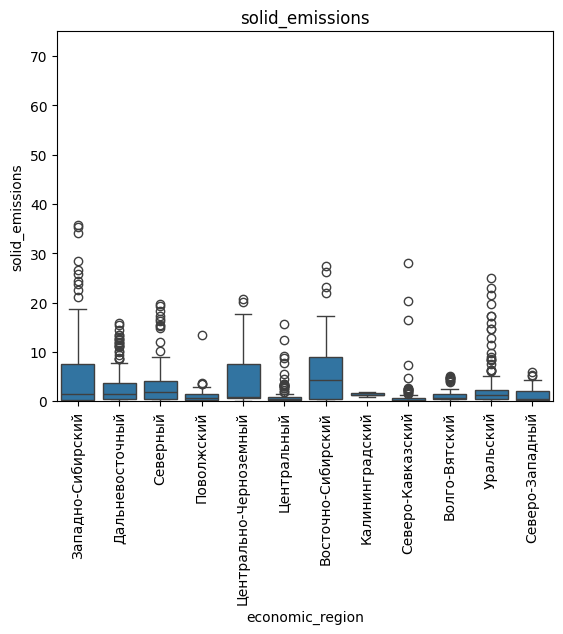

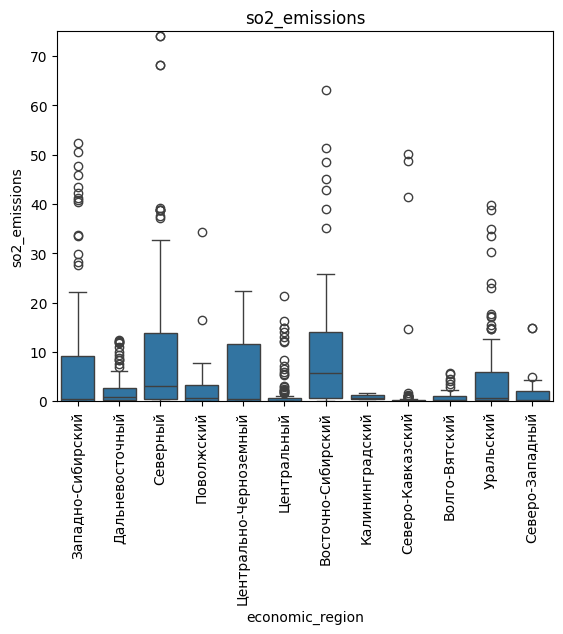

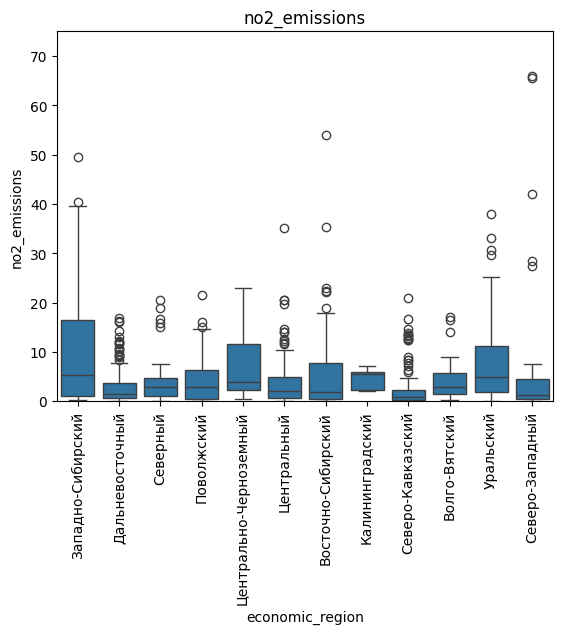

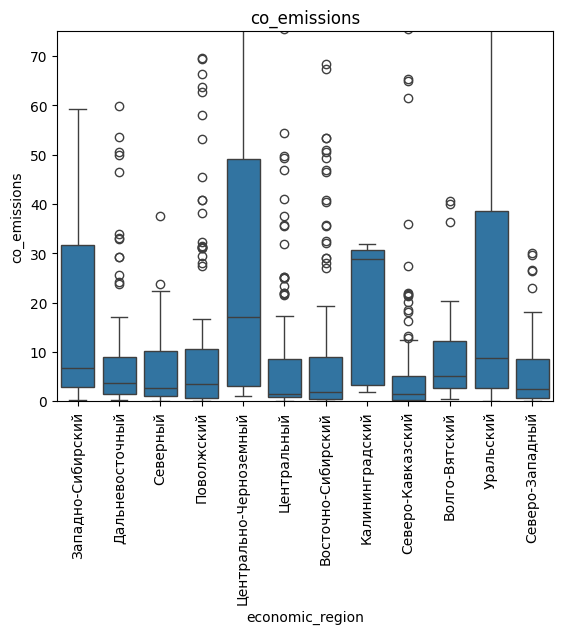

In [294]:
for emis in pollutants_emissions:
    sns.boxplot(x='economic_region', y=emis, data=air_pollution_df_2018_2022)
    plt.axis(ymin=0, ymax=75)
    plt.xticks(rotation=90)
    plt.title(emis)
    plt.show()

### *14.6. solid_emissions - region, so2_emissions - region, no2_emissions - region, co_emissions - region, solid_emissions - city, so2_emissions - city, no2_emissions - city, co_emissions - city*

Упорядочим регионы по усредненному объему выбросов вредных веществ. Будем брать в расчёт только 2018-2022 года:

In [295]:
pd.set_option('display.min_rows', 20)

In [296]:
for emis in pollutants_emissions:
    print(emis + ':')
    display(air_pollution_df_2018_2022.groupby('region')[emis].describe().sort_values('mean', ascending=False))

solid_emissions:


count       mean        std     min  \
region                                                                     
Омская область                         5.0  26.900000   5.453898  21.200   
Липецкая область                       5.0  18.000000   2.324866  15.600   
Кемеровская область                   15.0  14.088667  11.414981   2.800   
Челябинская область                   15.0  12.196000   9.283008   0.200   
Вологодская область                   10.0   8.740000   8.305447   0.200   
Красноярский край                     35.0   7.802857   6.315783   0.100   
Алтайский край                        10.0   7.013000   3.368798   2.700   
Брянская область                       5.0   6.900000   4.066325   2.600   
Республика Саха (Якутия)              17.0   6.494118   5.354025   0.100   
Забайкальский край                    15.0   5.888667   4.228179   0.030   
...                                    ...        ...        ...     ...   
Республика Карелия                    13.0   0.380000   0.222336   0.040   
Калужская область                      5.0   0.360000   0.114018   0.200   
Республика Северная Осетия — Алания    5.0   0.340000   0.181659   0.100   
Орловская область                      5.0   0.306000   0.146390   0.050   
Ульяновская область                   24.0   0.300042   0.383776   0.003   
Московская область                    45.0   0.299111   0.198801   0.040   
Псковская область                     10.0   0.197000   0.074692   0.100   
Республика Крым                       20.0   0.152000   0.110530   0.000   
Ивановская область                    10.0   0.098100   0.102840   0.010   
Карачаево-Черкесская Республика        5.0   0.082000   0.039217   0.034   

                                         25%     50%      75%    max  
region                                                                
Омская область                       23.7000  25.700  28.5000  35.40  
Липецкая область                     16.0000  17.600  20.1000  20.70  
Кемеровская область                   6.4000   8.700  23.5000  35.80  
Челябинская область                   0.3700  14.700  18.4500  25.00  
Вологодская область                   1.4000   8.300  16.0000  19.30  
Красноярский край                     2.0500   7.000  14.3000  17.30  
Алтайский край                        4.2000   6.850  10.2725  11.00  
Брянская область                      3.1000   7.800   8.7000  12.30  
Республика Саха (Якутия)              0.3000   7.100  10.9000  15.90  
Забайкальский край                    1.2000   7.500   9.0000  12.50  
...                                      ...     ...      ...    ...  
Республика Карелия                    0.3100   0.410   0.5000   0.80  
Калужская область                     0.3000   0.400   0.4000   0.50  
Республика Северная Осетия — Алания   0.2000   0.400   0.5000   0.50  
Орловская область                     0.3300   0.350   0.4000   0.40  
Ульяновская область                   0.0475   0.100   0.4750   1.40  
Московская область                    0.2000   0.200   0.4000   0.90  
Псковская область                     0.1400   0.195   0.2500   0.30  
Республика Крым                       0.0500   0.145   0.2000   0.40  
Ивановская область                    0.0200   0.060   0.1750   0.30  
Карачаево-Черкесская Республика       0.0460   0.100   0.1100   0.12  

[77 rows x 8 columns]

so2_emissions:


count        mean         std  \
region                                                                    
Красноярский край                          35.0  253.510571  610.713124   
Омская область                              5.0   51.620000   15.417263   
Липецкая область                            5.0   21.140000    1.050238   
Кемеровская область                        15.0   20.197333   18.891525   
Мурманская область                         45.0   16.851556   21.452526   
Вологодская область                        10.0   14.780000   15.268763   
Иркутская область                          65.0   14.724308   24.053704   
Республика Бурятия                         13.0   13.977692    9.035687   
Алтайский край                             10.0   12.112000    5.520356   
Новосибирская область                      15.0   10.346000   14.919941   
...                                         ...         ...         ...   
Ханты-Мансийский автономный округ — Югра   35.0    0.145800    0.207574   
Владимирская область                        5.0    0.116000    0.047749   
Ставропольский край                        25.0    0.113440    0.102453   
Ивановская область                         10.0    0.112900    0.114220   
Орловская область                           5.0    0.108000    0.089275   
Калужская область                           5.0    0.103600    0.090027   
Ульяновская область                        24.0    0.101750    0.226330   
Севастополь                                 5.0    0.094600    0.068962   
Ямало-Ненецкий автономный округ             5.0    0.056000    0.037815   
Карачаево-Черкесская Республика             5.0    0.040400    0.054409   

                                             min      25%     50%      75%  \
region                                                                       
Красноярский край                          0.020   0.6500   5.000  21.7500   
Омская область                            40.800  41.2000  45.800  52.4000   
Липецкая область                          19.600  20.8000  21.100  21.9000   
Кемеровская область                        1.100   2.9500  14.400  41.2200   
Мурманская область                         0.020   2.2000   4.600  20.2000   
Вологодская область                        0.200   0.5000  13.350  28.7500   
Иркутская область                          0.040   0.2000   6.000  14.1000   
Республика Бурятия                         0.010   6.6000  10.600  21.6000   
Алтайский край                             6.300   7.7250  10.800  16.1500   
Новосибирская область                      0.060   0.1150   0.200  27.9500   
...                                          ...      ...     ...      ...   
Ханты-Мансийский автономный округ — Югра   0.003   0.0300   0.090   0.1750   
Владимирская область                       0.080   0.1000   0.100   0.1000   
Ставропольский край                        0.003   0.0100   0.100   0.2000   
Ивановская область                         0.009   0.0175   0.080   0.1750   
Орловская область                          0.020   0.0300   0.120   0.1300   
Калужская область                          0.020   0.0280   0.070   0.2000   
Ульяновская область                        0.000   0.0020   0.010   0.0425   
Севастополь                                0.013   0.0600   0.100   0.1000   
Ямало-Ненецкий автономный округ            0.030   0.0300   0.040   0.0600   
Карачаево-Черкесская Республика            0.000   0.0010   0.001   0.1000   

                                              max  
region                                             
Красноярский край                         1836.90  
Омская область                              77.90  
Липецкая область                            22.30  
Кемеровская область                         50.50  
Мурманская область                          74.00  
Вологодская область                         32.70  
Иркутская область                          102.50  
Республика Бурятия                          25.80  
А

no2_emissions:


count       mean        std    min       25%  \
region                                                                          
Москва                             5.0  82.400000  30.086376  35.20  78.10000   
Санкт-Петербург                    5.0  45.880000  19.077526  27.40  28.40000   
Омская область                     5.0  39.220000   6.681841  31.10  37.50000   
Липецкая область                   5.0  20.180000   1.544992  19.20  19.30000   
Челябинская область               15.0  16.100000  12.242957   0.80   1.35000   
Томская область                    5.0  15.380000   9.994348   7.30   7.50000   
Рязанская область                  5.0  13.220000   7.204304   5.30   6.40000   
Новосибирская область             15.0  11.820000  14.841169   0.60   1.00000   
Тюменская область                 10.0  11.160000   6.654355   5.30   8.00000   
Кемеровская область               15.0  10.194667   6.961024   0.60   1.95000   
...                                ...        ...        ...    ...       ...   
Республика Карелия                13.0   1.349231   1.386070   0.01   0.10000   
Псковская область                 10.0   1.332000   0.849520   0.30   0.65000   
Еврейская автономная область       5.0   1.160000   0.456070   0.70   0.70000   
Ульяновская область               24.0   1.082125   1.892274   0.02   0.04075   
Сахалинская область               30.0   1.045933   1.176387   0.03   0.14500   
Республика Тыва                    5.0   0.760000   0.364692   0.40   0.50000   
Чукотский автономный округ        10.0   0.682000   0.369558   0.02   0.52500   
Ямало-Ненецкий автономный округ    5.0   0.680000   0.327109   0.40   0.50000   
Республика Крым                   20.0   0.535500   0.376430   0.00   0.25000   
Карачаево-Черкесская Республика    5.0   0.520000   0.438178   0.20   0.20000   

                                   50%       75%     max  
region                                                    
Москва                           81.70  106.1000  110.90  
Санкт-Петербург                  42.00   65.6000   66.00  
Омская область                   37.60   40.4000   49.50  
Липецкая область                 19.60   19.9000   22.90  
Челябинская область              19.20   20.9000   38.00  
Томская область                  11.80   19.3000   31.00  
Рязанская область                14.00   19.8000   20.60  
Новосибирская область             2.70   27.4500   38.30  
Тюменская область                 9.05   12.7500   28.20  
Кемеровская область              12.60   14.5500   20.30  
...                                ...       ...     ...  
Республика Карелия                1.04    1.3000    3.80  
Псковская область                 1.31    2.1375    2.50  
Еврейская автономная область      1.20    1.5000    1.70  
Ульяновская область               0.35    0.6500    6.90  
Сахалинская область               0.50    1.8375    4.00  
Республика Тыва                   0.60    1.1000    1.20  
Чукотский автономный округ        0.65    0.8500    1.40  
Ямало-Ненецкий автономный округ   0.50    0.8000    1.20  
Республика Крым                   0.53    0.8000    1.24  
Карачаево-Черкесская Республика   0.20    1.0000    1.00  

[77 rows x 8 columns]

co_emissions:


count        mean         std      min  \
region                                                                    
Москва                             5.0  389.320000  318.683600    8.500   
Липецкая область                   5.0  220.080000   20.658582  203.400   
Санкт-Петербург                    5.0  200.520000  191.752593   29.600   
Вологодская область               10.0  116.040000  115.986879    2.000   
Челябинская область               15.0   89.353333   70.241165    1.000   
Кемеровская область               15.0   70.920000   84.590114    5.100   
Томская область                    5.0   59.460000   75.237212    7.000   
Омская область                     5.0   48.640000   29.780665    8.700   
Волгоградская область             10.0   47.180000   15.056471   31.000   
Воронежская область                5.0   45.440000   37.172813    4.100   
...                                ...         ...         ...      ...   
Ульяновская область               24.0    3.174625    8.467465    0.050   
Карачаево-Черкесская Республика    5.0    3.020000    3.724513    0.300   
Самарская область                 44.0    2.967727    2.796346    0.080   
Ленинградская область             40.0    2.931600    3.371591    0.032   
Республика Тыва                    5.0    2.890000    2.898362    0.500   
Ямало-Ненецкий автономный округ    5.0    2.300000    1.345362    0.800   
Чукотский автономный округ        10.0    1.650000    0.712195    0.200   
Владимирская область               5.0    1.320000    0.178885    1.100   
Республика Крым                   20.0    1.313050    2.276872    0.001   
Московская область                45.0    1.185111    0.904646    0.100   

                                     25%      50%      75%    max  
region                                                             
Москва                           252.800  260.300  620.200  804.8  
Липецкая область                 209.000  212.000  220.700  255.3  
Санкт-Петербург                   30.000  131.900  404.500  406.6  
Вологодская область                5.275  108.900  211.000  251.8  
Челябинская область                8.600   95.700  154.450  170.2  
Кемеровская область                7.550   16.800  177.600  204.4  
Томская область                    7.300   37.400   57.000  188.6  
Омская область                    35.900   42.200   77.500   78.9  
Волгоградская область             32.925   43.200   61.600   69.6  
Воронежская область                5.500   68.900   73.600   75.1  
...                                  ...      ...      ...    ...  
Ульяновская область                0.100    0.300    1.225   31.4  
Карачаево-Черкесская Республика    0.300    0.300    7.100    7.1  
Самарская область                  0.600    2.700    3.850   11.1  
Ленинградская область              0.600    2.300    4.275   17.1  
Республика Тыва                    1.000    1.050    4.900    7.0  
Ямало-Ненецкий автономный округ    1.000    2.800    3.000    3.9  
Чукотский автономный округ         1.425    1.550    1.825    2.8  
Владимирская область               1.200    1.300    1.500    1.5  
Республика Крым                    0.100    0.205    0.650    7.5  
Московская область                 0.700    1.000    1.400    4.6  

[77 rows x 8 columns]

In [297]:
pd.reset_option('display.min_rows')

## 15. Анализ взаимосвязи порядкового и категориального признаков

### *15.1. pollutions_level - economic_region*

Оценим описательные статистики уровня загрязнения атмосферы в разрезе экономических районов:

In [298]:
description = air_pollution_df_copy.groupby('economic_region')['pollution_level'].describe()

top_freq = air_pollution_df_copy.groupby('economic_region')['pollution_level'].agg(
    top=lambda x: x.mode().iloc[0],
    freq=lambda x: x.value_counts().iloc[0],
    freq_pct = lambda x: x.value_counts().iloc[0] / x.count() * 100
)

description.join(top_freq)

count      mean       std  min  25%  50%  75%  max  \
economic_region                                                              
Волго-Вятский           163.0  1.907975  0.934984  1.0  1.0  2.0  3.0  4.0   
Восточно-Сибирский      498.0  2.915663  1.202327  1.0  2.0  3.0  4.0  4.0   
Дальневосточный         382.0  2.209424  1.066362  1.0  1.0  2.0  3.0  4.0   
Западно-Сибирский       331.0   2.34139  1.024581  1.0  1.0  3.0  3.0  4.0   
Калининградский          16.0     2.375  0.806226  1.0  2.0  3.0  3.0  3.0   
Поволжский              395.0  1.992405  1.003771  1.0  1.0  2.0  3.0  4.0   
Северный                311.0  1.511254  0.752867  1.0  1.0  1.0  2.0  4.0   
Северо-Западный         147.0  1.319728   0.60801  1.0  1.0  1.0  1.0  3.0   
Северо-Кавказский       345.0  1.971014  0.964049  1.0  1.0  2.0  3.0  4.0   
Уральский               385.0  2.493506  0.955022  1.0  2.0  3.0  3.0  4.0   
Центрально-Черноземный  112.0  2.017857  0.958435  1.0  1.0  2.0  3.0  4.0   
Центральный             429.0  1.820513  0.923701  1.0  1.0  2.0  3.0  4.0   

                        top  freq   freq_pct  
economic_region                               
Волго-Вятский             1    73  44.785276  
Восточно-Сибирский        4   226  45.381526  
Дальневосточный           1   142  37.172775  
Западно-Сибирский         3   132  39.879154  
Калининградский           3     9  56.250000  
Поволжский                1   176  44.556962  
Северный                  1   199  63.987138  
Северо-Западный           1   111  75.510204  
Северо-Кавказский         1   148  42.898551  
Уральский                 3   164  42.597403  
Центрально-Черноземный    1    48  42.857143  
Центральный               1   210  48.951049

Для корректного визуального представления распределения признака 'pollution_level' создадим словарь, в котором каждой категории будет присвоен соответствующий цвет:

In [299]:
# Определяем цвета для каждого уровня загрязнения
colors = {1: "#2ca02c",  # зеленый - низкий уровень
          2: "#ffcc00",  # желтый - повышенный
          3: "#ff6600",  # оранжевый - высокий
          4: "#cc0000"}  # красный - очень высокий

Для каждого экономического района построим круговую диаграмму:

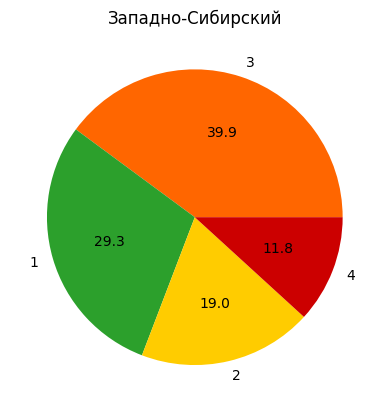

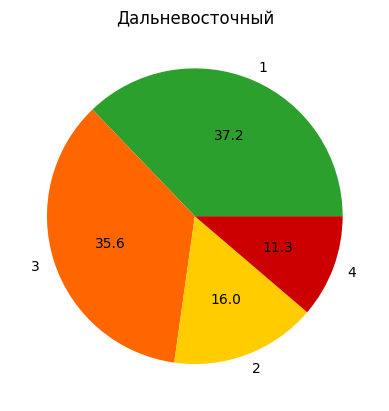

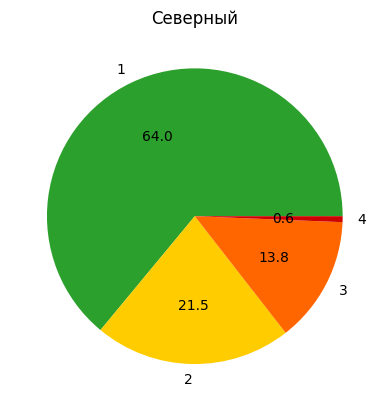

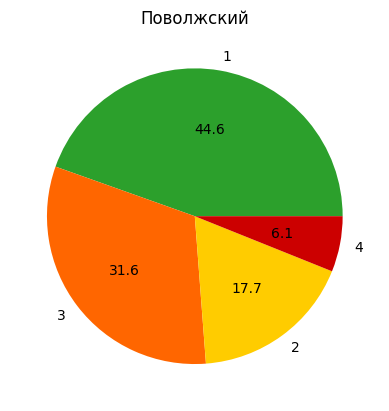

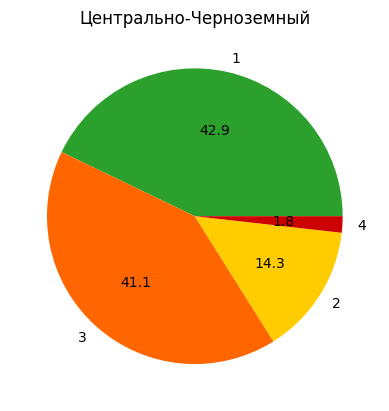

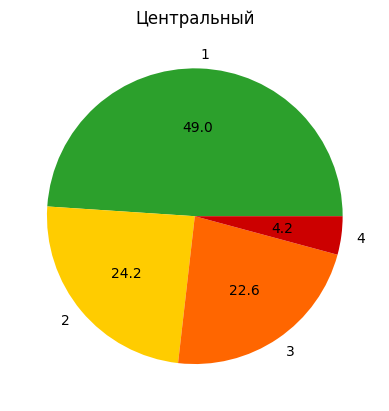

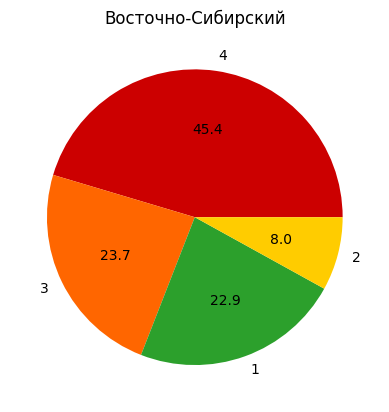

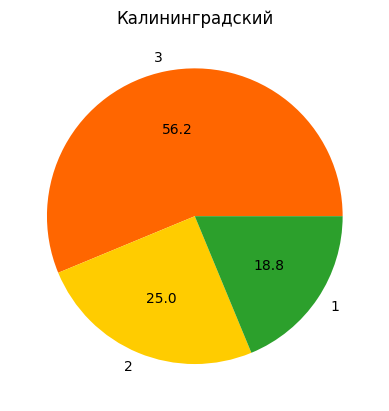

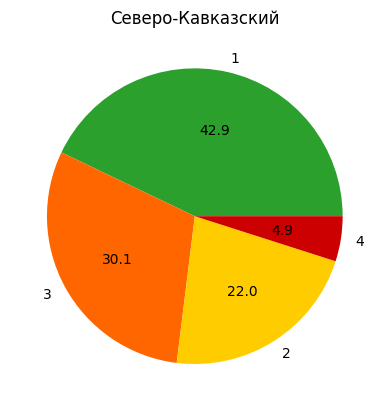

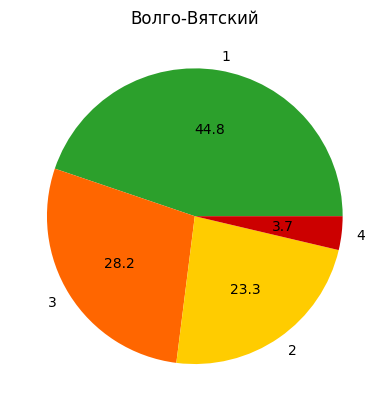

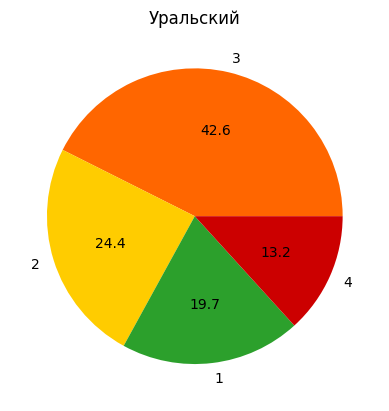

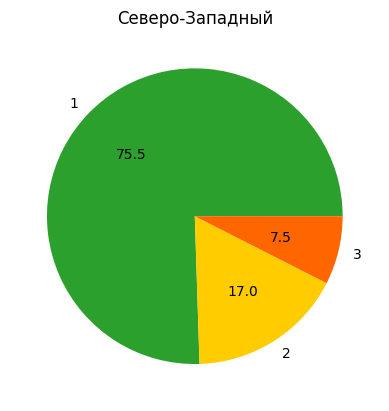

In [300]:
for economic_region in air_pollution_df_copy['economic_region'].unique():
  filtered_df = air_pollution_df_copy[air_pollution_df_copy['economic_region']==economic_region]

  pollution_level_counts = filtered_df['pollution_level'].value_counts()
  labels = pollution_level_counts.index

  plt.title(economic_region)
  plt.pie(pollution_level_counts, labels=labels, colors=[colors[key] for key in labels], autopct='%.1f')
  plt.show()

Так как показатели уровней загрязнения воздуха в 2014-2020 существенно отличаются от других лет, сгруппируем дополнительно данные по трем диапазонам лет и проведем аналогичный анализ:

In [301]:
air_pollution_df_copy_2007_2013 = air_pollution_df_copy[(air_pollution_df_copy['year']>=2007) & (air_pollution_df_copy['year']<=2013)]
air_pollution_df_copy_2014_2020 = air_pollution_df_copy[(air_pollution_df_copy['year']>=2014) & (air_pollution_df_copy['year']<=2020)]
air_pollution_df_copy_2021_2022 = air_pollution_df_copy[air_pollution_df_copy['year']>=2021]
datasets = [air_pollution_df_copy_2007_2013, air_pollution_df_copy_2014_2020, air_pollution_df_copy_2021_2022]

In [302]:
year_ranges = ('2007-2013', '2014-2020', '2021-2022')

for df, year_range in zip(datasets, year_ranges):
    description = df.groupby('economic_region')['pollution_level'].describe()

    top_freq = df.groupby('economic_region')['pollution_level'].agg(
        top=lambda x: x.mode().iloc[0],
        freq=lambda x: x.value_counts().iloc[0],
        freq_pct = lambda x: x.value_counts().iloc[0] / x.count() * 100
    )

    print(year_range + ':')
    display(description.join(top_freq))

2007-2013:


count      mean       std  min  25%  50%  75%  max  \
economic_region                                                              
Волго-Вятский            72.0  2.444444   0.85397  1.0  2.0  3.0  3.0  4.0   
Восточно-Сибирский      208.0  2.908654  1.127745  1.0  2.0  3.0  4.0  4.0   
Дальневосточный         169.0  2.597633  1.013713  1.0  2.0  3.0  3.0  4.0   
Западно-Сибирский       148.0  2.837838  0.816947  1.0  3.0  3.0  3.0  4.0   
Калининградский           7.0       3.0       0.0  3.0  3.0  3.0  3.0  3.0   
Поволжский              178.0  2.426966  1.012773  1.0  1.0  3.0  3.0  4.0   
Северный                147.0  1.741497  0.828337  1.0  1.0  1.0  2.0  3.0   
Северо-Западный          71.0  1.422535  0.689968  1.0  1.0  1.0  2.0  3.0   
Северо-Кавказский       120.0  2.333333  1.015289  1.0  1.0  3.0  3.0  4.0   
Уральский               169.0   3.08284  0.611595  1.0  3.0  3.0  3.0  4.0   
Центрально-Черноземный   49.0  2.510204  0.739438  1.0  2.0  3.0  3.0  3.0   
Центральный             190.0  2.331579  0.897116  1.0  2.0  2.0  3.0  4.0   

                        top  freq    freq_pct  
economic_region                                
Волго-Вятский             3    34   47.222222  
Восточно-Сибирский        4    82   39.423077  
Дальневосточный           3    86   50.887574  
Западно-Сибирский         3    88   59.459459  
Калининградский           3     7  100.000000  
Поволжский                3    91   51.123596  
Северный                  1    74   50.340136  
Северо-Западный           1    49   69.014085  
Северо-Кавказский         3    52   43.333333  
Уральский                 3   108   63.905325  
Центрально-Черноземный    3    32   65.306122  
Центральный               3    79   41.578947

2014-2020:


count      mean       std  min  25%  50%  75%  max  \
economic_region                                                              
Волго-Вятский            71.0  1.239437  0.520022  1.0  1.0  1.0  1.0  3.0   
Восточно-Сибирский      221.0  2.877828  1.253543  1.0  1.0  3.0  4.0  4.0   
Дальневосточный         164.0  1.810976  0.962933  1.0  1.0  1.0  3.0  4.0   
Западно-Сибирский       143.0  1.741259   0.93231  1.0  1.0  1.0  2.0  4.0   
Калининградский           7.0  1.571429  0.534522  1.0  1.0  2.0  2.0  2.0   
Поволжский              164.0  1.292683  0.507316  1.0  1.0  1.0  2.0  3.0   
Северный                126.0  1.142857  0.351324  1.0  1.0  1.0  1.0  2.0   
Северо-Западный          55.0  1.254545  0.551704  1.0  1.0  1.0  1.0  3.0   
Северо-Кавказский       169.0  1.591716  0.751302  1.0  1.0  1.0  2.0  3.0   
Уральский               168.0  1.791667  0.810516  1.0  1.0  2.0  2.0  4.0   
Центрально-Черноземный   49.0  1.387755  0.730762  1.0  1.0  1.0  1.0  3.0   
Центральный             185.0       1.2  0.452048  1.0  1.0  1.0  1.0  3.0   

                        top  freq   freq_pct  
economic_region                               
Волго-Вятский             1    57  80.281690  
Восточно-Сибирский        4   105  47.511312  
Дальневосточный           1    84  51.219512  
Западно-Сибирский         1    77  53.846154  
Калининградский           2     4  57.142857  
Поволжский                1   120  73.170732  
Северный                  1   108  85.714286  
Северо-Западный           1    44  80.000000  
Северо-Кавказский         1    96  56.804734  
Уральский                 1    73  43.452381  
Центрально-Черноземный    1    37  75.510204  
Центральный               1   152  82.162162

2021-2022:


count      mean       std  min   25%  50%  75%  max  \
economic_region                                                               
Волго-Вятский            20.0      2.35  0.875094  1.0   2.0  2.5  3.0  4.0   
Восточно-Сибирский       69.0  3.057971  1.258898  1.0   2.0  4.0  4.0  4.0   
Дальневосточный          49.0  2.204082  1.098855  1.0   1.0  2.0  3.0  4.0   
Западно-Сибирский        40.0      2.65  0.921259  1.0   2.0  3.0  3.0  4.0   
Калининградский           2.0       3.0       0.0  3.0   3.0  3.0  3.0  3.0   
Поволжский               53.0  2.698113  0.798675  1.0   2.0  3.0  3.0  4.0   
Северный                 38.0  1.842105  0.916112  1.0   1.0  2.0  2.0  4.0   
Северо-Западный          21.0  1.142857  0.358569  1.0   1.0  1.0  1.0  2.0   
Северо-Кавказский        56.0  2.339286  0.995933  1.0   1.0  3.0  3.0  4.0   
Уральский                48.0     2.875  0.788886  1.0   2.0  3.0  3.0  4.0   
Центрально-Черноземный   14.0       2.5  1.091928  1.0  1.25  3.0  3.0  4.0   
Центральный              54.0  2.148148  0.959705  1.0   1.0  2.0  3.0  4.0   

                        top  freq    freq_pct  
economic_region                                
Волго-Вятский             3     9   45.000000  
Восточно-Сибирский        4    39   56.521739  
Дальневосточный           1    19   38.775510  
Западно-Сибирский         3    20   50.000000  
Калининградский           3     2  100.000000  
Поволжский                3    30   56.603774  
Северный                  1    17   44.736842  
Северо-Западный           1    18   85.714286  
Северо-Кавказский         3    25   44.642857  
Уральский                 3    24   50.000000  
Центрально-Черноземный    3     7   50.000000  
Центральный               2    19   35.185185

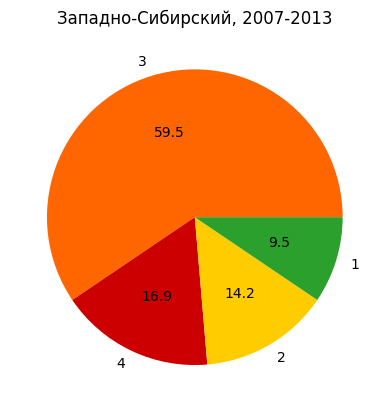

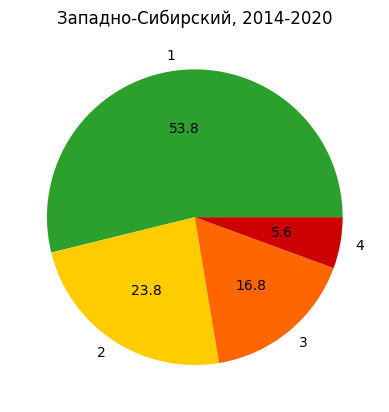

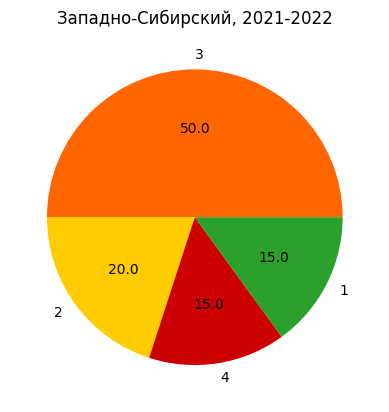

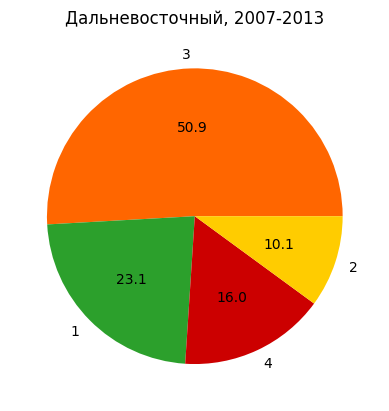

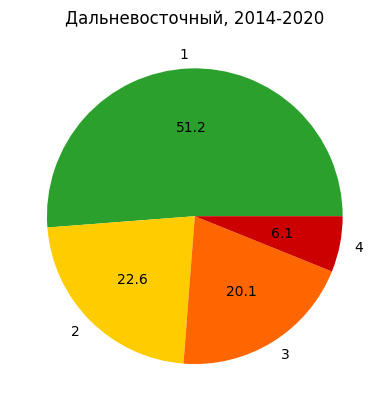

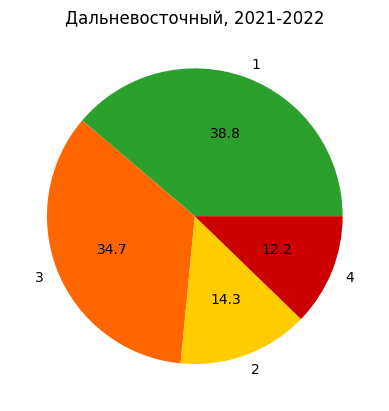

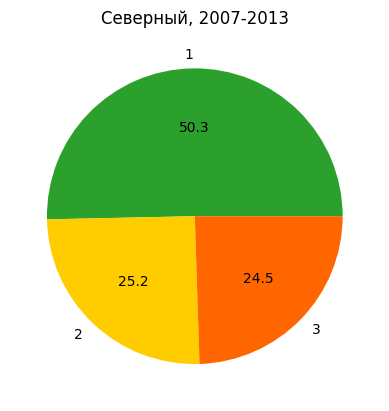

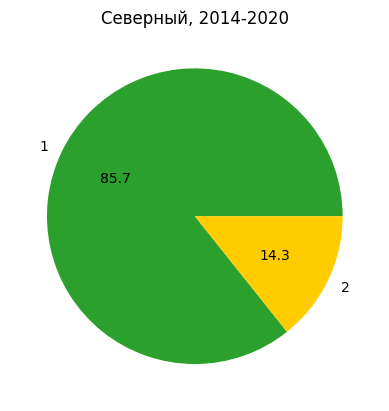

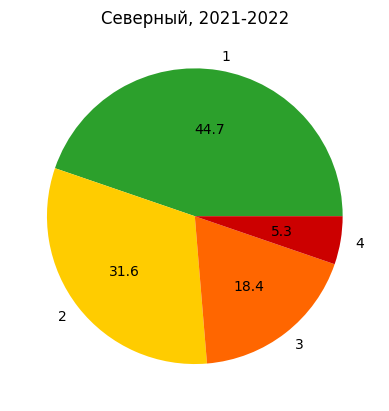

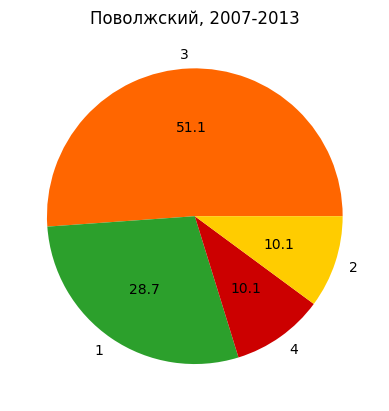

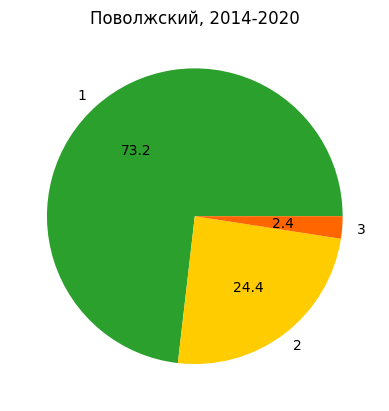

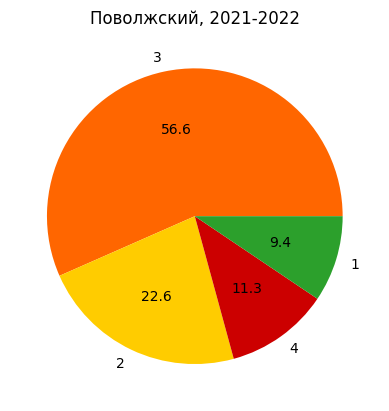

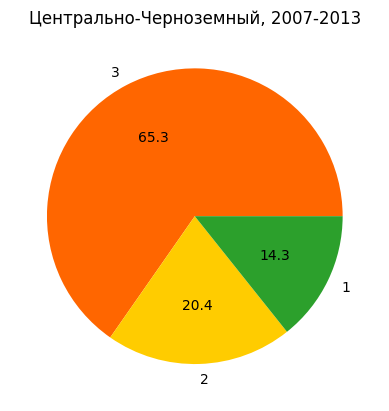

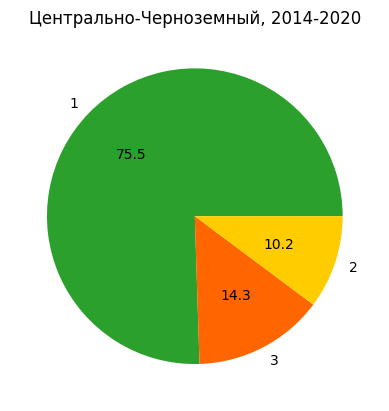

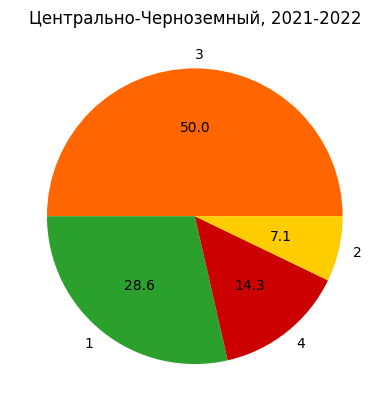

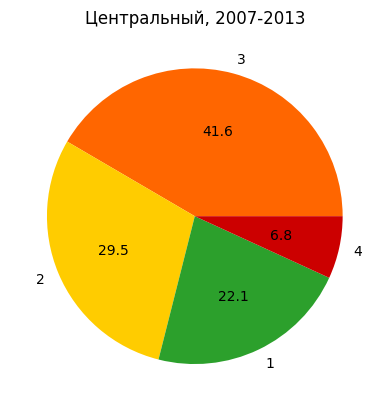

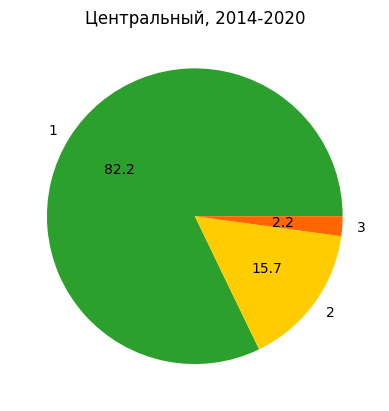

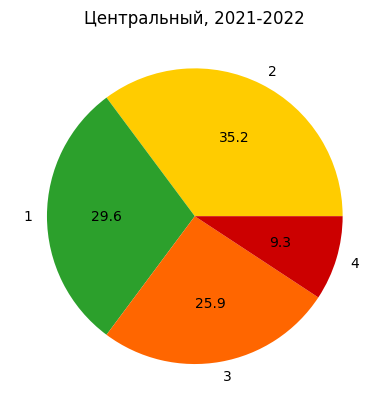

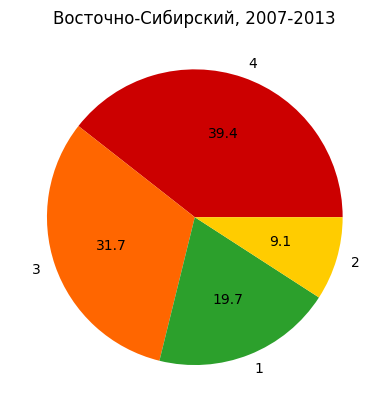

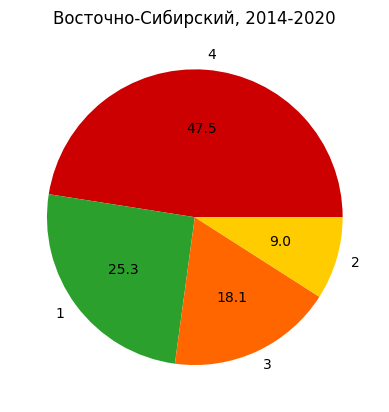

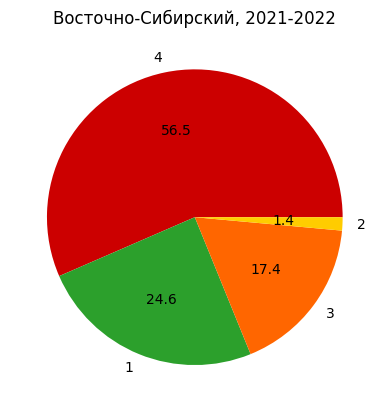

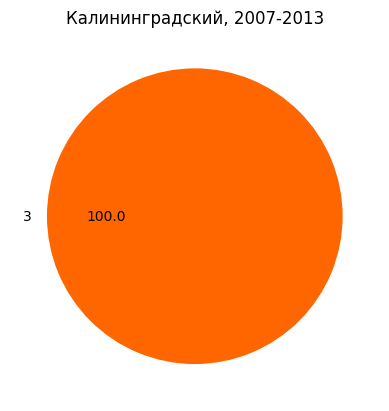

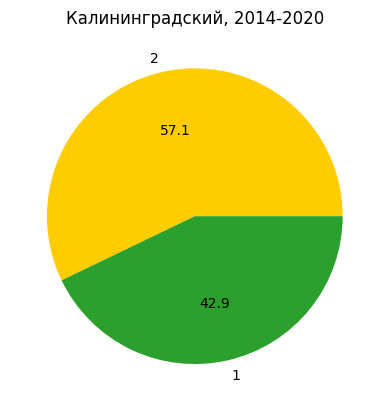

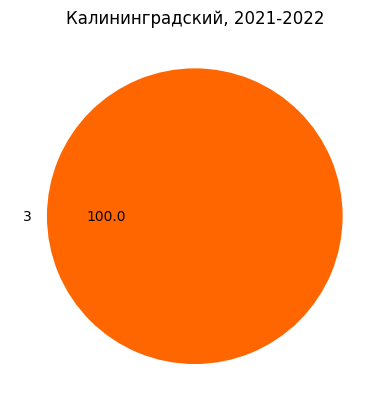

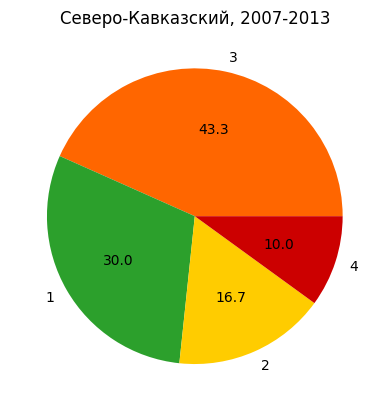

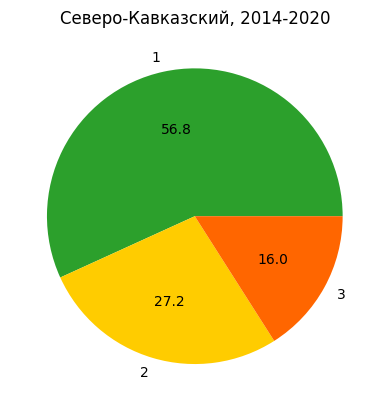

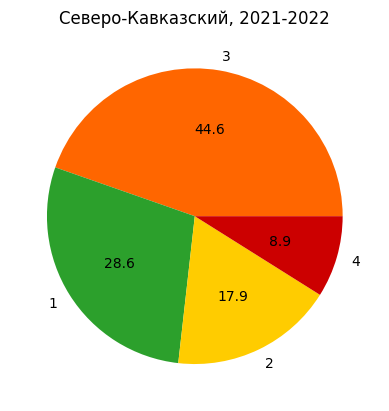

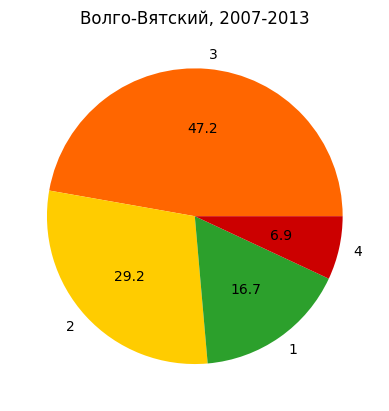

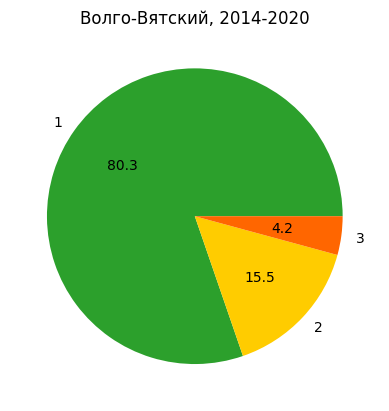

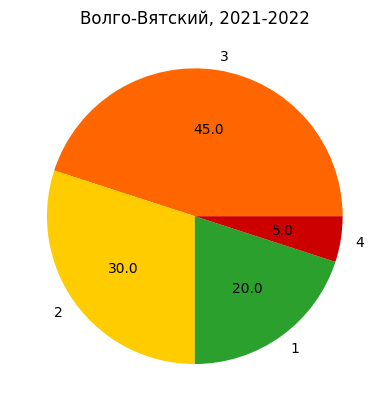

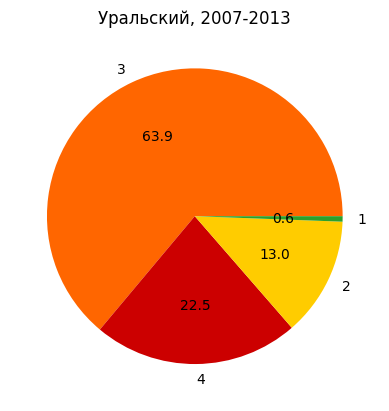

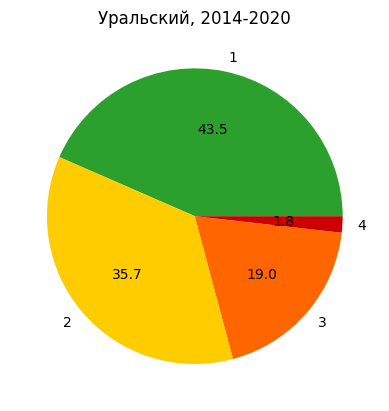

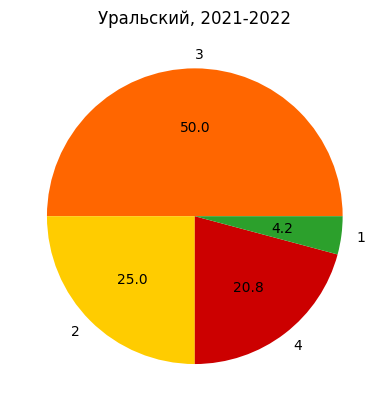

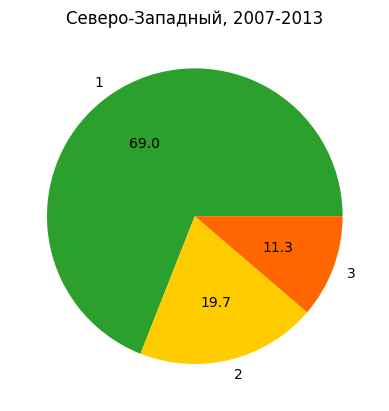

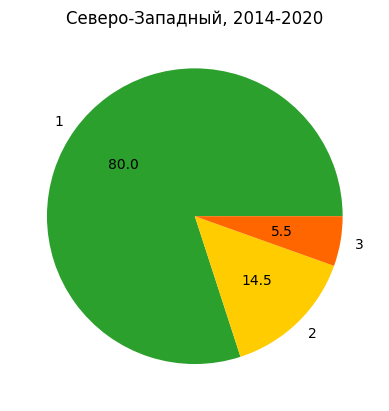

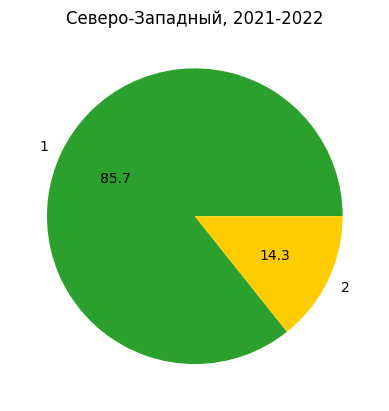

In [303]:
for economic_region in air_pollution_df_copy['economic_region'].unique():
    for df, year_range in zip(datasets, year_ranges):
        filtered_df = df[df['economic_region']==economic_region]

        pollution_level_counts = filtered_df['pollution_level'].value_counts()
        labels = pollution_level_counts.index

        plt.title(economic_region + ', ' + year_range)
        plt.pie(pollution_level_counts, labels=labels, colors=[colors[key] for key in labels], autopct='%.1f')
        plt.show()

Построим график сезонов:

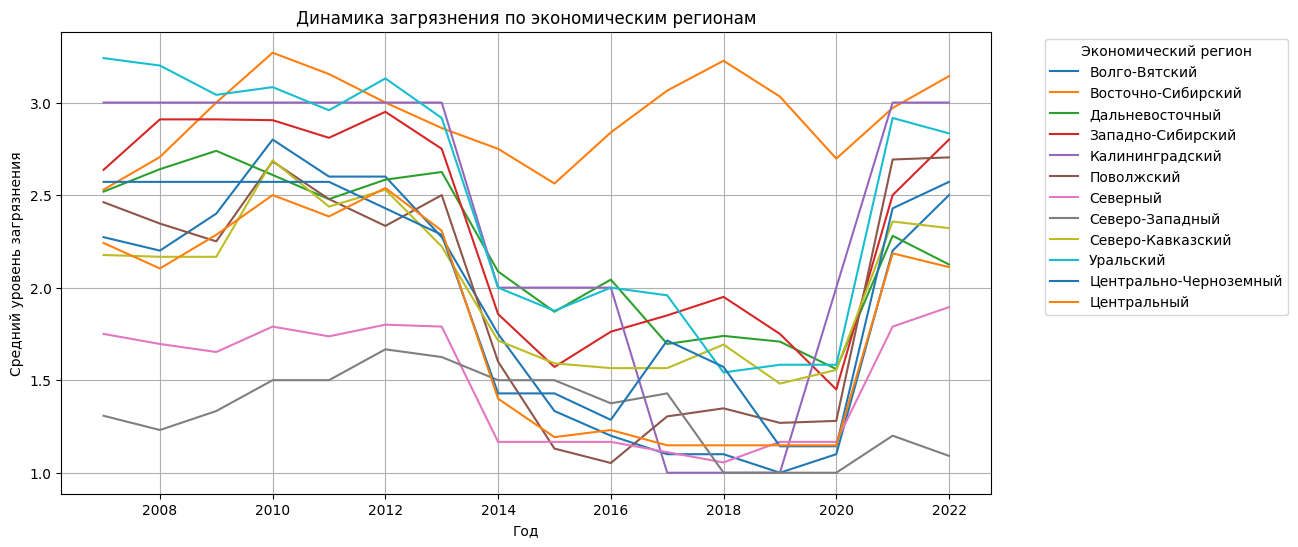

In [304]:
pollution_trends = air_pollution_df_copy.groupby(['year', 'economic_region'])['pollution_level'].mean().reset_index()

plt.figure(figsize=(12, 6))

for region in pollution_trends['economic_region'].unique():
    region_data = pollution_trends[pollution_trends['economic_region'] == region]
    plt.plot(region_data['year'], region_data['pollution_level'], label=region)

plt.xlabel('Год')
plt.ylabel('Средний уровень загрязнения')
plt.title('Динамика загрязнения по экономическим регионам')
plt.legend(title="Экономический регион", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Выводы по разделу c анализом взаимосвязи экономического района и уровня загрязнения атмосферы:**  
Все экономические районы можно разделить на пять типов.
1.   Районы с благоприятной обстановкой загрязнения воздуха:
*   Северо-Западный  
Однозначно является Топ-1 экономическим районом по низкому загрязнения воздуха. В 2021-2022 годах 85% (!) населенных пунктов имели низкий уровень загрязнения атмосферы. 3-го и 4-го уровни загрязнения в этом экономическом районе отсутстствуют вовсе.
*   Северный  
В среднем имеет чистый воздух. В 2021-2022 годах 44.64% н.п имеют низкий уровень загрязнения. Однако при этом имеются и н.п. с очень высоким уровнем загрязнения, а также медианным уровнем загрязнения является повышенный уровень.
2.   Районы с относительно благоприятной обстановкой загрязнения воздуха:
*   Центральный  
В среднем достаточно неплохой воздух. Наиболее часто встречаются н.п. с повышенным уровнем загрязнения, их примерно 35%. Усредненный уровень загрязнения — 2.15.
*   Дальневосточный  
Больше всего н.п. с низким уровнем загрязнения (38.78%). Однако имеются н.п. со всеми уровнями загрязнения, усредненный уровень — 2.2.
3.   Районы со средней обстановкой загрязнения воздуха:
*   Волго-Вятский  
В 2021-2022 годах с наибольшей частотой (45%) встречались н.п. с высоким уровненем загрязнения. Однако при этом медианное значение загрязенности 2.5 и усредненный уровень — 2.35, что говорит о большом количестве н.п. с лучшим по сравнению с высоким уровнем.
*   Северо-Кавказский  
Имеет схожие характеристики с Волго-Вятский районом.
*   Центрально-Чернозёмный  
Находится на границе районов со средней и с плохой обстановской загрязнения атмосферы. Половина н.п. в 2021-2022 годах имела высокий уровень загрязнения, однако при этом медианный уровень — 2.5.
4.   Районы с плохой обстановкой загрязнения воздуха:
*   Калининградский  
Является самым малым экономическим районом, состоящим лишь из одной Калиниградской области, а в ней все города имеют высокий уровень загрязнения.
*   Западно-Сибирский  
Имеет 50% н.п. с высоким уровнем загрязнения атмосферы, усредненный уровень загрязнения — 2.65.
*   Поволжский  
Имеет 56.6% н.п. с высоким уровнем загрязнения атмосферы, усредненный уровень загрязнения — 2.7.
*   Уральский  
Имеет 50% н.п. с высоким уровнем загрязнения атмосферы, усредненный уровень загрязнения — 2.88.
5.   Районы с критически плохой обстановкой загрязнения воздуха:
*   Восточно-Сибирский  
Является безоговорочно наихудшим по загрязнению атмосферы экономическим райном. Единственный из всех районов, у которого в 2014-2020 годах показатели среднего уровня загрязнения не упали значительно, а значительно повысились. В 2021-2022 н.п. с очень высоким загрязнением воздуха занимают 56.52%. Является единственным экономическим районом с медианным уровнем загрязнения воздуха 4.0 и усредненным уровнем выше 3 (3.06). Все эти показатели являются катастрофическими.









### *15.2. pollutions_level - city*

Посмотрим на уровень загрязнения воздуха городов, в которых численность наседения 500 тыс. и больше:

In [305]:
air_pollution_df_big_cities = air_pollution_df_copy[air_pollution_df_copy['population']>=500000].copy().sort_values('population', ascending=False)
air_pollution_df_big_cities.groupby('city')['pollution_level'].describe()

count      mean       std  min   25%  50%   75%  max
city                                                                  
АСТРАХАНЬ          16.0    2.6875    0.7932  1.0  2.75  3.0   3.0  4.0
БАРНАУЛ            16.0      3.25   0.57735  2.0   3.0  3.0   4.0  4.0
ВЛАДИВОСТОК        16.0     2.625  0.619139  1.0   2.0  3.0   3.0  3.0
ВОЛГОГРАД          16.0    2.3125  1.138347  1.0   1.0  3.0   3.0  4.0
ВОРОНЕЖ            16.0     2.875  0.341565  2.0   3.0  3.0   3.0  3.0
ЕКАТЕРИНБУРГ       16.0       3.0  1.032796  1.0  2.75  3.0   4.0  4.0
ИЖЕВСК             16.0      2.25  0.930949  1.0   1.0  3.0   3.0  3.0
ИРКУТСК            16.0    3.6875  0.478714  3.0   3.0  4.0   4.0  4.0
КАЗАНЬ             16.0    2.4375  0.727438  1.0   2.0  3.0   3.0  3.0
КЕМЕРОВО           16.0    3.0625  0.442531  2.0   3.0  3.0   3.0  4.0
КИРОВ               5.0       1.6  0.894427  1.0   1.0  1.0   2.0  3.0
КРАСНОДАР          16.0    2.3125    0.7932  1.0   2.0  2.5   3.0  3.0
КРАСНОЯРСК         16.0    3.8125  0.403113  3.0   4.0  4.0   4.0  4.0
ЛИПЕЦК             14.0       2.0  0.960769  1.0   1.0  2.0   3.0  3.0
МАХАЧКАЛА          14.0  3.142857  0.363137  3.0   3.0  3.0   3.0  4.0
МОСКВА             16.0      2.75  1.064581  1.0   2.0  3.0   4.0  4.0
НАБЕРЕЖНЫЕ ЧЕЛНЫ   16.0    2.3125  1.138347  1.0   1.0  3.0   3.0  4.0
НИЖНИЙ НОВГОРОД    16.0    1.8125      0.75  1.0   1.0  2.0   2.0  3.0
НОВОКУЗНЕЦК        16.0    3.8125  0.403113  3.0   4.0  4.0   4.0  4.0
НОВОСИБИРСК        16.0    2.6875  0.478714  2.0   2.0  3.0   3.0  3.0
ОМСК               16.0     2.125  0.885061  1.0   1.0  2.0   3.0  3.0
ОРЕНБУРГ           16.0    2.0625  0.853913  1.0   1.0  2.0   3.0  3.0
ПЕНЗА              16.0    2.3125  1.138347  1.0   1.0  3.0   3.0  4.0
ПЕРМЬ              16.0    2.4375  0.892095  1.0   2.0  3.0   3.0  4.0
РОСТОВ-НА-ДОНУ     16.0    2.9375  0.442531  2.0   3.0  3.0   3.0  4.0
РЯЗАНЬ             16.0     2.625       0.5  2.0   2.0  3.0   3.0  3.0
САМАРА             16.0     2.375  0.806226  1.0   2.0  3.0   3.0  3.0
САНКТ-ПЕТЕРБУРГ    16.0     2.375  0.806226  1.0   2.0  3.0   3.0  3.0
САРАТОВ            16.0     2.875  0.806226  2.0   2.0  3.0  3.25  4.0
СЕВАСТОПОЛЬ         2.0       2.0       0.0  2.0   2.0  2.0   2.0  2.0
ТОЛЬЯТТИ           16.0      2.25  0.930949  1.0   1.0  3.0   3.0  3.0
ТОМСК              13.0  2.384615  1.043908  1.0   2.0  2.0   3.0  4.0
ТУЛА                3.0       3.0       0.0  3.0   3.0  3.0   3.0  3.0
ТЮМЕНЬ             16.0     2.375  1.087811  1.0  1.75  2.0   3.0  4.0
УЛЬЯНОВСК          16.0     2.375  0.806226  1.0   2.0  3.0   3.0  3.0
УФА                16.0    2.3125  0.873212  1.0  1.75  3.0   3.0  3.0
ХАБАРОВСК          16.0    2.6875   0.60208  1.0  2.75  3.0   3.0  3.0
ЧЕБОКСАРЫ           1.0       3.0      <NA>  3.0   3.0  3.0   3.0  3.0
ЧЕЛЯБИНСК          16.0    3.1875      0.75  2.0   3.0  3.0   4.0  4.0
ЯРОСЛАВЛЬ          16.0     1.625  0.718795  1.0   1.0  1.5   2.0  3.0